# 本文档功能
## 所有在DS课程、练习和实践过程中遇到的python语法都汇总在这里，便于日后查找

In [ ]:
# 寻找两个list中的共同项并且写入一个新的list

list1 = [1,2,3,4,5,6]
list2 = [3, 5, 7, 9]
list(set(list1).intersection(list2))
# 输出结果：[3, 5]

In [ ]:
# 把整列df series的内容类型改成指定类型（astrpe括号里的）
window_ti_impact['time'].astype(int)

# 把某个df中的datetime类型数值改成millisecond的形式（python3版本的代码）
window_ti_impact['time'][1].timestamp()

In [10]:
# 在python中与postgresql链接的库
import psycopg2

# 使用 psycopg2 连接postgresql
conn = psycopg2.connect("host=localhost dbname=xiucat user=xiucat")
cursor = conn.cursor()

# 展示 PostgreSQL 连接属性
print ( conn.get_dsn_parameters(),"\n")

# 展示 postgresql 的版本
cursor.execute("SELECT version();")
record = cursor.fetchone()
print("You are connected to - ", record,"\n")


{'user': 'xiucat', 'passfile': '/Users/xiucat/.pgpass', 'dbname': 'xiucat', 'host': 'localhost', 'port': '5432', 'tty': '', 'options': '', 'sslmode': 'prefer', 'sslcompression': '0', 'krbsrvname': 'postgres', 'target_session_attrs': 'any'} 

You are connected to -  ('PostgreSQL 12.1 on x86_64-apple-darwin16.7.0, compiled by Apple LLVM version 8.1.0 (clang-802.0.42), 64-bit',) 



# Assignment 2 - Pandas Introduction
All questions are weighted the same in this assignment.
## Part 1
The following code loads the olympics dataset (olympics.csv), which was derrived from the Wikipedia entry on [All Time Olympic Games Medals](https://en.wikipedia.org/wiki/All-time_Olympic_Games_medal_table), and does some basic data cleaning. 

The columns are organized as # of Summer games, Summer medals, # of Winter games, Winter medals, total # number of games, total # of medals. Use this dataset to answer the questions below.

In [1]:
import pandas as pd

df = pd.read_csv('olympics.csv', index_col=0, skiprows=1)
df.head()

,№ Summer,01 !,02 !,03 !,Total,№ Winter,01 !.1,02 !.1,03 !.1,Total.1,№ Games,01 !.2,02 !.2,03 !.2,Combined total
Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


In [2]:
import pandas as pd

df = pd.read_csv('olympics.csv', index_col=0, skiprows=1)

for col in df.columns:
    #print(col)
    if col[:2]=='01': #也就是0，1两个digit的位置，2不包含在内，所以对应的就是column名称的前两个字符，下同
        df.rename(columns={col:'Gold'+col[4:]}, inplace=True)
    if col[:2]=='02':
        df.rename(columns={col:'Silver'+col[4:]}, inplace=True)
    if col[:2]=='03':
        df.rename(columns={col:'Bronze'+col[4:]}, inplace=True)
    if col[:1]=='№':
        df.rename(columns={col:'#'+col[1:]}, inplace=True)

names_ids = df.index.str.split('\s\(') # split the index by '('

df.index = names_ids.str[0] # the [0] element is the country name (new index) 
df['ID'] = names_ids.str[1].str[:3] # the [1] element is the abbreviation or ID (take first 3 characters from that)

df = df.drop('Totals')
df.head()

,# Summer,Gold,Silver,Bronze,Total,# Winter,Gold.1,Silver.1,Bronze.1,Total.1,# Games,Gold.2,Silver.2,Bronze.2,Combined total,ID
Afghanistan,13,0,0,2,2,0,0,0,0,0,13,0,0,2,2,AFG
Algeria,12,5,2,8,15,3,0,0,0,0,15,5,2,8,15,ALG
Argentina,23,18,24,28,70,18,0,0,0,0,41,18,24,28,70,ARG
Armenia,5,1,2,9,12,6,0,0,0,0,11,1,2,9,12,ARM
Australasia,2,3,4,5,12,0,0,0,0,0,2,3,4,5,12,ANZ


### Question 0 (Example)

What is the first country in df?

*This function should return a Series.*

In [3]:
# You should write your whole answer within the function provided. The autograder will call
# this function and compare the return value against the correct solution value
def answer_zero():
    # This function returns the row for Afghanistan, which is a Series object. The assignment
    # question description will tell you the general format the autograder is expecting
    return df.iloc[0]

# You can examine what your function returns by calling it in the cell. If you have questions
# about the assignment formats, check out the discussion forums for any FAQs
answer_zero() 

# Summer           13
Gold                0
Silver              0
Bronze              2
Total               2
# Winter            0
Gold.1              0
Silver.1            0
Bronze.1            0
Total.1             0
# Games            13
Gold.2              0
Silver.2            0
Bronze.2            2
Combined total      2
ID                AFG
Name: Afghanistan, dtype: object

### Question 1
Which country has won the most gold medals in summer games?

*This function should return a single string value.*

In [4]:
def answer_one():
    return df.loc[df['Gold'] == df['Gold'].max()].index[0] #"YOUR ANSWER HERE"
answer_one()

'United States'

### Question 2
Which country had the biggest difference between their summer and winter gold medal counts?

*This function should return a single string value.*

In [16]:

def answer_two():
    try:
        df.insert(0, 'Summer and Winter Gold Gap', (df['Gold'] - df['Gold.1']).abs())
    except:pass
    return df[df['Summer and Winter Gold Gap'] == df['Summer and Winter Gold Gap'].max()].index[0] #"YOUR ANSWER HERE"
answer_two()



'United States'

### Question 3
Which country has the biggest difference between their summer gold medal counts and winter gold medal counts relative to their total gold medal count? 

$$\frac{Summer~Gold - Winter~Gold}{Total~Gold}$$

Only include countries that have won at least 1 gold in both summer and winter.

*This function should return a single string value.*

In [13]:

def answer_three():
    noGold = df['Gold'].isin([0]) | df['Gold.1'].isin([0])
    df_withGold = df[~noGold]
    df_withGold.insert(0,'Gap_Total_Ratio',((df['Gold'] - df['Gold.1'])/df['Gold.2']).abs())
    return df_withGold[df_withGold['Gap_Total_Ratio'] == df_withGold['Gap_Total_Ratio'].max()].index[0] #"YOUR ANSWER HERE"
answer_three()



'Bulgaria'

### Question 4
Write a function that creates a Series called "Points" which is a weighted value where each gold medal (`Gold.2`) counts for 3 points, silver medals (`Silver.2`) for 2 points, and bronze medals (`Bronze.2`) for 1 point. The function should return only the column (a Series object) which you created, with the country names as indices.

*This function should return a Series named `Points` of length 146*

In [15]:
def answer_four():
    try:
        df.insert(0,'Points',df['Gold.2']*3 + df['Silver.2']*2 + df['Bronze.2']*1)
    except:pass
    return df['Points'] #"YOUR ANSWER HERE"
answer_four()

Afghanistan                            2
Algeria                               27
Argentina                            130
Armenia                               16
Australasia                           22
Australia                            923
Austria                              569
Azerbaijan                            43
Bahamas                               24
Bahrain                                1
Barbados                               1
Belarus                              154
Belgium                              276
Bermuda                                1
Bohemia                                5
Botswana                               2
Brazil                               184
British West Indies                    2
Bulgaria                             411
Burundi                                3
Cameroon                              12
Canada                               846
Chile                                 24
China                               1120
Colombia        

## Part 2
For the next set of questions, we will be using census data from the [United States Census Bureau](http://www.census.gov). Counties are political and geographic subdivisions of states in the United States. This dataset contains population data for counties and states in the US from 2010 to 2015. [See this document](https://www2.census.gov/programs-surveys/popest/technical-documentation/file-layouts/2010-2015/co-est2015-alldata.pdf) for a description of the variable names.

The census dataset (census.csv) should be loaded as census_df. Answer questions using this as appropriate.

### Question 5
Which state has the most counties in it? (hint: consider the sumlevel key carefully! You'll need this for future questions too...)

*This function should return a single string value.*

In [8]:
census_df = pd.read_csv('census.csv')
census_df.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.002295,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861


In [17]:
def answer_five():
    state = set(census_df['STNAME']) #put all state names into one set
    c_len = []
    for s in state:
        c_len.append((s,len(census_df.loc[census_df['STNAME'] == s]))) #loop over the set and append a tuple with state name and county's count as pair
    return max(c_len, key = lambda item:item[1])[0] #return the state name which contains the maximum county count
answer_five()



'Texas'

### Question 6
**Only looking at the three most populous counties for each state**, what are the three most populous states (in order of highest population to lowest population)? Use `CENSUS2010POP`.

*This function should return a list of string values.*

In [18]:
def answer_six():
    from operator import itemgetter
    state = set(census_df['STNAME'])
    s_pop = []
    for s in state:
        x = census_df.loc[census_df['STNAME'] == s] #locate each state
        y = x['CENSUS2010POP'].sort_values(ascending=False)[1:4].sum() #only parse the top 3 county's population of each state and do a sum
        s_pop.append((s,y)) #write the state and its population of top 3 counties into a list of tuples
    sorted_s_pop = sorted(s_pop,key=itemgetter(1),reverse = True) #sort the list of tuples by the population of each state
    answer = []
    for i in sorted_s_pop[0:3]:
        answer.append(i[0])
    return answer #"YOUR ANSWER HERE"
answer_six()



['California', 'Texas', 'Illinois']

### Question 7
Which county has had the largest absolute change in population within the period 2010-2015? (Hint: population values are stored in columns POPESTIMATE2010 through POPESTIMATE2015, you need to consider all six columns.)

e.g. If County Population in the 5 year period is 100, 120, 80, 105, 100, 130, then its largest change in the period would be |130-80| = 50.

*This function should return a single string value.*

In [19]:
'''version 1'''

def answer_seven():
    from operator import itemgetter
    copy_df = census_df.loc[census_df['SUMLEV'] == 50] #exclude all state rows
    c_abs_change = []
    for index,row in copy_df.iterrows():
        x = [abs(row['POPESTIMATE2015'] - row['POPESTIMATE2014']),
             abs(row['POPESTIMATE2014'] - row['POPESTIMATE2013']),
             abs(row['POPESTIMATE2013'] - row['POPESTIMATE2012']),
             abs(row['POPESTIMATE2012'] - row['POPESTIMATE2011']),
             abs(row['POPESTIMATE2011'] - row['POPESTIMATE2010']),
                ] #calculate five absolute change value for each row(county) and write them into a list
        c_abs_change.append((row['CTYNAME'],max(x))) #pair the county's name and the maximum absolute change value and append them into a list
    sorted_c_abs_change = sorted(c_abs_change,key=itemgetter(1),reverse = True) # sort the list of tuple based on the maximum absolute change value
    for i in sorted_c_abs_change[0:1]:x = str(i[0])
    return x #"YOUR ANSWER HERE"

answer_seven()



'Harris County'

### Question 8
In this datafile, the United States is broken up into four regions using the "REGION" column. 

Create a query that finds the counties that belong to regions 1 or 2, whose name starts with 'Washington', and whose POPESTIMATE2015 was greater than their POPESTIMATE 2014.

*This function should return a 5x2 DataFrame with the columns = ['STNAME', 'CTYNAME'] and the same index ID as the census_df (sorted ascending by index).*

In [12]:
def answer_eight():
    copy_df = census_df.loc[census_df['SUMLEV'] == 50] #exclude all state rows
    copy_df = copy_df.loc[copy_df['REGION'] <= 2] #select all rows with 'REGION' less than or equal to 2, i.e. 1 or 2
    copy_df.insert(0,'2015-2014',copy_df['POPESTIMATE2015'] - copy_df['POPESTIMATE2014']) 
    copy_df = copy_df.loc[copy_df['2015-2014'] > 0] #select all rows with 'POPESTIMATE2015' value greater than that of 2014
    copy_df = copy_df.loc[copy_df['CTYNAME'].str.contains('Washington', case=True, na=False)]
    copy_df = copy_df[['STNAME', 'CTYNAME']]
    return copy_df #"YOUR ANSWER HERE"
answer_eight()


,STNAME,CTYNAME
896,Iowa,Washington County
1419,Minnesota,Washington County
2345,Pennsylvania,Washington County
2355,Rhode Island,Washington County
3163,Wisconsin,Washington County


# Assignment 3 - More Pandas
This assignment requires more individual learning then the last one did - you are encouraged to check out the [pandas documentation](http://pandas.pydata.org/pandas-docs/stable/) to find functions or methods you might not have used yet, or ask questions on [Stack Overflow](http://stackoverflow.com/) and tag them as pandas and python related. And of course, the discussion forums are open for interaction with your peers and the course staff.

### Question 1 (20%)


Load the energy data from the file `Energy Indicators.xls`, which is a list of indicators of [energy supply and renewable electricity production](Energy%20Indicators.xls) from the [United Nations](http://unstats.un.org/unsd/environment/excel_file_tables/2013/Energy%20Indicators.xls) for the year 2013, and should be put into a DataFrame with the variable name of **energy**.

Keep in mind that this is an Excel file, and not a comma separated values file. Also, ***make sure to exclude the footer and header information from the datafile. The first two columns are unneccessary***, so you should get rid of them, and you should change the column labels so that the columns are:

***`['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']`***

Convert `Energy Supply` to gigajoules (there are 1,000,000 gigajoules in a petajoule). For all countries which have missing data (e.g. data with "...") make sure this is reflected as `np.NaN` values.

Rename the following list of countries (for use in later questions):

```"Republic of Korea": "South Korea",
"United States of America": "United States",
"United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
"China, Hong Kong Special Administrative Region": "Hong Kong"```

There are also several countries with numbers and/or parenthesis in their name. Be sure to remove these, 

e.g. 

`'Bolivia (Plurinational State of)'` should be `'Bolivia'`, 

`'Switzerland17'` should be `'Switzerland'`.

<br>

Next, load the GDP data from the file `world_bank.csv`, which is a csv containing countries' GDP from 1960 to 2015 from [World Bank](http://data.worldbank.org/indicator/NY.GDP.MKTP.CD). Call this DataFrame **GDP**. 

Make sure to skip the header, and rename the following list of countries:

```"Korea, Rep.": "South Korea", 
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong"```

<br>

Finally, load the [Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology](http://www.scimagojr.com/countryrank.php?category=2102) from the file `scimagojr-3.xlsx`, which ranks countries based on their journal contributions in the aforementioned area. Call this DataFrame **ScimEn**.

Join the three datasets: GDP, Energy, and ScimEn into a new dataset (using the intersection of country names). Use only the last 10 years (2006-2015) of GDP data and only the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15). 

The index of this DataFrame should be the name of the country, and the columns should be ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
       'Citations per document', 'H index', 'Energy Supply',
       'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015'].

*This function should return a DataFrame with 20 columns and 15 entries.*



### Q1
1. √ Load the energy data from the file `Energy Indicators.xls`, should be put into a DataFrame with the variable name of **energy**
2. √ exclude header and footer
3. √ don't need first two columns
4. √ convert columns labels to : `['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']`
5. √ Convert `Energy Supply` to gigajoules (there are 1,000,000 gigajoules in a petajoule)
6. √ convert missing data '...' to `np.NaN`
7. √ Rename the following list of countries (for use in later questions):
```"Republic of Korea": "South Korea",
"United States of America": "United States",
"United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
"China, Hong Kong Special Administrative Region": "Hong Kong"```
8. √ remove characters associated with the nation's name, such as:
`'Bolivia (Plurinational State of)'` should be `'Bolivia'`, 【解决方法】regex：如果包含()，则去掉括号及其中的值，最后对剩余值左右去空格，lstrip,rstrip
`'Switzerland17'` should be `'Switzerland'`. 【解决方法】regex：包含两个以上字母，后跟随数字的，将数字去掉，并对剩余值左右去空格，lstrip，rstrip
9. √ load the GDP data from the file `world_bank.csv`, Call this DataFrame **GDP**
10. √ Make sure to skip the header, and rename the following list of countries:
```"Korea, Rep.": "South Korea", 
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong"```
11. √ load the [Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology] from the file `scimagojr-3.xlsx`,  which ranks countries based on their journal contributions in the aforementioned area. Call this DataFrame **ScimEn**.
12. √ Join the three datasets: GDP, Energy, and ScimEn into a new dataset (using the intersection of country names). Use only the last 10 years (2006-2015) of GDP data and only the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15).
13. √ The index of this DataFrame should be the name of the country, and the columns should be ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
       'Citations per document', 'H index', 'Energy Supply',
       'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015'].
14. √ *This function should return a DataFrame with 20 columns and 15 entries.*

In [19]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import re

#```"Republic of Korea": "South Korea",
#"United States of America": "United States",
#"United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
#"China, Hong Kong Special Administrative Region": "Hong Kong"```
'''调取 Energy Indicators.xls 文件'''
energy = pd.read_excel('./Energy Indicators.xls',header = None)[18:245]#选取部分列，最后一个数不包含
energy = energy.drop(0, axis = 1)
energy = energy.drop(1, axis = 1)#去掉指定名称的列
energy.head()

,2,3,4,5
18,Afghanistan,321,10,78.6693
19,Albania,102,35,100
20,Algeria,1959,51,0.55101
21,American Samoa,...,...,0.641026
22,Andorra,9,121,88.6957


In [21]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import re

#```"Republic of Korea": "South Korea",
#"United States of America": "United States",
#"United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
#"China, Hong Kong Special Administrative Region": "Hong Kong"```
'''调取 Energy Indicators.xls 文件'''
energy = pd.read_excel('./Energy Indicators.xls',header = None)[18:245]#选取部分列，最后一个数不包含

#energy = energy.drop(columns = [0,1])#去掉指定名称的列,旧版pandas不能用这行代码
energy = energy.drop(0, axis = 1)#去掉指定名称的列，旧版pandas需要用这个代替 columns = ，下同
energy = energy.drop(1, axis = 1)

energy.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']#将列名改为list中的这些
energy['Energy Supply'] = energy['Energy Supply'].apply(lambda x: x*1000000)#将特定列数值全部乘以一百万
energy['Energy Supply'].loc[energy['Energy Supply'].str.contains('...') == True] = np.nan#将含有特定值的内容替换为指定内容
energy['Energy Supply per Capita'].loc[energy['Energy Supply per Capita'].str.contains('...') == True] = np.nan
energy = energy.replace('Republic of Korea','South Korea') #replace是完全match才会替换，df.str.contains是只要部分符合就会替换
#energy = energy.replace('United States of America','United States') #这几个值末尾含有数字，不方便准确匹配，所以不用replace
#energy = energy.replace('United Kingdom of Great Britain and Northern Ireland','United Kingdom')
#energy = energy.replace('China, Hong Kong Special Administrative Region','Hong Kong')
energy['Country'].loc[energy['Country'].str.contains('United States of America') == True] = 'United States'
energy['Country'].loc[energy['Country'].str.contains('United Kingdom of Great Britain and Northern Ireland') == True] = 'United Kingdom'
energy['Country'].loc[energy['Country'].str.contains('China, Hong Kong Special Administrative Region') == True] = 'Hong Kong'
energy['Country'].loc[energy['Country'].str.contains('China, Macao Special Administrative Region') == True] = 'Macao'
Country_adjusted = []
for i,j in energy['Country'].iteritems():
    #print(j)
    value = re.findall('^([^(0-9]+)',str(j),re.DOTALL)[0] #match all characters before any number or left ( appear. If appears, stop matching.
    Country_adjusted.append(value.rstrip()) #drop space by the end of the string matched.
    #print(value.rstrip())
#print(Country_adjusted)
c = energy.columns[0]
energy.drop(c, axis = 1, inplace = True)
energy.insert(0, 'Country', Country_adjusted)
#energy = energy.set_index('Country')
#energy
#x = energy.loc[energy['Country'] == 'Hong Kong']#根据值locate特定行,备用
#x

'''调取world_bank.csv文件'''
GDP = pd.read_csv('./world_bank.csv',header = 4)[4:]#这个功能会默认调取表格第一行作为header，不需要写None，要把某行变成header就写入行号，比如4
GDP = GDP.replace("Korea, Rep.","South Korea")
GDP = GDP.replace("Iran, Islamic Rep.","Iran")
GDP = GDP.replace("Hong Kong SAR, China","Hong Kong")
GDP = GDP.rename(columns = {'Country Name':'Country'})
#GDP = GDP.set_index('Country')
#GDP.head()

'''调取 scimagojr-3.xlsx 文件'''
ScimEn = pd.read_excel('./scimagojr-3.xlsx')
#ScimEn = ScimEn.set_index('Country')
#ScimEn.head()

'''将三个 dataframe 合并在一起'''
three = energy.merge(GDP, on = ['Country']) #先合并两个，以Country作为参照列
three = three.merge(ScimEn, on = ['Country'])#再合并第三个。直接合并三个提示错误，所以改用此办法
three = three.sort_values(by = ['Rank'])#使用Rank进行排序
year_range = list(range(1960,2006)) #使用range 顺序生成规定范围内的整数int
year_range = list(map(str,year_range))
#print(year_range)
#three = three.drop(columns = year_range)#旧版pandas不能用这行代码
three = three.drop(year_range, axis = 1)
#three.head(15)
three = three.set_index(['Country'])
#three.head(15)

c_remain = ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']
c = list(three.columns.values)#提取three里现有的所有列名 column names
#print(c)
for i in c:
    if i not in c_remain:
        #print(i)
        #three = three.drop(columns = [i]) #去掉不需要的列,旧版pandas不能用这行代码
        three = three.drop(i,axis = 1)


def answer_one():
    return three.head(15)

answer_one()



/Users/xiucat/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
Country,,,,,,,,,,,,,,,,,,,,
China,1.271910e+11,93.0,19.754910,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12,1,127050,126767,597237,411683,4.70,138
United States,9.083800e+10,286.0,11.570980,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13,2,96661,94747,792274,265436,8.20,230
Japan,1.898400e+10,149.0,10.232820,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12,3,30504,30287,223024,61554,7.31,134
United Kingdom,7.920000e+09,124.0,10.600470,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12,4,20944,20357,206091,37874,9.84,139
Russian Federation,3.070900e+10,214.0,17.288680,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12,5,18534,18301,34266,12422,1.85,57
Canada,1.043100e+10,296.0,61.945430,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12,6,17899,17620,215003,40930,12.01,149
Germany,1.326100e+10,165.0,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12,7,17027,16831,140566,27426,8.26,126
India,3.319500e+10,26.0,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12,8,15005,14841,128763,37209,8.58,115
France,1.059700e+10,166.0,17.020280,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12,9,13153,12973,130632,28601,9.93,114


### Question 2 (6.6%)
The previous question joined three datasets then reduced this to just the top 15 entries. When you joined the datasets, but before you reduced this to the top 15 items, how many entries did you lose?

*This function should return a single number.*

In [13]:
%%HTML
<svg width="800" height="300">
  <circle cx="150" cy="180" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="blue" />
  <circle cx="200" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="red" />
  <circle cx="100" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="green" />
  <line x1="150" y1="125" x2="300" y2="150" stroke="black" stroke-width="2" fill="black" stroke-dasharray="5,3"/>
  <text  x="300" y="165" font-family="Verdana" font-size="35">Everything but this!</text>
</svg>

In [31]:
'''错误'''

#print(len(energy))
#print(len(GDP))
#print(len(ScimEn))
#print(len(three))
#print(len(pd.read_excel('./Energy Indicators.xls',header = None)))
#print(len(pd.read_csv('./world_bank.csv',header = None)))
#print(len(pd.read_excel('./scimagojr-3.xlsx',header = None)))

'''def answer_two():
    max_entry = max([len(pd.read_excel('./Energy Indicators.xls')),len(pd.read_csv('./world_bank.csv')),len(pd.read_excel('./scimagojr-3.xlsx'))])
    return max_entry - len(three)

answer_two()'''


def answer_two():
    max_entry = max([len(energy),len(GDP),len(ScimEn)])
    return max_entry - len(three)

answer_two()




101

## Answer the following questions in the context of only the top 15 countries by Scimagojr Rank (aka the DataFrame returned by `answer_one()`)

### Question 3 (6.6%)
What is the average GDP over the last 10 years for each country? (exclude missing values from this calculation.)

*This function should return a Series named `avgGDP` with 15 countries and their average GDP sorted in descending order.*

In [15]:


def answer_three():
    Top15 = answer_one()
    avgGDP = Top15[['2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']].mean(axis=1)#潜在问题：没有先把NaN踢出去
    return avgGDP.sort_values(ascending = False)

#three['2006'],three['2007'],three['2008'],three['2009'],three['2010'],three['2011'],three['2012'],three['2013'],three['2014'],three['2015']
#print(avgGDP)

answer_three()

Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
dtype: float64

### Question 4 (6.6%)
By how much had the GDP changed over the 10 year span for the country with the 6th largest average GDP?

*This function should return a single number.*

In [37]:
def answer_four():
    Top15 = answer_one()
    six = Top15.loc[Top15['Rank'] == 4] #更好的方法是使用 answer_three的结果，因为上道题就是求的avg GDP，可以看到UK确实是第六位。
    #return six
    return np.float64(six['2015'] - six['2006'])

answer_four()


246702696075.3999

### Question 5 (6.6%)
What is the mean `Energy Supply per Capita`?

*This function should return a single number.*

In [17]:
def answer_five():
    Top15 = answer_one() 
    return Top15['Energy Supply per Capita'].mean()

answer_five()




157.6

### Question 6 (6.6%)
What country has the maximum % Renewable and what is the percentage?

*This function should return a tuple with the name of the country and the percentage.*

In [18]:
def answer_six():
    Top15 = answer_one()
    c = Top15.loc[Top15['% Renewable'] == max(Top15['% Renewable'])]

    return (list(c.index)[0],max(Top15['% Renewable']))

answer_six()



('Brazil', 69.64803)

### Question 7 (6.6%)
Create a new column that is the ratio of Self-Citations to Total Citations. 
What is the maximum value for this new column, and what country has the highest ratio?

*This function should return a tuple with the name of the country and the ratio.*

In [28]:
def answer_seven():
    Top15 = answer_one()
    Top15.insert(0, 'Self/Total Ciations Ratio', Top15['Self-citations']/Top15['Citations']) #不能写成Top15 = ... 因为insert没有inplace parameter
    r = Top15.loc[Top15['Self/Total Ciations Ratio'] == max(Top15['Self/Total Ciations Ratio'])]
    return (list(r.index)[0],max(Top15['Self/Total Ciations Ratio']))

answer_seven()



('China', 0.6893126179389422)

### Question 8 (6.6%)

Create a column that estimates the population using Energy Supply and Energy Supply per capita. 
What is the third most populous country according to this estimate?

*This function should return a single string value.*

In [44]:
def answer_eight():
    Top15 = answer_one()
    Top15.insert(0, 'Estimated population', Top15['Energy Supply']/Top15['Energy Supply per Capita'])
    Top15 = Top15.sort_values(by = 'Estimated population', ascending = False)[2:3]
    
    return list(Top15.index)[0]
answer_eight()


'United States'

### Question 9 (6.6%)
Create a column that estimates the number of citable documents per person. 
What is the correlation between the number of citable documents per capita and the energy supply per capita? Use the `.corr()` method, (Pearson's correlation).

*This function should return a single number.*

*(Optional: Use the built-in function `plot9()` to visualize the relationship between Energy Supply per Capita vs. Citable docs per Capita)*

In [57]:
'''return Pearson's R(Correlation) 相关性的function'''

def answer_nine():
    Top15 = answer_one()
    Top15.insert(0, 'Estimated population', Top15['Energy Supply']/Top15['Energy Supply per Capita'])
    Top15.insert(0, 'Citable doc per capita', Top15['Citable documents']/Top15['Estimated population'])
    Top15c = Top15[['Citable doc per capita','Energy Supply per Capita']].corr() #!!!计算Pearson's R(Correlation)的工具！！！
    return float(Top15c['Citable doc per capita'][1:2].values)

answer_nine()


0.7940010435442943

In [58]:
def plot9():
    import matplotlib as plt
    %matplotlib inline
    
    Top15 = answer_one()
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    Top15['Citable docs per capita'] = Top15['Citable documents'] / Top15['PopEst']
    Top15.plot(x='Citable docs per capita', y='Energy Supply per Capita', kind='scatter', xlim=[0, 0.0006])
    
#plot9()

In [ ]:
#plot9() # Be sure to comment out plot9() before submitting the assignment!

### Question 10 (6.6%)
Create a new column with a 1 if the country's % Renewable value is at or above the median for all countries in the top 15, and a 0 if the country's % Renewable value is below the median.

*This function should return a series named `HighRenew` whose index is the country name sorted in ascending order of rank.*

In [22]:
def answer_ten():
    Top15 = answer_one()
    renewable_median = Top15.loc[:,'% Renewable'].median() #默认是计算每列的median，不用加 'axis=' 的argument
    Top15.insert(0,'HighRenew',1)
    Top15['HighRenew'].loc[Top15['% Renewable'] < renewable_median] = 0
    
    return Top15.sort_values(by = 'Rank')['HighRenew']


answer_ten()


/Users/xiucat/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/xiucat/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                1
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: HighRenew, dtype: int64

### Question 11 (6.6%)
Use the following dictionary to group the Countries by Continent, then create a dateframe that displays the sample size (the number of countries in each continent bin), and the sum, mean, and std deviation for the estimated population of each country.

```python
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
```

*This function should return a DataFrame with index named Continent `['Asia', 'Australia', 'Europe', 'North America', 'South America']` and columns `['size', 'sum', 'mean', 'std']`*

In [61]:
'''错误'''


def answer_eleven():
    Top15 = answer_one()
    ContinentDict  = {'China':['Asia'], 
                      'United States':['North America'], 
                      'Japan':['Asia'], 
                      'United Kingdom':['Europe'], 
                      'Russian Federation':['Europe'], 
                      'Canada':['North America'], 
                      'Germany':['Europe'], 
                      'India':['Asia'],
                      'France':['Europe'], 
                      'South Korea':['Asia'], 
                      'Italy':['Europe'], 
                      'Spain':['Europe'], 
                      'Iran':['Asia'],
                      'Australia':['Australia'], 
                      'Brazil':['South America']}
    cd = pd.DataFrame(ContinentDict)
    cd = cd.T
    cd = cd.reset_index()
    cd.columns = ['Country','Continent']
    Top15 = Top15.merge(cd, on = ['Country'])
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita'] #如果不需要自定义column位置，这样新增column就可以
    #Top15.groupby(['Continent'])
    New = pd.DataFrame(
        [Top15.groupby(['Continent'])['Country'].size(),
        Top15.groupby(['Continent'])['PopEst'].sum(),
        Top15.groupby(['Continent'])['PopEst'].mean(),
        Top15.groupby(['Continent'])['PopEst'].std()]
    )
    New = New.T
    New.columns = ['size', 'sum', 'mean', 'std']
    
    return New

answer_eleven()






,size,sum,mean,std
Continent,,,,
Asia,5.0,2.898666e+09,5.797333e+08,6.790979e+08
Australia,1.0,2.331602e+07,2.331602e+07,NaN
Europe,6.0,4.579297e+08,7.632161e+07,3.464767e+07
North America,2.0,3.528552e+08,1.764276e+08,1.996696e+08
South America,1.0,2.059153e+08,2.059153e+08,NaN


### Question 12 (6.6%)
Cut % Renewable into 5 bins. Group Top15 by the Continent, as well as these new % Renewable bins. How many countries are in each of these groups?

*This function should return a __Series__ with a MultiIndex of `Continent`, then the bins for `% Renewable`. Do not include groups with no countries.*

In [79]:
'''错误'''


def answer_twelve():
    Top15 = answer_one()
    ContinentDict  = {'China':['Asia'], 
                          'United States':['North America'], 
                          'Japan':['Asia'], 
                          'United Kingdom':['Europe'], 
                          'Russian Federation':['Europe'], 
                          'Canada':['North America'], 
                          'Germany':['Europe'], 
                          'India':['Asia'],
                          'France':['Europe'], 
                          'South Korea':['Asia'], 
                          'Italy':['Europe'], 
                          'Spain':['Europe'], 
                          'Iran':['Asia'],
                          'Australia':['Australia'], 
                          'Brazil':['South America']}
    Top15['Countinent'] = pd.DataFrame(ContinentDict).T
    Top15['% Renewable bins'] = pd.cut(np.array(Top15['% Renewable']), 5)
    index = pd.MultiIndex.from_arrays([Top15['Countinent'],Top15['% Renewable bins']], names = ('Countient','% Renewable bins'))
    Top15 = Top15.set_index(index)
    
    return Top15.groupby(index).size()


answer_twelve()



/Users/xiucat/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/xiucat/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(Asia, (2.212, 15.753])              4
(Asia, (15.753, 29.227])             1
(Australia, (2.212, 15.753])         1
(Europe, (2.212, 15.753])            1
(Europe, (15.753, 29.227])           3
(Europe, (29.227, 42.701])           2
(North America, (2.212, 15.753])     1
(North America, (56.174, 69.648])    1
(South America, (56.174, 69.648])    1
dtype: int64

### Question 13 (6.6%)
Convert the Population Estimate series to a string with thousands separator (using commas). Do not round the results.

e.g. 317615384.61538464 -> 317,615,384.61538464

*This function should return a Series `PopEst` whose index is the country name and whose values are the population estimate string.*

In [84]:
def answer_thirteen():
    Top15 = answer_one()
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    
    return Top15['PopEst'].apply('{:,}'.format) #使用format功能,对千分位进行拆分，使用逗号，


answer_thirteen()




/Users/xiucat/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Country
China                 1,367,645,161.2903225
United States          317,615,384.61538464
Japan                  127,409,395.97315437
United Kingdom         63,870,967.741935484
Russian Federation            143,500,000.0
Canada                  35,239,864.86486486
Germany                 80,369,696.96969697
India                 1,276,730,769.2307692
France                  63,837,349.39759036
South Korea            49,805,429.864253394
Italy                  59,908,256.880733944
Spain                    46,443,396.2264151
Iran                    77,075,630.25210084
Australia              23,316,017.316017315
Brazil                 205,915,254.23728815
Name: PopEst, dtype: object

### Optional

Use the built in function `plot_optional()` to see an example visualization.

In [ ]:
def plot_optional():
    import matplotlib as plt
    %matplotlib inline
    Top15 = answer_one()
    ax = Top15.plot(x='Rank', y='% Renewable', kind='scatter', 
                    c=['#e41a1c','#377eb8','#e41a1c','#4daf4a','#4daf4a','#377eb8','#4daf4a','#e41a1c',
                       '#4daf4a','#e41a1c','#4daf4a','#4daf4a','#e41a1c','#dede00','#ff7f00'], 
                    xticks=range(1,16), s=6*Top15['2014']/10**10, alpha=.75, figsize=[16,6]);

    for i, txt in enumerate(Top15.index):
        ax.annotate(txt, [Top15['Rank'][i], Top15['% Renewable'][i]], ha='center')

    print("This is an example of a visualization that can be created to help understand the data. \
This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' \
2014 GDP, and the color corresponds to the continent.")

In [ ]:
#plot_optional() # Be sure to comment out plot_optional() before submitting the assignment!

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

# Assignment 4 - Hypothesis Testing
This assignment requires more individual learning than previous assignments - you are encouraged to check out the [pandas documentation](http://pandas.pydata.org/pandas-docs/stable/) to find functions or methods you might not have used yet, or ask questions on [Stack Overflow](http://stackoverflow.com/) and tag them as pandas and python related. And of course, the discussion forums are open for interaction with your peers and the course staff.

Definitions:
* A _quarter_ is a specific three month period, Q1 is January through March, Q2 is April through June, Q3 is July through September, Q4 is October through December.
* A _recession_ is defined as starting with two consecutive quarters of GDP decline, and ending with two consecutive quarters of GDP growth.【连续两个季度GDP下滑意味着recession开始，连续两个季度上升意味着reccesion结束】
* A _recession bottom_ is the quarter within a recession which had the lowest GDP.【recession底部：recession中gdp最低的那个季度】
* A _university town_ is a city which has a high percentage of university students compared to the total population of the city.【“大学生数量/town的总人数”的比值最大的城镇被称作大学城】

**Hypothesis假设**: 【在经济衰退期，大学城的房屋价格所受到的影响较小】【使用t-test比较：经济衰退期开始前的最后一个quarter的房屋均价 vs 经济衰退期底部的房屋均价】University towns have their mean housing prices less effected by recessions. Run a t-test to compare the ratio of the mean price of houses in university towns the quarter before the recession starts compared to the recession bottom. (`price_ratio=quarter_before_recession/recession_bottom`)

The following data files are available for this assignment:
* From the [Zillow research data site](http://www.zillow.com/research/data/) there is housing data for the United States. In particular the datafile for [all homes at a city level](http://files.zillowstatic.com/research/public/City/City_Zhvi_AllHomes.csv), ```City_Zhvi_AllHomes.csv```, has median home sale prices at a fine grained level.
* From the Wikipedia page on college towns is a list of [university towns in the United States](https://en.wikipedia.org/wiki/List_of_college_towns#College_towns_in_the_United_States) which has been copy and pasted into the file ```university_towns.txt```.
* From Bureau of Economic Analysis, US Department of Commerce, the [GDP over time](http://www.bea.gov/national/index.htm#gdp) of the United States in current dollars (use the chained value in 2009 dollars), in quarterly intervals, in the file ```gdplev.xls```. For this assignment, only look at GDP data from the first quarter of 2000 onward.【使用2009dollar！！！】【针对下面题目，只需要查看 2000 年第一季度往后的数据】

Each function in this assignment below is worth 10%, with the exception of ```run_ttest()```, which is worth 50%.

# Assignment 4 - Hypothesis Testing
This assignment requires more individual learning than previous assignments - you are encouraged to check out the [pandas documentation](http://pandas.pydata.org/pandas-docs/stable/) to find functions or methods you might not have used yet, or ask questions on [Stack Overflow](http://stackoverflow.com/) and tag them as pandas and python related. And of course, the discussion forums are open for interaction with your peers and the course staff.

Definitions:
* A _quarter_ is a specific three month period, Q1 is January through March, Q2 is April through June, Q3 is July through September, Q4 is October through December.
* A _recession_ is defined as starting with two consecutive quarters of GDP decline, and ending with two consecutive quarters of GDP growth.
* A _recession bottom_ is the quarter within a recession which had the lowest GDP.
* A _university town_ is a city which has a high percentage of university students compared to the total population of the city.

**Hypothesis**: University towns have their mean housing prices less effected by recessions. Run a t-test to compare the ratio of the mean price of houses in university towns the quarter before the recession starts compared to the recession bottom. (`price_ratio=quarter_before_recession/recession_bottom`)

The following data files are available for this assignment:
* From the [Zillow research data site](http://www.zillow.com/research/data/) there is housing data for the United States. In particular the datafile for [all homes at a city level](http://files.zillowstatic.com/research/public/City/City_Zhvi_AllHomes.csv), ```City_Zhvi_AllHomes.csv```, has median home sale prices at a fine grained level.
* From the Wikipedia page on college towns is a list of [university towns in the United States](https://en.wikipedia.org/wiki/List_of_college_towns#College_towns_in_the_United_States) which has been copy and pasted into the file ```university_towns.txt```.
* From Bureau of Economic Analysis, US Department of Commerce, the [GDP over time](http://www.bea.gov/national/index.htm#gdp) of the United States in current dollars (use the chained value in 2009 dollars), in quarterly intervals, in the file ```gdplev.xls```. For this assignment, only look at GDP data from the first quarter of 2000 onward.

Each function in this assignment below is worth 10%, with the exception of ```run_ttest()```, which is worth 50%.

In [6]:
# Use this dictionary to map state names to two letter acronyms
states = {'OH': 'Ohio', 'KY': 'Kentucky', 'AS': 'American Samoa', 'NV': 'Nevada', 'WY': 'Wyoming', 'NA': 'National', 'AL': 'Alabama', 'MD': 'Maryland', 'AK': 'Alaska', 'UT': 'Utah', 'OR': 'Oregon', 'MT': 'Montana', 'IL': 'Illinois', 'TN': 'Tennessee', 'DC': 'District of Columbia', 'VT': 'Vermont', 'ID': 'Idaho', 'AR': 'Arkansas', 'ME': 'Maine', 'WA': 'Washington', 'HI': 'Hawaii', 'WI': 'Wisconsin', 'MI': 'Michigan', 'IN': 'Indiana', 'NJ': 'New Jersey', 'AZ': 'Arizona', 'GU': 'Guam', 'MS': 'Mississippi', 'PR': 'Puerto Rico', 'NC': 'North Carolina', 'TX': 'Texas', 'SD': 'South Dakota', 'MP': 'Northern Mariana Islands', 'IA': 'Iowa', 'MO': 'Missouri', 'CT': 'Connecticut', 'WV': 'West Virginia', 'SC': 'South Carolina', 'LA': 'Louisiana', 'KS': 'Kansas', 'NY': 'New York', 'NE': 'Nebraska', 'OK': 'Oklahoma', 'FL': 'Florida', 'CA': 'California', 'CO': 'Colorado', 'PA': 'Pennsylvania', 'DE': 'Delaware', 'NM': 'New Mexico', 'RI': 'Rhode Island', 'MN': 'Minnesota', 'VI': 'Virgin Islands', 'NH': 'New Hampshire', 'MA': 'Massachusetts', 'GA': 'Georgia', 'ND': 'North Dakota', 'VA': 'Virginia'}




In [2]:
import re
from pandas import DataFrame
import io

def get_list_of_university_towns():
    '''Returns a DataFrame of towns and the states they are in from the 
    university_towns.txt list. The format of the DataFrame should be:
    DataFrame( [ ["Michigan", "Ann Arbor"], ["Michigan", "Yipsilanti"] ], 
    columns=["State", "RegionName"]  )
    
    The following cleaning needs to be done:

    1. For "State", removing characters from "[" to the end.
    2. For "RegionName", when applicable, removing every character from " (" to the end.
    3. Depending on how you read the data, you may need to remove newline character '\n'. '''
    
    
    
    #ut = io.open('./university_towns.txt', 'r') #encoding = "ISO-8859-1"
    #ut = ut.read()
    ut = open(u'./university_towns.txt')
    ut = ut.read()
    #print(ut)

    state = re.findall('(\w{2,}[ ]{0,}\w{0,}\[edit\])',ut)
    #print(len(state))
    #print(state)

    region = []            
    for s in state:
        ut = ut.replace(s,'#') #将所有state行替换成 # 符号
    ut = ut.replace('West #','#') #存在一个替换bug，单独解决
    ut = ut.split('#') #然后使用#符号对string进行拆分变成list
    #print(ut)

    for u in ut:
        if u != '':
            region.append(u)
    #print(region)

    allregions = []
    for r in region:
        r = r.lstrip()
        r = r.rstrip()
        regions = r.split('\n')
        allregions.append(regions) #这里把所有region按照state不同放进了不同的list里
        #print(regions) 
        #for rs in regions:
            #print(rs)
    #print(allregions)

    #res = df.set_index(['subject', 'trial_num'])['samples'].apply(pd.Series).stack()
    #res = res.reset_index()
    #res.columns = ['subject','trial_num','sample_num','sample']

    x = pd.DataFrame({
        'State': state,
        'RegionName': allregions
    })
    x = x.set_index(['State'])['RegionName'].apply(pd.Series).stack() #把每个state的region从list中拆出来，分别对应所在state名字
    x = x.reset_index()
    x = x.drop('level_1',axis=1) #去掉拆解region时生成的序号列
    x.columns= ['State','RegionName'] #重命名两列

    x['State'] = x['State'].str.extract(r'(\w{2,}[ ]{0,}\w{0,})\[edit\]') #将state名中无用的部分去掉：[edit]
    #town = re.findall('(\w{2,}[^(]{0,})\(',ut)

    x['RegionName'] = x['RegionName'].str.extract(r'(\w{2,}[^(]{0,})\({0,}') #将regionname中无用的部分去掉（也就是第一个左括号及其后面所有内容）
    x['RegionName'] = x['RegionName'].str.strip()#对RegionName中的所有值去两边空格（strip）
    #x['RegionName'].loc[x['RegionName'].str.contains('Champaign') == True] = u'Champaign–Urbana'    
    #with open('a4q1.csv', 'w') as a:
    #    x = x.to_csv(a,encoding = "utf-8")  
    return x




#with open('get_list_of_university_towns.csv', 'w') as s:
#    '''write this DataFrame into a csv file.'''
#    get_list_of_university_towns().to_csv(s) #.set_index('Symbol')   
    
get_list_of_university_towns()
    

,State,RegionName
0,Alabama,Auburn
1,Alabama,Florence
2,Alabama,Jacksonville
3,Alabama,Livingston
4,Alabama,Montevallo
5,Alabama,Troy
6,Alabama,Tuscaloosa
7,Alabama,Tuskegee
8,Alaska,Fairbanks
9,Arizona,Flagstaff


In [3]:
def get_recession_start():
    '''Returns the year and quarter of the recession start time as a 
    string value in a format such as 2005q3'''
    
    gdp = pd.read_excel('./gdplev.xls',header = None)
    #gdp = gdp.drop(columns = [0,1,2,3,7]) 旧版pandas用不了这行代码，用下面几行替代
    gdp = gdp.drop(0, axis = 1)
    gdp = gdp.drop(1, axis = 1)
    gdp = gdp.drop(2, axis = 1)
    gdp = gdp.drop(3, axis = 1)
    gdp = gdp.drop(7, axis = 1)
    gdp = gdp.dropna()
    #gdp.index[gdp[4] == '2000q1'].tolist() #【此行不删】得到结果是 220，也就是 ‘2000q1’所在的index numbr是220
    gdp_2000 = gdp.tail(66)
    gdp_2000.columns = ['YearQuarter','GDPinCurrentDollar','GDPin2009Dollar']

    gdp_2000['QuarterlyChange(inCD)'] = gdp_2000['GDPinCurrentDollar'].diff()#.shift(-1) #diff()用来计算interval之间差值（后减前）；shift(-1)整列上移一行
    gdp_2000['QuarterlyChange(in2009D)'] = gdp_2000['GDPin2009Dollar'].diff()#.shift(-1)

    gdp_recession = gdp_2000.loc[gdp_2000['QuarterlyChange(in2009D)'] < 0] #使用2009dollar筛选：这个条件筛出来的行多一些
    #gdp_recession = gdp_2000.loc[gdp_2000['QuarterlyChange(inCD)'] < 0]
    gdp_recession = gdp_recession.reset_index()
    gdp_recession['QuarterDiff'] = gdp_recession['index'].diff().shift(-1) #此处没用shift(-1)会不会有问题？有问题，这里才应该用，上边不该用
    
    
    return str(gdp_recession.loc[gdp_recession['QuarterDiff'] == 1].iloc[0]['YearQuarter'])

get_recession_start()




/Users/xiucat/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/xiucat/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


'2008q3'

In [4]:
def get_recession_end():
    '''Returns the year and quarter of the recession end time as a 
    string value in a format such as 2005q3'''
    
    gdp = pd.read_excel('./gdplev.xls',header = None)
    #gdp = gdp.drop(columns = [0,1,2,3,7]) 旧版pandas用不了这行代码，用下面几行替代
    gdp = gdp.drop(0, axis = 1)
    gdp = gdp.drop(1, axis = 1)
    gdp = gdp.drop(2, axis = 1)
    gdp = gdp.drop(3, axis = 1)
    gdp = gdp.drop(7, axis = 1)
    gdp = gdp.dropna()
    #gdp.index[gdp[4] == '2000q1'].tolist() #【此行不删】得到结果是 220，也就是 ‘2000q1’所在的index numbr是220
    gdp_2000 = gdp.tail(66)
    gdp_2000.columns = ['YearQuarter','GDPinCurrentDollar','GDPin2009Dollar']

    gdp_2000['QuarterlyChange(inCD)'] = gdp_2000['GDPinCurrentDollar'].diff()#.shift(-1) #diff()用来计算interval之间差值（后减前）；shift(-1)整列上移一行
    gdp_2000['QuarterlyChange(in2009D)'] = gdp_2000['GDPin2009Dollar'].diff()#.shift(-1)

    gdp_recession_end = gdp_2000[gdp_2000['QuarterlyChange(in2009D)'] > 0] #使用2009dollar筛选：这个条件筛出来的行多一些
    #gdp_recession_end = gdp_2000.loc[gdp_2000['QuarterlyChange(inCD)'] > 0]
    gdp_recession_end = gdp_recession_end.reset_index()
    gdp_recession_end['QuarterDiff'] = gdp_recession_end['index'].diff().shift(-1)
    #下一行：把recession的yearquarter对应的index提取出来：结果是254
    recession_index = gdp.index[gdp[4] == '2008q3'].tolist()
    gdp_recession_end = gdp_recession_end.loc[gdp_recession_end['QuarterDiff'] == 1]
    gdp_recession_end = gdp_recession_end[gdp_recession_end['index'] > recession_index]
    
    
    return str(gdp_recession_end.loc[gdp_recession_end['QuarterDiff'] == 1].iloc[1]['YearQuarter'])



get_recession_end()







/Users/xiucat/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/xiucat/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


'2009q4'

In [5]:
def get_recession_bottom():
    '''Returns the year and quarter of the recession bottom time as a 
    string value in a format such as 2005q3'''
    
    gdp = pd.read_excel('./gdplev.xls',header = None)
    #gdp = gdp.drop(columns = [0,1,2,3,7]) 旧版pandas用不了这行代码，用下面几行替代
    gdp = gdp.drop(0, axis = 1)
    gdp = gdp.drop(1, axis = 1)
    gdp = gdp.drop(2, axis = 1)
    gdp = gdp.drop(3, axis = 1)
    gdp = gdp.drop(7, axis = 1)
    gdp = gdp.dropna()
    #gdp.index[gdp[4] == '2000q1'].tolist() #【此行不删】得到结果是 220，也就是 ‘2000q1’所在的index numbr是220
    gdp_2000 = gdp.tail(66)
    gdp_2000.columns = ['YearQuarter','GDPinCurrentDollar','GDPin2009Dollar']

    gdp_2000['QuarterlyChange(inCD)'] = gdp_2000['GDPinCurrentDollar'].diff()#.shift(-1) #diff()用来计算interval之间差值（后减前）；shift(-1)整列上移一行
    gdp_2000['QuarterlyChange(in2009D)'] = gdp_2000['GDPin2009Dollar'].diff()#.shift(-1)
    gdp_2000_reset = gdp_2000.reset_index()    

    #recession_start_yq = get_recession_start() #从上面两道题的答案直接提取recession的起止时间点
    #recession_end_yq = get_recession_end() #同上
    recession_start_index = int(gdp.index[gdp[4] == get_recession_start()].tolist()[0]) #将recession对应起止时间点的index提取出来
    recession_end_index = int(gdp.index[gdp[4] == get_recession_end()].tolist()[0])
    #print(type(recession_start_index))


    gdp_2000_reset = gdp_2000_reset.loc[gdp_2000_reset['index'] >= recession_start_index]
    gdp_2000_reset = gdp_2000_reset.loc[gdp_2000_reset['index'] <= recession_end_index]
    #& gdp_2000_reset['index'] <= recession_end_index
    recession_bottom = str(gdp_2000_reset.loc[gdp_2000_reset['GDPin2009Dollar'] == gdp_2000_reset['GDPin2009Dollar'].min()]['YearQuarter'].tolist()[0])
    #print(type(recession_bottom))
    return recession_bottom


get_recession_bottom()





/Users/xiucat/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/xiucat/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


'2009q2'

In [6]:
def convert_housing_data_to_quarters():
    '''Converts the housing data to quarters and returns it as mean 
    values in a dataframe. This dataframe should be a dataframe with
    columns for 2000q1 through 2016q3, and should have a multi-index
    in the shape of ["State","RegionName"].
    
    Note: Quarters are defined in the assignment description, they are
    not arbitrary three month periods.
    
    The resulting dataframe should have 67 columns, and 10,730 rows.
    '''
    
    return "ANSWER"

In [157]:
from scipy import stats

def run_ttest():
    '''
    1. √ 创建新df，对比recession start和recession bottom的房价差
    2. √ 将大学城和非大学城的数据分开
    3. 使用ttest对比大学城和非大学城的房价差，进行hypothesis testing
    HT：
    H0:房价差没有显著差异
    Ha:房价差有显著差异
    p value = 0.01
    
    要用t test对比的是这个：price_ratio=quarter_before_recession/recession_bottom
    recession前一个q ： 2008q2
    start: 2008q3 
    get_recession_start()
    bottom: 2009q2 
    get_recession_bottom()
    
    '''
    
    '''First creates new data showing the decline or growth of housing prices
    between the recession start and the recession bottom. Then runs a ttest
    comparing the university town values to the non-university towns values, 
    return whether the alternative hypothesis (that the two groups are the same)
    is true or not as well as the p-value of the confidence. 
    
    Return the tuple (different, p, better) where different=True if the t-test is
    True at a p<0.01 (we reject the null hypothesis), or different=False if 
    otherwise (we cannot reject the null hypothesis). The variable p should
    be equal to the exact p value returned from scipy.stats.ttest_ind(). The
    value for better should be either "university town" or "non-university town"
    depending on which has a lower mean price ratio (which is equivilent to a
    reduced market loss).'''
    
    # Use this dictionary to map state names to two letter acronyms
    states = {'OH': 'Ohio', 'KY': 'Kentucky', 'AS': 'American Samoa', 'NV': 'Nevada', 'WY': 'Wyoming', 'NA': 'National', 'AL': 'Alabama', 'MD': 'Maryland', 'AK': 'Alaska', 'UT': 'Utah', 'OR': 'Oregon', 'MT': 'Montana', 'IL': 'Illinois', 'TN': 'Tennessee', 'DC': 'District of Columbia', 'VT': 'Vermont', 'ID': 'Idaho', 'AR': 'Arkansas', 'ME': 'Maine', 'WA': 'Washington', 'HI': 'Hawaii', 'WI': 'Wisconsin', 'MI': 'Michigan', 'IN': 'Indiana', 'NJ': 'New Jersey', 'AZ': 'Arizona', 'GU': 'Guam', 'MS': 'Mississippi', 'PR': 'Puerto Rico', 'NC': 'North Carolina', 'TX': 'Texas', 'SD': 'South Dakota', 'MP': 'Northern Mariana Islands', 'IA': 'Iowa', 'MO': 'Missouri', 'CT': 'Connecticut', 'WV': 'West Virginia', 'SC': 'South Carolina', 'LA': 'Louisiana', 'KS': 'Kansas', 'NY': 'New York', 'NE': 'Nebraska', 'OK': 'Oklahoma', 'FL': 'Florida', 'CA': 'California', 'CO': 'Colorado', 'PA': 'Pennsylvania', 'DE': 'Delaware', 'NM': 'New Mexico', 'RI': 'Rhode Island', 'MN': 'Minnesota', 'VI': 'Virgin Islands', 'NH': 'New Hampshire', 'MA': 'Massachusetts', 'GA': 'Georgia', 'ND': 'North Dakota', 'VA': 'Virginia'}
    States = pd.DataFrame.from_records([states]).T.reset_index() #将上述字典写入一个新的df
    States.columns = ['State','StateFullName'] #重命名这个df的column

    uni_towns = get_list_of_university_towns() #一个df，包含所有大学城名字，州名全称
    all_towns = pd.read_csv('./City_Zhvi_AllHomes.csv')[['State','RegionName']] #读取房价表格,提取房价表格中的所在州和town名字
    all_towns = all_towns.merge(States , on = ['State']) #按照缩写版state名这一列为中心，将两个df合并
    uni_towns.columns = ['StateFullName', 'RegionName'] #重命名大学城df的列名
    uni_towns = uni_towns.merge(States , on = ['StateFullName']) #使用州的全名做merge

    #下行：读取房价数据，包含recession开始和底部的几个月份数据
    all_towns_recessionPrice = pd.read_csv('./City_Zhvi_AllHomes.csv')[['State','RegionName','2008-04','2008-05','2008-06','2009-04','2009-05','2009-06']]
    br = all_towns_recessionPrice.loc[: , "2008-04":"2008-06"]#计算recession开始的quarter数据
    rb = all_towns_recessionPrice.loc[: , "2009-04":"2009-06"]#计算recession底部的quarter数据
    all_towns_recessionPrice['before_recession_price'] = br.mean(axis=1)
    all_towns_recessionPrice['recession_bottom_price'] = rb.mean(axis=1)
    all_towns_recessionPrice['price_ratio'] = all_towns_recessionPrice['before_recession_price'] / all_towns_recessionPrice['recession_bottom_price']#计算price_ratio
    all_towns_recessionPrice = all_towns_recessionPrice.sort_values(by = 'State')#按照state的缩写名对df进行排序

    #下行：将大学城和房价数据merge，仅保留所有大学城的行
    uni_towns_recessionPrice = pd.merge(uni_towns, all_towns_recessionPrice,  how='left', left_on=['State', 'RegionName'], right_on = ['State', 'RegionName'])
    uni_towns_recessionPrice = uni_towns_recessionPrice[['State','RegionName','2008-04','2008-05','2008-06','2009-04','2009-05','2009-06','before_recession_price','recession_bottom_price','price_ratio']]
    uni_towns_recessionPrice = uni_towns_recessionPrice.sort_values(by = 'State')

    '''把含空值的行都去掉了'''
    all_towns_recessionPrice = all_towns_recessionPrice.dropna()
    uni_towns_recessionPrice = uni_towns_recessionPrice.dropna()

    '''把没用的列去掉了'''
    all_towns_recessionPrice = all_towns_recessionPrice[['State','RegionName','price_ratio']]
    uni_towns_recessionPrice = uni_towns_recessionPrice[['State','RegionName','price_ratio']]


    #common = all_towns_recessionPrice.merge(uni_towns_recessionPrice)
    #nonuni_towns_recessionPrice = all_towns_recessionPrice[~all_towns_recessionPrice.isin(common)].dropna()

    combine = pd.concat([all_towns_recessionPrice,uni_towns_recessionPrice]) #把全df和大学城df合并，然后寻找重叠行
    combine = combine.sort_values(by=['State','RegionName']) #使用这两列做一下排序
    bool_series = combine.duplicated(keep = False) #新加一个series，就是对重复行的判断，结果是布尔值
    combine['bool_series'] =bool_series #把这个series加到df中

    nonuni_towns_recessionPrice = combine[~combine['bool_series'] == True].drop('bool_series',axis=1) #去掉所有重复判断为True的行，剩下的就是【非大学城】的数据
    nonuni_towns_recessionPrice

    uni_price_ratio = uni_towns_recessionPrice['price_ratio']
    nonuni_price_ratio = nonuni_towns_recessionPrice['price_ratio']

    mean_uni_price_ratio = np.mean(uni_price_ratio)
    mean_nonuni_price_ratio = np.mean(nonuni_price_ratio)

    outcome = stats.ttest_ind(nonuni_price_ratio,uni_price_ratio)
    '''此处（hypothesis testing）的statistic也就是 t statistics，就是z score，
    即正态分布图形中两侧tail的横轴取值点 (-2.99922241593902, 2.99922241593902)'''


    p = outcome[1]
    if p<0.01:
        different = True
    else: different = False

    if mean_nonuni_price_ratio - mean_nonuni_price_ratio < 0:
        better = 'non-university town'
    #elif mean_nonuni_price_ratio - mean_nonuni_price_ratio < 0:
    #    better = 'university town'
    else: better = 'university town'

    
    return (different,p,better)



run_ttest()






(True, 0.0027134586648562414, 'university town')

In [ ]:
with open('a.csv', 'w') as s:
    '''write this DataFrame into a csv file.'''
    a.sort_values(by = 'StateFullName').to_csv(s)
    
    
    

In [ ]:
# Use this dictionary to map state names to two letter acronyms
states = {'OH': 'Ohio', 'KY': 'Kentucky', 'AS': 'American Samoa', 'NV': 'Nevada', 'WY': 'Wyoming', 'NA': 'National', 'AL': 'Alabama', 'MD': 'Maryland', 'AK': 'Alaska', 'UT': 'Utah', 'OR': 'Oregon', 'MT': 'Montana', 'IL': 'Illinois', 'TN': 'Tennessee', 'DC': 'District of Columbia', 'VT': 'Vermont', 'ID': 'Idaho', 'AR': 'Arkansas', 'ME': 'Maine', 'WA': 'Washington', 'HI': 'Hawaii', 'WI': 'Wisconsin', 'MI': 'Michigan', 'IN': 'Indiana', 'NJ': 'New Jersey', 'AZ': 'Arizona', 'GU': 'Guam', 'MS': 'Mississippi', 'PR': 'Puerto Rico', 'NC': 'North Carolina', 'TX': 'Texas', 'SD': 'South Dakota', 'MP': 'Northern Mariana Islands', 'IA': 'Iowa', 'MO': 'Missouri', 'CT': 'Connecticut', 'WV': 'West Virginia', 'SC': 'South Carolina', 'LA': 'Louisiana', 'KS': 'Kansas', 'NY': 'New York', 'NE': 'Nebraska', 'OK': 'Oklahoma', 'FL': 'Florida', 'CA': 'California', 'CO': 'Colorado', 'PA': 'Pennsylvania', 'DE': 'Delaware', 'NM': 'New Mexico', 'RI': 'Rhode Island', 'MN': 'Minnesota', 'VI': 'Virgin Islands', 'NH': 'New Hampshire', 'MA': 'Massachusetts', 'GA': 'Georgia', 'ND': 'North Dakota', 'VA': 'Virginia'}
States = pd.DataFrame.from_records([states]).T.reset_index() #将上述字典写入一个新的df
States.columns = ['State','StateFullName'] #重命名这个df的column

uni_towns = get_list_of_university_towns() #一个df，包含所有大学城名字，州名全称
all_towns = pd.read_csv('./City_Zhvi_AllHomes.csv')[['State','RegionName']] #读取房价表格,提取房价表格中的所在州和town名字
all_towns = all_towns.merge(States , on = ['State']) #按照缩写版state名这一列为中心，将两个df合并
uni_towns.columns = ['StateFullName', 'RegionName'] #重命名大学城df的列名
uni_towns = uni_towns.merge(States , on = ['StateFullName']) #使用州的全名做merge

#下行：读取房价数据，包含recession开始和底部的几个月份数据
all_towns_recessionPrice = pd.read_csv('./City_Zhvi_AllHomes.csv')[['State','RegionName','2008-04','2008-05','2008-06','2009-04','2009-05','2009-06']]
br = all_towns_recessionPrice.loc[: , "2008-04":"2008-06"]#计算recession开始的quarter数据
rb = all_towns_recessionPrice.loc[: , "2009-04":"2009-06"]#计算recession底部的quarter数据
all_towns_recessionPrice['before_recession_price'] = br.mean(axis=1)
all_towns_recessionPrice['recession_bottom_price'] = rb.mean(axis=1)
all_towns_recessionPrice['price_ratio'] = all_towns_recessionPrice['before_recession_price'] / all_towns_recessionPrice['recession_bottom_price']#计算price_ratio
all_towns_recessionPrice = all_towns_recessionPrice.sort_values(by = 'State')#按照state的缩写名对df进行排序

#下行：将大学城和房价数据merge，仅保留所有大学城的行
uni_towns_recessionPrice = pd.merge(uni_towns, all_towns_recessionPrice,  how='left', left_on=['State', 'RegionName'], right_on = ['State', 'RegionName'])
uni_towns_recessionPrice = uni_towns_recessionPrice[['State','RegionName','2008-04','2008-05','2008-06','2009-04','2009-05','2009-06','before_recession_price','recession_bottom_price','price_ratio']]
uni_towns_recessionPrice = uni_towns_recessionPrice.sort_values(by = 'State')

'''把含空值的行都去掉了'''
all_towns_recessionPrice = all_towns_recessionPrice.dropna()
uni_towns_recessionPrice = uni_towns_recessionPrice.dropna()

'''把没用的列去掉了'''
all_towns_recessionPrice = all_towns_recessionPrice[['State','RegionName','price_ratio']]
uni_towns_recessionPrice = uni_towns_recessionPrice[['State','RegionName','price_ratio']]


#common = all_towns_recessionPrice.merge(uni_towns_recessionPrice)
#nonuni_towns_recessionPrice = all_towns_recessionPrice[~all_towns_recessionPrice.isin(common)].dropna()

combine = pd.concat([all_towns_recessionPrice,uni_towns_recessionPrice]) #把全df和大学城df合并，然后寻找重叠行
combine = combine.sort_values(by=['State','RegionName']) #使用这两列做一下排序
bool_series = combine.duplicated(keep = False) #新加一个series，就是对重复行的判断，结果是布尔值
combine['bool_series'] =bool_series #把这个series加到df中

nonuni_towns_recessionPrice = combine[~combine['bool_series'] == True].drop('bool_series',axis=1) #去掉所有重复判断为True的行，剩下的就是【非大学城】的数据
nonuni_towns_recessionPrice

uni_price_ratio = uni_towns_recessionPrice['price_ratio']
nonuni_price_ratio = nonuni_towns_recessionPrice['price_ratio']

mean_uni_price_ratio = np.mean(uni_price_ratio)
mean_nonuni_price_ratio = np.mean(nonuni_price_ratio)

outcome = stats.ttest_ind(nonuni_price_ratio,uni_price_ratio)
'''此处（hypothesis testing）的statistic也就是 t statistics，就是z score，
即正态分布图形中两侧tail的横轴取值点 (-2.99922241593902, 2.99922241593902)'''


p = outcome[1]
if p<0.01:
    different = 'True'
else: different = 'False'

if mean_nonuni_price_ratio - mean_nonuni_price_ratio < 0:
    better = 'non-university town'
#elif mean_nonuni_price_ratio - mean_nonuni_price_ratio < 0:
#    better = 'university town'
else: better = 'university town'

print((different,p,better))

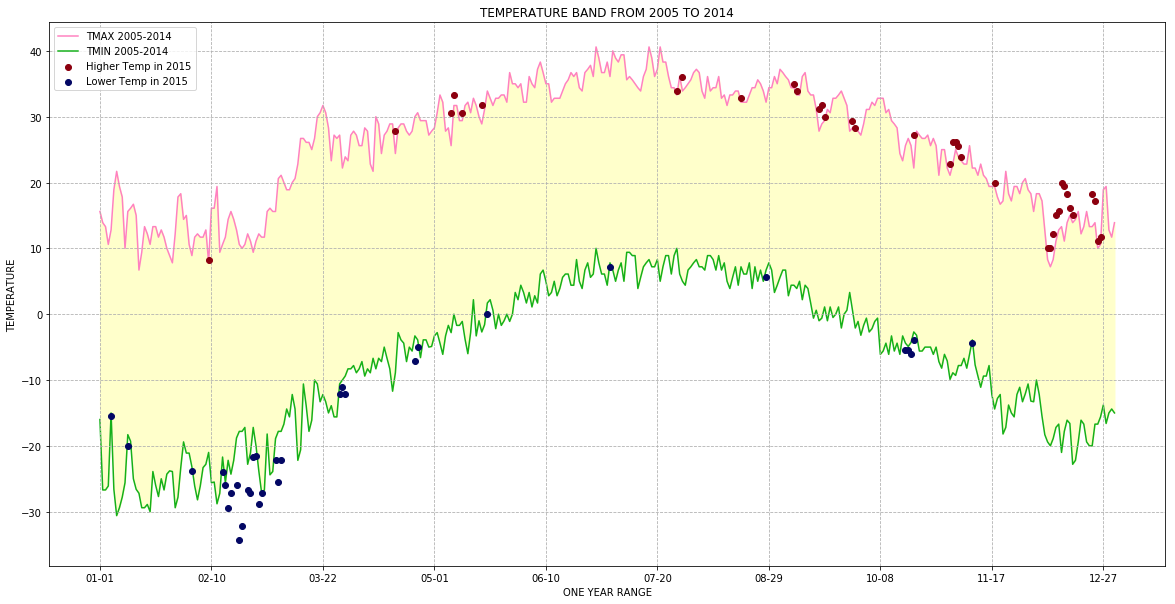

In [32]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import calendar


df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
df['Date'] =  pd.to_datetime(df['Date']) #把日期列的格式改成 datetime，方便后面筛选
#下一行：只去掉所有2月29日的数据
df = df.loc[~((df['Date'].dt.day==29) & (df['Date'].dt.month==2))]#分别提取月份和日期，dt.day;dt.month

df_05_14 = df.loc[(df['Date'] >= '2005-1-1') & (df['Date'] <= '2014-12-31')] #只保留2005-2014年间的数据

df_05_14 = df_05_14.sort_values(by = 'Date') #使用日期列进行升序排列
#下一行：使用groupby整理出每天TMAX对应value中的最大值。
df_05_14_max_all = df_05_14.loc[df_05_14['Element'] == 'TMAX'].groupby(by = 'Date').max() 
#下一行：使用groupby整理出每天TMIN对应value中的最【小】值。
df_05_14_min_all = df_05_14.loc[df_05_14['Element'] == 'TMIN'].groupby(by = 'Date').min() 
#下两行：使用 reset_index, 将Date变成column
df_05_14_max_all = df_05_14_max_all.reset_index()
df_05_14_min_all = df_05_14_min_all.reset_index()
df_05_14_max_all['Date'] = df_05_14_max_all['Date'].dt.strftime('%m-%d') #将日期中的年份去掉，只保留月日
df_05_14_min_all['Date'] = df_05_14_min_all['Date'].dt.strftime('%m-%d') #将日期中的年份去掉，只保留月日
'''下两行：以月日为单位，把过去10年中每天的最高温和最低温提取出来'''
df_05_14_max = df_05_14_max_all.loc[df_05_14_max_all['Element'] == 'TMAX'].groupby(by = 'Date').max()
df_05_14_max['Data_Value'] = df_05_14_max['Data_Value']/10 #将TMAX的Data_Value除以10
df_05_14_min = df_05_14_min_all.loc[df_05_14_min_all['Element'] == 'TMIN'].groupby(by = 'Date').min()
df_05_14_min['Data_Value'] = df_05_14_min['Data_Value']/10 #将TMIN的Data_Value除以10
df_05_14_maxmin = pd.merge(df_05_14_max.reset_index(),df_05_14_min.reset_index(),on=['Date']) #将max和min的值merge在一个df中

df_15 = df.loc[(df['Date'] >= '2015-1-1') & (df['Date'] <= '2015-12-31')] #只保留2015年间的数据
df_15 = df_15.sort_values(by = 'Date') #使用日期列进行升序排列
df_15['Date'] = df_15['Date'].dt.strftime('%m-%d') #将日期中的年份去掉，只保留月日
#下一行：使用groupby整理出2015年数据中，每天TMAX对应value中的最大值。
df_15_max_all = df_15.loc[df_15['Element'] == 'TMAX'].groupby(by = 'Date').max()
df_15_max_all['Data_Value'] = df_15_max_all['Data_Value']/10 #将TMAX的Data_Value除以10
#下一行：使用groupby整理出2015年数据中，每天TMIN对应value中的最【小】值。
df_15_min_all = df_15.loc[df_15['Element'] == 'TMIN'].groupby(by = 'Date').min()
df_15_min_all['Data_Value'] = df_15_min_all['Data_Value']/10 #将TMIN的Data_Value除以10

df_15_max_higher = df_15_max_all.loc[df_15_max_all['Data_Value'] > df_05_14_max['Data_Value']] #将2015年数据中大于过去10年最高温的行筛选出来
df_15_max_higher = df_15_max_higher.reset_index() #重置index，即将 Date 变成column
df_15_min_lower = df_15_min_all.loc[df_15_min_all['Data_Value'] < df_05_14_min['Data_Value']] #将2015年数据中【小】于过去10年最低温的行筛选出来
df_15_min_lower = df_15_min_lower.reset_index() #重置index，即将 Date 变成column

df_05_14_maxmin_15_all = df_05_14_maxmin.merge(df_15_max_higher,how='left', left_on='Date', right_on='Date')
df_05_14_maxmin_15_all = df_05_14_maxmin_15_all.merge(df_15_min_lower,how='left', left_on='Date', right_on='Date')

'''去掉没用的column'''
df_05_14_maxmin_15_all = df_05_14_maxmin_15_all.drop(['ID_x','ID_y'], axis=1)

df_05_14_maxmin_15_all.columns = ['Date','drop','05_14_TMAX','drop','05_14_TMIN','drop','15_Higher_Value','drop','15_Lower_Value']
'''去掉没用的column'''
df_05_14_maxmin_15_all = df_05_14_maxmin_15_all.drop('drop', axis=1)

'''【把前10年温度曲线和2015年的plot出来】'''
fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(111) #1x1 grid,1行x1列

ax.scatter(df_05_14_maxmin_15_all['Date'],df_05_14_maxmin_15_all['15_Higher_Value'],color = 'xkcd:crimson',marker = 'o',label='Higher Temp in 2015',zorder=2)
ax.scatter(df_05_14_maxmin_15_all['Date'],df_05_14_maxmin_15_all['15_Lower_Value'],color = 'xkcd:darkblue',marker = 'o',label='Lower Temp in 2015',zorder=2)
ax.plot(df_05_14_maxmin_15_all['Date'],df_05_14_maxmin_15_all['05_14_TMAX'],ls='-',label='TMAX 2005-2014',color='xkcd:pink',zorder=1)
ax.plot(df_05_14_maxmin_15_all['Date'],df_05_14_maxmin_15_all['05_14_TMIN'],ls='-',label='TMIN 2005-2014',color = 'xkcd:green',zorder=1)
ax.fill_between(df_05_14_maxmin_15_all['Date'],df_05_14_maxmin_15_all['05_14_TMAX'],df_05_14_maxmin_15_all['05_14_TMIN'],color = 'xkcd:ivory')
ax.grid(ls = '--')
ax.xaxis.set_major_locator(plt.MaxNLocator(12))

plt.legend(loc=2)
plt.title('TEMPERATURE BAND FROM 2005 TO 2014')
plt.xlabel('ONE YEAR RANGE')
plt.ylabel('TEMPERATURE')
#plt.show()
plt.savefig('TEMPERATURE BAND FROM 2005 TO 2014.png')







## Applied Machine Learning, Module 1:  A simple classification task

### Import required modules and load data file

In [ ]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

fruits = pd.read_table('fruit_data_with_colors.txt')

In [ ]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [ ]:
# create a mapping from fruit label value to fruit name to make results easier to interpret
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))   
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

The file contains the mass, height, and width of a selection of oranges, lemons and apples. The heights were measured along the core of the fruit. The widths were the widest width perpendicular to the height.

### Examining the data

In [ ]:
# plotting a scatter matrix
from matplotlib import cm

X = fruits[['height', 'width', 'mass', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

cmap = cm.get_cmap('gnuplot')
scatter = pd.scatter_matrix(X_train, c= y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)

In [ ]:
# plotting a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c = y_train, marker = 'o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

### Create train-test split

In [ ]:
# For this example, we use the mass, width, and height features of each fruit instance
X = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']

# default is 75% / 25% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Create classifier object

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

### Train the classifier (fit the estimator) using the training data

In [ ]:
knn.fit(X_train, y_train)

### Estimate the accuracy of the classifier on future data, using the test data

In [ ]:
knn.score(X_test, y_test)

### Use the trained k-NN classifier model to classify new, previously unseen objects

In [ ]:
# first example: a small fruit with mass 20g, width 4.3 cm, height 5.5 cm
fruit_prediction = knn.predict([[20, 4.3, 5.5]])
lookup_fruit_name[fruit_prediction[0]]

In [ ]:
# second example: a larger, elongated fruit with mass 100g, width 6.3 cm, height 8.5 cm
fruit_prediction = knn.predict([[100, 6.3, 8.5]])
lookup_fruit_name[fruit_prediction[0]]

### Plot the decision boundaries of the k-NN classifier

In [ ]:
from adspy_shared_utilities import plot_fruit_knn

plot_fruit_knn(X_train, y_train, 5, 'uniform')   # we choose 5 nearest neighbors

### How sensitive is k-NN classification accuracy to the choice of the 'k' parameter?

In [ ]:
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);

### How sensitive is k-NN classification accuracy to the train/test split proportion?

In [ ]:
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors = 5)

plt.figure()

for s in t:

    scores = []
    for i in range(1,1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');

# Applied Machine Learning: Module 2 (Supervised Learning, Part I)

## Preamble and Review

In [1]:
'''【测！试！代！码！】'''


%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

np.set_printoptions(precision=2)


fruits = pd.read_table('fruit_data_with_colors.txt')

fruits.head()

feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon'] 

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X_fruits, y_fruits, random_state=0)



/Users/xiucat/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  app.launch_new_instance()


In [2]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

np.set_printoptions(precision=2)


fruits = pd.read_table('fruit_data_with_colors.txt')

feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X_fruits, y_fruits, random_state=0)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
# we must apply the scaling to the test set that we computed for the training set
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_scaled, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_scaled, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test_scaled, y_test)))

example_fruit = [[5.5, 2.2, 10, 0.70]]
print('Predicted fruit type for ', example_fruit, ' is ', 
      target_names_fruits[knn.predict(example_fruit)[0]-1])

Accuracy of K-NN classifier on training set: 0.95
Accuracy of K-NN classifier on test set: 1.00
Predicted fruit type for  [[5.5, 2.2, 10, 0.7]]  is  orange


/Users/xiucat/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  del sys.path[0]


## Datasets

In [3]:
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer
from adspy_shared_utilities import load_crime_dataset

cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])


# synthetic dataset for simple regression
from sklearn.datasets import make_regression
plt.figure()
plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()


# synthetic dataset for more complex regression
from sklearn.datasets import make_friedman1
plt.figure()
plt.title('Complex regression problem with one input variable')
X_F1, y_F1 = make_friedman1(n_samples = 100,
                           n_features = 7, random_state=0)

plt.scatter(X_F1[:, 2], y_F1, marker= 'o', s=50)
plt.show()

# synthetic dataset for classification (binary) 
plt.figure()
plt.title('Sample binary classification problem with two informative features')
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
plt.scatter(X_C2[:, 0], X_C2[:, 1], c=y_C2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()


# more difficult synthetic dataset for classification (binary) 
# with classes that are not linearly separable
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()


# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)


# Communities and Crime dataset
(X_crime, y_crime) = load_crime_dataset()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/Users/xiucat/googledrive/OneDrive/code/data_science_study/adspy_shared_utilities.py:19: FutureWarning: read_table is deprecated, use read_csv instead.
  crime = pd.read_table('CommViolPredUnnormalizedData.txt', sep=',', na_values='?')


## K-Nearest Neighbors

### Classification

In [ ]:
from adspy_shared_utilities import plot_two_class_knn

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2,
                                                   random_state=0)

plot_two_class_knn(X_train, y_train, 1, 'uniform', X_test, y_test)
plot_two_class_knn(X_train, y_train, 3, 'uniform', X_test, y_test)
plot_two_class_knn(X_train, y_train, 11, 'uniform', X_test, y_test)

### Regression

In [ ]:
'''【已经放入 BT-TI 进行测试】'''

from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state = 0)

knnreg = KNeighborsRegressor(n_neighbors = 5).fit(X_train, y_train)

print(knnreg.predict(X_test))
print('R-squared test score: {:.3f}'
     .format(knnreg.score(X_test, y_test)))

In [ ]:
fig, subaxes = plt.subplots(1, 2, figsize=(8,4))
X_predict_input = np.linspace(-3, 3, 50).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_R1[0::5], y_R1[0::5], random_state = 0)

for thisaxis, K in zip(subaxes, [1, 3]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    thisaxis.set_xlim([-2.5, 0.75])
    thisaxis.plot(X_predict_input, y_predict_output, '^', markersize = 10,
                 label='Predicted', alpha=0.8)
    thisaxis.plot(X_train, y_train, 'o', label='True Value', alpha=0.8)
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN regression (K={})'.format(K))
    thisaxis.legend()
plt.tight_layout()

### Regression model complexity as a function of K

In [ ]:
# plot k-NN regression on sample dataset for different values of K
fig, subaxes = plt.subplots(5, 1, figsize=(5,20))
X_predict_input = np.linspace(-3, 3, 500).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,
                                                   random_state = 0)

for thisaxis, K in zip(subaxes, [1, 3, 7, 15, 55]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    train_score = knnreg.score(X_train, y_train)
    test_score = knnreg.score(X_test, y_test)
    thisaxis.plot(X_predict_input, y_predict_output)
    thisaxis.plot(X_train, y_train, 'o', alpha=0.9, label='Train')
    thisaxis.plot(X_test, y_test, '^', alpha=0.9, label='Test')
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN Regression (K={})\n\
Train $R^2 = {:.3f}$,  Test $R^2 = {:.3f}$'
                      .format(K, train_score, test_score))
    thisaxis.legend()
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)


## Linear models for regression

### Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

### Linear regression: example plot 

In [ ]:
plt.figure(figsize=(5,4))
plt.scatter(X_R1, y_R1, marker= 'o', s=50, alpha=0.8)
plt.plot(X_R1, linreg.coef_ * X_R1 + linreg.intercept_, 'r-')
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('Crime dataset')
print('linear model intercept: {}'
     .format(linreg.intercept_))
print('linear model coeff:\n{}'
     .format(linreg.coef_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

### Ridge regression

In [1]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)

linridge = Ridge(alpha=20.0).fit(X_train, y_train)

#print('Crime dataset')
#print('ridge regression linear model intercept: {}'
#     .format(linridge.intercept_))
#print('ridge regression linear model coeff:\n{}'
#     .format(linridge.coef_))
#print('R-squared score (training): {:.3f}'
#     .format(linridge.score(X_train, y_train)))
#print('R-squared score (test): {:.3f}'
#     .format(linridge.score(X_test, y_test)))
#print('Number of non-zero features: {}'
#     .format(np.sum(linridge.coef_ != 0)))

y_crime



NameError: name 'train_test_split' is not defined

#### Ridge regression with feature normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linridge = Ridge(alpha=20.0).fit(X_train_scaled, y_train)

print('Crime dataset')
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test_scaled, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

#### Ridge regression with regularization parameter: alpha

In [ ]:
print('Ridge regression: effect of alpha regularization parameter\n')
for this_alpha in [0, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(X_train_scaled, y_train)
    r2_train = linridge.score(X_train_scaled, y_train)
    r2_test = linridge.score(X_test_scaled, y_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

### Lasso regression

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linlasso = Lasso(alpha=2.0, max_iter = 10000).fit(X_train_scaled, y_train)

print('Crime dataset')
print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test_scaled, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')

for e in sorted (list(zip(list(X_crime), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

#### Lasso regression with regularization parameter: alpha

In [ ]:
print('Lasso regression: effect of alpha regularization\n\
parameter on number of features kept in final model\n')

for alpha in [0.5, 1, 2, 3, 5, 10, 20, 50]:
    linlasso = Lasso(alpha, max_iter = 10000).fit(X_train_scaled, y_train)
    r2_train = linlasso.score(X_train_scaled, y_train)
    r2_test = linlasso.score(X_test_scaled, y_test)
    
    print('Alpha = {:.2f}\nFeatures kept: {}, r-squared training: {:.2f}, \
r-squared test: {:.2f}\n'
         .format(alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))

### Polynomial regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures


X_train, X_test, y_train, y_test = train_test_split(X_F1, y_F1,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

print('\nNow we transform the original input data to add\n\
polynomial features up to degree 2 (quadratic)\n')
poly = PolynomialFeatures(degree=2)
X_F1_poly = poly.fit_transform(X_F1)

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('(poly deg 2) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 2) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2) R-squared score (test): {:.3f}\n'
     .format(linreg.score(X_test, y_test)))

print('\nAddition of many polynomial features often leads to\n\
overfitting, so we often use polynomial features in combination\n\
with regression that has a regularization penalty, like ridge\n\
regression.\n')

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1,
                                                   random_state = 0)
linreg = Ridge().fit(X_train, y_train)

print('(poly deg 2 + ridge) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2 + ridge) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 2 + ridge) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2 + ridge) R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

## Linear models for classification

### Logistic regression

#### Logistic regression for binary classification on fruits dataset using height, width features (positive class: apple, negative class: others)

In [ ]:
from sklearn.linear_model import LogisticRegression
from adspy_shared_utilities import (
plot_class_regions_for_classifier_subplot)

fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))
y_fruits_apple = y_fruits_2d == 1   # make into a binary problem: apples vs everything else
X_train, X_test, y_train, y_test = (
train_test_split(X_fruits_2d.as_matrix(),
                y_fruits_apple.as_matrix(),
                random_state = 0))

clf = LogisticRegression(C=100).fit(X_train, y_train)
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None,
                                         None, 'Logistic regression \
for binary classification\nFruit dataset: Apple vs others',
                                         subaxes)

h = 6
w = 8
print('A fruit with height {} and width {} is predicted to be: {}'
     .format(h,w, ['not an apple', 'an apple'][clf.predict([[h,w]])[0]]))

h = 10
w = 7
print('A fruit with height {} and width {} is predicted to be: {}'
     .format(h,w, ['not an apple', 'an apple'][clf.predict([[h,w]])[0]]))
subaxes.set_xlabel('height')
subaxes.set_ylabel('width')

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

#### Logistic regression on simple synthetic dataset

In [ ]:
from sklearn.linear_model import LogisticRegression
from adspy_shared_utilities import (
plot_class_regions_for_classifier_subplot)


X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2,
                                                   random_state = 0)

fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))
clf = LogisticRegression().fit(X_train, y_train)
title = 'Logistic regression, simple synthetic dataset C = {:.3f}'.format(1.0)
plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                         None, None, title, subaxes)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))
     

#### Logistic regression regularization: C parameter

In [ ]:
X_train, X_test, y_train, y_test = (
train_test_split(X_fruits_2d.as_matrix(),
                y_fruits_apple.as_matrix(),
                random_state=0))

fig, subaxes = plt.subplots(3, 1, figsize=(4, 10))

for this_C, subplot in zip([0.1, 1, 100], subaxes):
    clf = LogisticRegression(C=this_C).fit(X_train, y_train)
    title ='Logistic regression (apple vs rest), C = {:.3f}'.format(this_C)
    
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                             X_test, y_test, title,
                                             subplot)
plt.tight_layout()

#### Application to real dataset

In [ ]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = LogisticRegression().fit(X_train, y_train)
print('Breast cancer dataset')
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

### Support Vector Machines

#### Linear Support Vector Machine

In [ ]:
from sklearn.svm import SVC
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot


X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state = 0)

fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))
this_C = 1.0
clf = SVC(kernel = 'linear', C=this_C).fit(X_train, y_train)
title = 'Linear SVC, C = {:.3f}'.format(this_C)
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None, None, title, subaxes)

#### Linear Support Vector Machine: C parameter

In [ ]:
from sklearn.svm import LinearSVC
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state = 0)
fig, subaxes = plt.subplots(1, 2, figsize=(8, 4))

for this_C, subplot in zip([0.00001, 100], subaxes):
    clf = LinearSVC(C=this_C).fit(X_train, y_train)
    title = 'Linear SVC, C = {:.5f}'.format(this_C)
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                             None, None, title, subplot)
plt.tight_layout()

#### Application to real dataset

In [ ]:
from sklearn.svm import LinearSVC
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = LinearSVC().fit(X_train, y_train)
print('Breast cancer dataset')
print('Accuracy of Linear SVC classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Linear SVC classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

### Multi-class classification with linear models

#### LinearSVC with M classes generates M one vs rest classifiers.

In [ ]:
from sklearn.svm import LinearSVC

X_train, X_test, y_train, y_test = train_test_split(X_fruits_2d, y_fruits_2d, random_state = 0)

clf = LinearSVC(C=5, random_state = 67).fit(X_train, y_train)
print('Coefficients:\n', clf.coef_)
print('Intercepts:\n', clf.intercept_)

#### Multi-class results on the fruit dataset

In [ ]:
plt.figure(figsize=(6,6))
colors = ['r', 'g', 'b', 'y']
cmap_fruits = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#FFFF00'])

plt.scatter(X_fruits_2d[['height']], X_fruits_2d[['width']],
           c=y_fruits_2d, cmap=cmap_fruits, edgecolor = 'black', alpha=.7)

x_0_range = np.linspace(-10, 15)

for w, b, color in zip(clf.coef_, clf.intercept_, ['r', 'g', 'b', 'y']):
    # Since class prediction with a linear model uses the formula y = w_0 x_0 + w_1 x_1 + b, 
    # and the decision boundary is defined as being all points with y = 0, to plot x_1 as a 
    # function of x_0 we just solve w_0 x_0 + w_1 x_1 + b = 0 for x_1:
    plt.plot(x_0_range, -(x_0_range * w[0] + b) / w[1], c=color, alpha=.8)
    
plt.legend(target_names_fruits)
plt.xlabel('height')
plt.ylabel('width')
plt.xlim(-2, 12)
plt.ylim(-2, 15)
plt.show()

## Kernelized Support Vector Machines

### Classification

In [ ]:
from sklearn.svm import SVC
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)

# The default SVC kernel is radial basis function (RBF)
plot_class_regions_for_classifier(SVC().fit(X_train, y_train),
                                 X_train, y_train, None, None,
                                 'Support Vector Classifier: RBF kernel')

# Compare decision boundries with polynomial kernel, degree = 3
plot_class_regions_for_classifier(SVC(kernel = 'poly', degree = 3)
                                 .fit(X_train, y_train), X_train,
                                 y_train, None, None,
                                 'Support Vector Classifier: Polynomial kernel, degree = 3')

#### Support Vector Machine with RBF kernel: gamma parameter

In [ ]:
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)
fig, subaxes = plt.subplots(3, 1, figsize=(4, 11))

for this_gamma, subplot in zip([0.01, 1.0, 10.0], subaxes):
    clf = SVC(kernel = 'rbf', gamma=this_gamma).fit(X_train, y_train)
    title = 'Support Vector Classifier: \nRBF kernel, gamma = {:.2f}'.format(this_gamma)
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                             None, None, title, subplot)
    plt.tight_layout()

#### Support Vector Machine with RBF kernel: using both C and gamma parameter 

In [ ]:
from sklearn.svm import SVC
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)
fig, subaxes = plt.subplots(3, 4, figsize=(15, 10), dpi=50)

for this_gamma, this_axis in zip([0.01, 1, 5], subaxes):
    
    for this_C, subplot in zip([0.1, 1, 15, 250], this_axis):
        title = 'gamma = {:.2f}, C = {:.2f}'.format(this_gamma, this_C)
        clf = SVC(kernel = 'rbf', gamma = this_gamma,
                 C = this_C).fit(X_train, y_train)
        plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                                 X_test, y_test, title,
                                                 subplot)
        plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

### Application of SVMs to a real dataset: unnormalized data

In [ ]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer,
                                                   random_state = 0)

clf = SVC(C=10).fit(X_train, y_train)
print('Breast cancer dataset (unnormalized features)')
print('Accuracy of RBF-kernel SVC on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RBF-kernel SVC on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

### Application of SVMs to a real dataset: normalized data with feature preprocessing using minmax scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = SVC(C=10).fit(X_train_scaled, y_train)
print('Breast cancer dataset (normalized with MinMax scaling)')
print('RBF-kernel SVC (with MinMax scaling) training set accuracy: {:.2f}'
     .format(clf.score(X_train_scaled, y_train)))
print('RBF-kernel SVC (with MinMax scaling) test set accuracy: {:.2f}'
     .format(clf.score(X_test_scaled, y_test)))

## Cross-validation

### Example based on k-NN classifier with fruit dataset (2 features)

In [ ]:
from sklearn.model_selection import cross_val_score

clf = KNeighborsClassifier(n_neighbors = 5)
X = X_fruits_2d.as_matrix()
y = y_fruits_2d.as_matrix()
cv_scores = cross_val_score(clf, X, y)

print('Cross-validation scores (3-fold):', cv_scores)
print('Mean cross-validation score (3-fold): {:.3f}'
     .format(np.mean(cv_scores)))

### A note on performing cross-validation for more advanced scenarios.

In some cases (e.g. when feature values have very different ranges), we've seen the need to scale or normalize the training and test sets before use with a classifier. The proper way to do cross-validation when you need to scale the data is *not* to scale the entire dataset with a single transform, since this will indirectly leak information into the training data about the whole dataset, including the test data (see the lecture on data leakage later in the course).  Instead, scaling/normalizing must be computed and applied for each cross-validation fold separately.  To do this, the easiest way in scikit-learn is to use *pipelines*.  While these are beyond the scope of this course, further information is available in the scikit-learn documentation here:

http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

or the Pipeline section in the recommended textbook: Introduction to Machine Learning with Python by Andreas C. Müller and Sarah Guido (O'Reilly Media).

## Validation curve example

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

param_range = np.logspace(-3, 3, 4)
train_scores, test_scores = validation_curve(SVC(), X, y,
                                            param_name='gamma',
                                            param_range=param_range, cv=3)

In [ ]:
print(train_scores)

In [ ]:
print(test_scores)

In [ ]:
# This code based on scikit-learn validation_plot example
#  See:  http://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html
plt.figure()

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title('Validation Curve with SVM')
plt.xlabel('$\gamma$ (gamma)')
plt.ylabel('Score')
plt.ylim(0.0, 1.1)
lw = 2

plt.semilogx(param_range, train_scores_mean, label='Training score',
            color='darkorange', lw=lw)

plt.fill_between(param_range, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.2,
                color='darkorange', lw=lw)

plt.semilogx(param_range, test_scores_mean, label='Cross-validation score',
            color='navy', lw=lw)

plt.fill_between(param_range, test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, alpha=0.2,
                color='navy', lw=lw)

plt.legend(loc='best')
plt.show()

## Decision Trees

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_decision_tree
from sklearn.model_selection import train_test_split


iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 3)
clf = DecisionTreeClassifier().fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

#### Setting max decision tree depth to help avoid overfitting

In [ ]:
clf2 = DecisionTreeClassifier(max_depth = 3).fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf2.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf2.score(X_test, y_test)))

#### Visualizing decision trees

In [ ]:
plot_decision_tree(clf, iris.feature_names, iris.target_names)

#### Pre-pruned version (max_depth = 3)

In [ ]:
plot_decision_tree(clf2, iris.feature_names, iris.target_names)

#### Feature importance

In [ ]:
from adspy_shared_utilities import plot_feature_importances

plt.figure(figsize=(10,4), dpi=80)
plot_feature_importances(clf, iris.feature_names)
plt.show()

print('Feature importances: {}'.format(clf.feature_importances_))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 0)
fig, subaxes = plt.subplots(6, 1, figsize=(6, 32))

pair_list = [[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]]
tree_max_depth = 4

for pair, axis in zip(pair_list, subaxes):
    X = X_train[:, pair]
    y = y_train
    
    clf = DecisionTreeClassifier(max_depth=tree_max_depth).fit(X, y)
    title = 'Decision Tree, max_depth = {:d}'.format(tree_max_depth)
    plot_class_regions_for_classifier_subplot(clf, X, y, None,
                                             None, title, axis,
                                             iris.target_names)
    
    axis.set_xlabel(iris.feature_names[pair[0]])
    axis.set_ylabel(iris.feature_names[pair[1]])
    
plt.tight_layout()
plt.show()

#### Decision Trees on a real-world dataset

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_decision_tree
from adspy_shared_utilities import plot_feature_importances

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 8,
                            random_state = 0).fit(X_train, y_train)

plot_decision_tree(clf, cancer.feature_names, cancer.target_names)

In [ ]:
print('Breast cancer dataset: decision tree')
print('Accuracy of DT classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of DT classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

plt.figure(figsize=(10,6),dpi=80)
plot_feature_importances(clf, cancer.feature_names)
plt.tight_layout()

plt.show()

# Applied Machine Learning: Module 3 (Evaluation)

## Evaluation for Classification

### Preamble

In [ ]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

dataset = load_digits()
X, y = dataset.data, dataset.target

for class_name, class_count in zip(dataset.target_names, np.bincount(dataset.target)):
    print(class_name,class_count)

In [ ]:
# Creating a dataset with imbalanced binary classes:  
# Negative class (0) is 'not digit 1' 
# Positive class (1) is 'digit 1'
y_binary_imbalanced = y.copy()
y_binary_imbalanced[y_binary_imbalanced != 1] = 0

print('Original labels:\t', y[1:30])
print('New binary labels:\t', y_binary_imbalanced[1:30])

In [ ]:
np.bincount(y_binary_imbalanced)    # Negative class (0) is the most frequent class

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

# Accuracy of Support Vector Machine classifier
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=1).fit(X_train, y_train)
svm.score(X_test, y_test)

### Dummy Classifiers

DummyClassifier is a classifier that makes predictions using simple rules, which can be useful as a baseline for comparison against actual classifiers, especially with imbalanced classes.

In [ ]:
from sklearn.dummy import DummyClassifier

# Negative class (0) is most frequent
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
# Therefore the dummy 'most_frequent' classifier always predicts class 0
y_dummy_predictions = dummy_majority.predict(X_test)

y_dummy_predictions

In [ ]:
dummy_majority.score(X_test, y_test)

In [ ]:
svm = SVC(kernel='linear', C=1).fit(X_train, y_train)
svm.score(X_test, y_test)

### Confusion matrices

#### Binary (two-class) confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

# Negative class (0) is most frequent
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
y_majority_predicted = dummy_majority.predict(X_test)
confusion = confusion_matrix(y_test, y_majority_predicted)

print('Most frequent class (dummy classifier)\n', confusion)

In [ ]:
# produces random predictions w/ same class proportion as training set
dummy_classprop = DummyClassifier(strategy='stratified').fit(X_train, y_train)
y_classprop_predicted = dummy_classprop.predict(X_test)
confusion = confusion_matrix(y_test, y_classprop_predicted)

print('Random class-proportional prediction (dummy classifier)\n', confusion)

In [ ]:
svm = SVC(kernel='linear', C=1).fit(X_train, y_train)
svm_predicted = svm.predict(X_test)
confusion = confusion_matrix(y_test, svm_predicted)

print('Support vector machine classifier (linear kernel, C=1)\n', confusion)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X_train, y_train)
lr_predicted = lr.predict(X_test)
confusion = confusion_matrix(y_test, lr_predicted)

print('Logistic regression classifier (default settings)\n', confusion)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
tree_predicted = dt.predict(X_test)
confusion = confusion_matrix(y_test, tree_predicted)

print('Decision tree classifier (max_depth = 2)\n', confusion)

### Evaluation metrics for binary classification

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
# F1 = 2 * Precision * Recall / (Precision + Recall) 
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, tree_predicted)))
print('Precision: {:.2f}'.format(precision_score(y_test, tree_predicted)))
print('Recall: {:.2f}'.format(recall_score(y_test, tree_predicted)))
print('F1: {:.2f}'.format(f1_score(y_test, tree_predicted)))

In [ ]:
# Combined report with all above metrics
from sklearn.metrics import classification_report

print(classification_report(y_test, tree_predicted, target_names=['not 1', '1']))

In [ ]:
print('Random class-proportional (dummy)\n', 
      classification_report(y_test, y_classprop_predicted, target_names=['not 1', '1']))
print('SVM\n', 
      classification_report(y_test, svm_predicted, target_names = ['not 1', '1']))
print('Logistic regression\n', 
      classification_report(y_test, lr_predicted, target_names = ['not 1', '1']))
print('Decision tree\n', 
      classification_report(y_test, tree_predicted, target_names = ['not 1', '1']))

### Decision functions

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)
y_scores_lr = lr.fit(X_train, y_train).decision_function(X_test)
y_score_list = list(zip(y_test[0:20], y_scores_lr[0:20]))

# show the decision_function scores for first 20 instances
y_score_list

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)
y_proba_lr = lr.fit(X_train, y_train).predict_proba(X_test)
y_proba_list = list(zip(y_test[0:20], y_proba_lr[0:20,1]))

# show the probability of positive class for first 20 instances
y_proba_list

### Precision-recall curves

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_scores_lr)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

### ROC curves, Area-Under-Curve (AUC)

In [ ]:
from sklearn.metrics import roc_curve, auc

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

y_score_lr = lr.fit(X_train, y_train).decision_function(X_test)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

In [ ]:
from matplotlib import cm

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
for g in [0.01, 0.1, 0.20, 1]:
    svm = SVC(gamma=g).fit(X_train, y_train)
    y_score_svm = svm.decision_function(X_test)
    fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
    roc_auc_svm = auc(fpr_svm, tpr_svm)
    accuracy_svm = svm.score(X_test, y_test)
    print("gamma = {:.2f}  accuracy = {:.2f}   AUC = {:.2f}".format(g, accuracy_svm, 
                                                                    roc_auc_svm))
    plt.plot(fpr_svm, tpr_svm, lw=3, alpha=0.7, 
             label='SVM (gamma = {:0.2f}, area = {:0.2f})'.format(g, roc_auc_svm))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (1-of-10 digits classifier)', fontsize=16)
plt.axes().set_aspect('equal')

plt.show()

### Evaluation measures for multi-class classification

#### Multi-class confusion matrix

In [ ]:
dataset = load_digits()
X, y = dataset.data, dataset.target
X_train_mc, X_test_mc, y_train_mc, y_test_mc = train_test_split(X, y, random_state=0)


svm = SVC(kernel = 'linear').fit(X_train_mc, y_train_mc)
svm_predicted_mc = svm.predict(X_test_mc)
confusion_mc = confusion_matrix(y_test_mc, svm_predicted_mc)
df_cm = pd.DataFrame(confusion_mc, 
                     index = [i for i in range(0,10)], columns = [i for i in range(0,10)])

plt.figure(figsize=(5.5,4))
sns.heatmap(df_cm, annot=True)
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test_mc, 
                                                                       svm_predicted_mc)))
plt.ylabel('True label')
plt.xlabel('Predicted label')


svm = SVC(kernel = 'rbf').fit(X_train_mc, y_train_mc)
svm_predicted_mc = svm.predict(X_test_mc)
confusion_mc = confusion_matrix(y_test_mc, svm_predicted_mc)
df_cm = pd.DataFrame(confusion_mc, index = [i for i in range(0,10)],
                  columns = [i for i in range(0,10)])

plt.figure(figsize = (5.5,4))
sns.heatmap(df_cm, annot=True)
plt.title('SVM RBF Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test_mc, 
                                                                    svm_predicted_mc)))
plt.ylabel('True label')
plt.xlabel('Predicted label');

#### Multi-class classification report

In [ ]:
print(classification_report(y_test_mc, svm_predicted_mc))

#### Micro- vs. macro-averaged metrics

In [ ]:
print('Micro-averaged precision = {:.2f} (treat instances equally)'
      .format(precision_score(y_test_mc, svm_predicted_mc, average = 'micro')))
print('Macro-averaged precision = {:.2f} (treat classes equally)'
      .format(precision_score(y_test_mc, svm_predicted_mc, average = 'macro')))

In [ ]:
print('Micro-averaged f1 = {:.2f} (treat instances equally)'
      .format(f1_score(y_test_mc, svm_predicted_mc, average = 'micro')))
print('Macro-averaged f1 = {:.2f} (treat classes equally)'
      .format(f1_score(y_test_mc, svm_predicted_mc, average = 'macro')))

### Regression evaluation metrics

In [ ]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor

diabetes = datasets.load_diabetes()

X = diabetes.data[:, None, 6]
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

lm = LinearRegression().fit(X_train, y_train)
lm_dummy_mean = DummyRegressor(strategy = 'mean').fit(X_train, y_train)

y_predict = lm.predict(X_test)
y_predict_dummy_mean = lm_dummy_mean.predict(X_test)

print('Linear model, coefficients: ', lm.coef_)
print("Mean squared error (dummy): {:.2f}".format(mean_squared_error(y_test, 
                                                                     y_predict_dummy_mean)))
print("Mean squared error (linear model): {:.2f}".format(mean_squared_error(y_test, y_predict)))
print("r2_score (dummy): {:.2f}".format(r2_score(y_test, y_predict_dummy_mean)))
print("r2_score (linear model): {:.2f}".format(r2_score(y_test, y_predict)))

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_predict, color='green', linewidth=2)
plt.plot(X_test, y_predict_dummy_mean, color='red', linestyle = 'dashed', 
         linewidth=2, label = 'dummy')

plt.show()

### Model selection using evaluation metrics

#### Cross-validation example

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

dataset = load_digits()
# again, making this a binary problem with 'digit 1' as positive class 
# and 'not 1' as negative class
X, y = dataset.data, dataset.target == 1
clf = SVC(kernel='linear', C=1)

# accuracy is the default scoring metric
print('Cross-validation (accuracy)', cross_val_score(clf, X, y, cv=5))
# use AUC as scoring metric
print('Cross-validation (AUC)', cross_val_score(clf, X, y, cv=5, scoring = 'roc_auc'))
# use recall as scoring metric
print('Cross-validation (recall)', cross_val_score(clf, X, y, cv=5, scoring = 'recall'))

#### Grid search example

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

dataset = load_digits()
X, y = dataset.data, dataset.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = SVC(kernel='rbf')
grid_values = {'gamma': [0.001, 0.01, 0.05, 0.1, 1, 10, 100]}

# default metric to optimize over grid parameters: accuracy
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values)
grid_clf_acc.fit(X_train, y_train)
y_decision_fn_scores_acc = grid_clf_acc.decision_function(X_test) 

print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc.best_score_)

# alternative metric to optimize over grid parameters: AUC
grid_clf_auc = GridSearchCV(clf, param_grid = grid_values, scoring = 'roc_auc')
grid_clf_auc.fit(X_train, y_train)
y_decision_fn_scores_auc = grid_clf_auc.decision_function(X_test) 

print('Test set AUC: ', roc_auc_score(y_test, y_decision_fn_scores_auc))
print('Grid best parameter (max. AUC): ', grid_clf_auc.best_params_)
print('Grid best score (AUC): ', grid_clf_auc.best_score_)


#### Evaluation metrics supported for model selection

In [ ]:
from sklearn.metrics.scorer import SCORERS

print(sorted(list(SCORERS.keys())))

### Two-feature classification example using the digits dataset

#### Optimizing a classifier using different evaluation metrics

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


dataset = load_digits()
X, y = dataset.data, dataset.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Create a two-feature input vector matching the example plot above
# We jitter the points (add a small amount of random noise) in case there are areas
# in feature space where many instances have the same features.
jitter_delta = 0.25
X_twovar_train = X_train[:,[20,59]]+ np.random.rand(X_train.shape[0], 2) - jitter_delta
X_twovar_test  = X_test[:,[20,59]] + np.random.rand(X_test.shape[0], 2) - jitter_delta

clf = SVC(kernel = 'linear').fit(X_twovar_train, y_train)
grid_values = {'class_weight':['balanced', {1:2},{1:3},{1:4},{1:5},{1:10},{1:20},{1:50}]}
plt.figure(figsize=(9,6))
for i, eval_metric in enumerate(('precision','recall', 'f1','roc_auc')):
    grid_clf_custom = GridSearchCV(clf, param_grid=grid_values, scoring=eval_metric)
    grid_clf_custom.fit(X_twovar_train, y_train)
    print('Grid best parameter (max. {0}): {1}'
          .format(eval_metric, grid_clf_custom.best_params_))
    print('Grid best score ({0}): {1}'
          .format(eval_metric, grid_clf_custom.best_score_))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    plot_class_regions_for_classifier_subplot(grid_clf_custom, X_twovar_test, y_test, None,
                                             None, None,  plt.subplot(2, 2, i+1))
    
    plt.title(eval_metric+'-oriented SVC')
plt.tight_layout()
plt.show()

#### Precision-recall curve for the default SVC classifier (with balanced class weights)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from adspy_shared_utilities import plot_class_regions_for_classifier
from sklearn.svm import SVC

dataset = load_digits()
X, y = dataset.data, dataset.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# create a two-feature input vector matching the example plot above
jitter_delta = 0.25
X_twovar_train = X_train[:,[20,59]]+ np.random.rand(X_train.shape[0], 2) - jitter_delta
X_twovar_test  = X_test[:,[20,59]] + np.random.rand(X_test.shape[0], 2) - jitter_delta

clf = SVC(kernel='linear', class_weight='balanced').fit(X_twovar_train, y_train)

y_scores = clf.decision_function(X_twovar_test)

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plot_class_regions_for_classifier(clf, X_twovar_test, y_test)
plt.title("SVC, class_weight = 'balanced', optimized for accuracy")
plt.show()

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.title ("Precision-recall curve: SVC, class_weight = 'balanced'")
plt.plot(precision, recall, label = 'Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize=12, fillstyle='none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()
print('At zero threshold, precision: {:.2f}, recall: {:.2f}'
      .format(closest_zero_p, closest_zero_r))

In [ ]:
'''string的名称替换（修改）'''

FI_US_CLEANED.columns = FI_US_CLEANED.columns.str.replace(' ', '_') #将df的column名中的所有空格替换成其他符号（或者去掉）
FI_US_CLEANED.columns = FI_US_CLEANED.columns.str.replace('(', 'of_') #将df的column名中的所有左(替换成of_
FI_US_CLEANED.columns = FI_US_CLEANED.columns.str.replace(')', '') #将df的column名中的所有右)去掉
FI_US_CLEANED.columns = FI_US_CLEANED.columns.str.replace('/', '-') #将df的column名中的所有/替换成-
FI_US_CLEANED.columns = FI_US_CLEANED.columns.str.replace('&amp;', '') #将df的column名中的所有 &amp; 去掉
FI_US_CLEANED.columns = FI_US_CLEANED.columns.str.replace(',', '') #将df的column名中的所有 , 去掉

In [ ]:
'''测试'''

### 条件一【RSI patterns RSI特征】Mandatory

#### 第一步，2ndhigh 点

/Users/xiucat/anaconda3/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


,time,RSI
0,2004-08-19,0.0
1,2004-08-20,0.0
2,2004-08-23,0.0
3,2004-08-24,0.0
4,2004-08-25,0.0


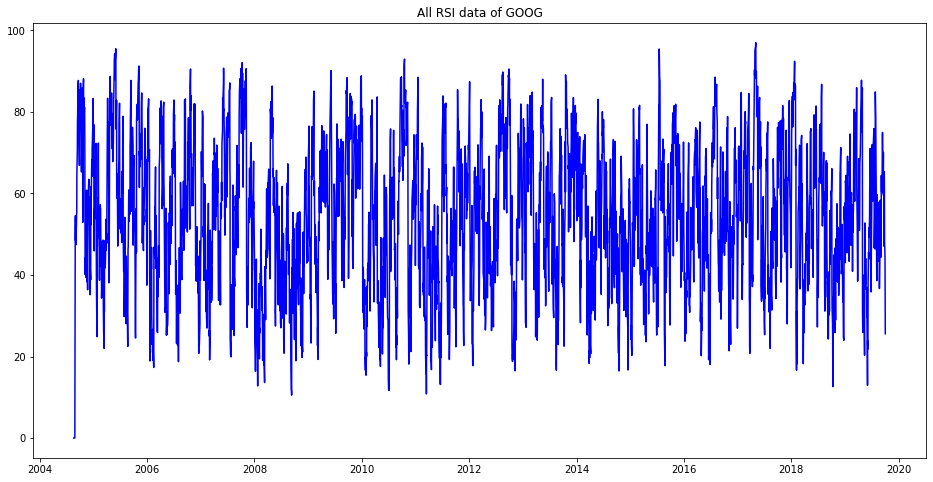

In [4]:
'''对RSI数据进行简单的plot'''

'''读取选定的symbol的ti数据表'''
#for i in tickers_list[0:1]:

'''选定测试用symbol和ti指标'''
test_symbol = 'GOOG'
test_ti = 'RSI'


'''打开对应symbol的数据csv'''
try:
    #下一行：使用 index_col = 0 去掉烦人的index列
    #all_rsi_data = pd.read_csv('./ti_us_daily/' + ti_name + '_%s.csv' %i, index_col=0, squeeze=True, date_parser=parser) 
    all_rsi_data = pd.read_csv('./ti_us_daily/' + ti_name + '_' + test_symbol + '.csv', index_col=0)
    #all_rsi_data = all_rsi_data.iloc[::-1]#因为源数据为降序排列（从新到旧），将其reverse为升序（从旧到新）
    all_rsi_data = pd.DataFrame({'time': pd.to_datetime(all_rsi_data['time']), test_ti: all_rsi_data[test_ti]}) #将日期时间转成 datetime 格式；并且只保留 time 和 RSI 两列
except (pd.errors.ParserError,FileNotFoundError): #有些symbol价格文档是html错误页面代码（爬取问题），在此使用except跳过
    #continue
    pass
    

#plt.plot(all_rsi_data['RSI'])
plt.figure(figsize=(16,8))
plt.plot(all_rsi_data['time'],all_rsi_data[test_ti],color='blue')
#plt.scatter(all_rsi_data['time'],all_rsi_data['RSI'],color='blue') # marker='o'
# the default color of line is red
plt.title('All ' + test_ti + ' data of ' + test_symbol)
#plt.ylabel()
#plt.xlabel()
#plt.show()

all_rsi_data.head()


In [5]:
'''【第一步】：【找出所有满足条件的 2ndhigh range】'''



'''【找点的区间距离（半径）interval number】'''
i_n = 5


#all_rsi_data = pd.read_csv('./ti_us_daily/ti_list3_GOOG.csv')
#all_rsi_data = all_rsi_data.iloc[::-1]#因为来自ti_us_daily的源数据为升序排列（从旧到新），将其reverse为降序（从新到旧）
#all_rsi_data = pd.DataFrame({'time': pd.to_datetime(all_rsi_data['time']),'RSI': all_rsi_data['RSI']}) #将日期时间转成 datetime 格式；并且只保留 time 和 RSI 两列

'''给潜在的 2ndhigh 点加column：每个RSI与前后值之间的差值'''
RSI_pre = all_rsi_data[test_ti].diff(periods = -1) # diff() 用来计算相邻行row之间的差值
all_rsi_data['RSI_minusByPre'] = RSI_pre.shift(1) #use shift() 用来将整列column上移或下移
RSI_post = all_rsi_data[test_ti].diff()
all_rsi_data['RSI_minusByPost'] = RSI_post.shift(-1)
#下一行：potential_2ndhigh：all_rsi_data中所有左右两侧都小于自己的点，是个DataFrame
potential_2ndhigh_rsi = all_rsi_data[ (all_rsi_data['RSI_minusByPre'] < 0) & (all_rsi_data['RSI_minusByPost'] < 0) ]
#print(len(potential_2ndhigh)) 

'''设计一个multi indexing，把所有筛选出来的range放在一个df里，每个range的一级index是range的数字编号，二级是原本在all_rsi_data中的index'''
#all_potential_2ndhigh_range = pd.DataFrame({'time': [np.nan],'RSI': [np.nan],'RSI_minusByPre': [np.nan],'RSI_minusByPost': [np.nan]})
all_potential_2ndhigh_rsi_range = potential_2ndhigh_rsi.head(0) #复制 potential_2ndhigh_rsi 的 title 新建一个df

for i1,j1 in potential_2ndhigh_rsi['time'].iteritems():
    #下方代码：以i1为中心点，从原始df（all_rsi_data）中筛选出一些range，i1左侧 i_n 个，右侧 i_n 个
    #【注意 1】loc的区间右侧的值是不包含的，所以需要再 +1
    #【注意 2】不能使用iloc，而要用loc，对index对应value进行筛选，因为原始df的index位置和index实际value是正好相反的排列顺序（升降序差别）
    #【注意 3】loc内对多个index value选定是读取一个list，所以使用list(range())的方式；另外因为要让index以逆序形式呈现，所以加上[::-1]
    
    '''此处是升序（旧到新）191223增加'''
    potential_2ndhigh_rsi_range = all_rsi_data.loc[list(range(i1 - i_n , i1 + i_n + 1))]#[::-1]
    #'''此处是降序（新到旧）'''
    #potential_2ndhigh_rsi_range = all_rsi_data.loc[list(range(i1 - i_n , i1 + i_n + 1))[::-1]]
    
    #下面这行：在上面每一个range筛选出来后，先给 all_potential_2ndhigh_rsi_range 加一行title，即：time，RSI，RSI_minusByPre，RSI_minusByPost 【这个title不是整个df的title，是为了在不同range之间作分割】
    all_potential_2ndhigh_rsi_range = all_potential_2ndhigh_rsi_range.append(pd.DataFrame({'time': ['time'],test_ti: [test_ti],'RSI_minusByPre': ['RSI_minusByPre'],'RSI_minusByPost': ['RSI_minusByPost']}))
    #下面这行：上一行加完title后，把本次筛选出来的range填补到 all_potential_2ndhigh_range 中。
    all_potential_2ndhigh_rsi_range = all_potential_2ndhigh_rsi_range.append(potential_2ndhigh_rsi_range)
    
#下一行：有些不足i_n*2+1的行被NaN填充了，所以先去掉所有nan行，便于后面继续筛选
all_potential_2ndhigh_rsi_range = all_potential_2ndhigh_rsi_range.dropna() 
all_potential_2ndhigh_rsi_range = all_potential_2ndhigh_rsi_range[1:].reset_index()
all_potential_2ndhigh_rsi_range.columns = ['original_index','time',test_ti,'RSI_minusByPre','RSI_minusByPost']

'''此处开始设计双层indexing：对所有range进行计数，然后加入 range count 这个column中'''
index_list = all_potential_2ndhigh_rsi_range['original_index'].tolist()
index_list2 = []
n = 0
for i in index_list:
    if i == 0:
        n += 1
        index_list2.append(n)
    else:
        index_list2.append(n)
#print(index_list2)

all_potential_2ndhigh_rsi_range.insert(0,'range_count',index_list2)
#print(index_list)

'''把range count 和 original index 做成两个不同层级的 multi index'''
index = pd.MultiIndex.from_arrays([all_potential_2ndhigh_rsi_range['range_count'],all_potential_2ndhigh_rsi_range['original_index']], names = ('range_count','original_index'))
all_potential_2ndhigh_rsi_range = all_potential_2ndhigh_rsi_range.set_index(index)
all_potential_2ndhigh_rsi_range = all_potential_2ndhigh_rsi_range.drop(columns = ['range_count','original_index']) #这两列已经变成index了，所以从column中去掉

'''去除所有空的range，以及不足(i_n+1)*2行（含title）的range'''
all_potential_2ndhigh_rsi_range = all_potential_2ndhigh_rsi_range[all_potential_2ndhigh_rsi_range.groupby(level=0).count() == (i_n+1)*2] #只保留所有行数=(i_n+1)*2的range，即：将所有空range和不足(i_n+1)*2行的标注为nan
all_potential_2ndhigh_rsi_range = all_potential_2ndhigh_rsi_range.dropna() #去掉所有nan行
#print(len(all_potential_2ndhigh_rsi_range.groupby(level=0)))#统计all potential 2ndhigh range的数量

_2ndhigh_rsi_range_count2 = [] #预设一个list方便后续的计算
_2ndhigh_rsi_original_index2 = []

'''去掉所有不满足条件的2ndhigh range'''
#【注意！】_2ndhigh_rsi_range 的 range count 不是连续的数字，但不影响后面 all rsi pattern 的计数。因为 all rsi pattern 使用的是
# 重新整理过的 index tuple。
_2ndhigh_rsi_range = all_potential_2ndhigh_rsi_range.head(0) #先将准2ndhigh range的dataframe建好
for idx, data in all_potential_2ndhigh_rsi_range.groupby(level=0): #其中idx是index；data是在level=0这个index条件下的每组dataframe
    
    if isinstance(data[test_ti][i_n+1], float) == True: #定位每个range里【中间点】的RSI值，如果为真，则：
        
        #【说明1】下一行：还没到寻找low点的阶段，所以此处判断range内最大最小值之间的差，暂时不需要限定最大值和最小值的位置
        #【说明2】下一行：三个条件：1是最大最小值差不小于 i_n；2是第 i_n+1 个 RSI值为最大值；3是只有一个最大值。
        if data[test_ti][i_n+1] - min(data[test_ti][1:]) >= i_n and data[test_ti][i_n+1] == max(data[test_ti][1:]) and len(data[data[test_ti] == max(data[test_ti][1:])]) == 1: #判断每个range是不是准2ndhigh range,使用i_n作为高低点间的最大差值
            
            _2ndhigh_rsi_range = _2ndhigh_rsi_range.append(data) #将满足条件的range续到_2ndhigh_range这个dataframe里
            #下一行：把每个df中最大的值对应的 range count的值写到单个的list中
            _2ndhigh_rsi_range_count = data[data[test_ti] == max(data[test_ti][1:])].index.get_level_values('range_count').tolist()
            
            #【注意!】下面几行：不应出现_2ndhigh_rsi_range_count的list超过1个值的情况，所以对应的条件函数先注释掉
            #if len(_2ndhigh_rsi_range_count) == 1:#做判断，如果每个list只有一个值，直接将其变成string #上面已经做过判断，此行不需要了
            str1 = ''.join(str(e) for e in _2ndhigh_rsi_range_count)
            #else: str1 = _2ndhigh_rsi_range_count[0] #如果某个list中不止一个值，只取第一个值（直接变成list）
            _2ndhigh_rsi_range_count2.append(float(str1)) #把对应值写入list是格式顺便改回float
            
            #下一行：把每个df中最大的值对应的 original index的值写到单个的list中
            _2ndhigh_rsi_original_index = data[data[test_ti] == max(data[test_ti][1:])].index.get_level_values('original_index').tolist()
            
            #【注意!】下面几行：不应出现_2ndhigh_rsi_original_index的list超过1个值的情况，所以对应的条件函数先注释掉
            #if len(_2ndhigh_rsi_original_index) == 1:#做判断，如果每个list只有一个值，直接将其变成string #上面已经做过判断，此行不需要了
            str2 = ''.join(str(f) for f in _2ndhigh_rsi_original_index)
            #else: str2 = _2ndhigh_rsi_original_index[0] #如果某个list中不止一个值，只取第一个值（直接变成list）
            _2ndhigh_rsi_original_index2.append(float(str2)) #把对应值写入list是格式顺便改回float
            

            
#2ndhigh点的range count（用从1开始的正整数替代！！！）和original index写成tuple组合  
_2ndhigh_rsi_index = list(zip(list(range(1,len(_2ndhigh_rsi_range_count2)+1)),_2ndhigh_rsi_original_index2))    



print('2ndhigh ' + test_ti + ' range 区间半径：', i_n)
print('2ndhigh ' + test_ti + ' range 区间宽度：', i_n*2+1)
print('满足条件的 2ndhigh ' + test_ti + ' range 数量：', len(_2ndhigh_rsi_range.groupby(level=0))) #筛选出满足条件的2ndhigh rsi range

print('2ndhigh 点的 range count + original index 组合：\n',_2ndhigh_rsi_index)
print('2ndhigh 点在 all_' + test_ti + '_data 中的 original index：\n',_2ndhigh_rsi_original_index2)


_2ndhigh_rsi_range



2ndhigh RSI range 区间半径： 5
2ndhigh RSI range 区间宽度： 11
满足条件的 2ndhigh RSI range 数量： 266
2ndhigh 点的 range count + original index 组合：
 [(1, 21.0), (2, 32.0), (3, 46.0), (4, 61.0), (5, 71.0), (6, 92.0), (7, 104.0), (8, 116.0), (9, 125.0), (10, 137.0), (11, 159.0), (12, 171.0), (13, 178.0), (14, 197.0), (15, 215.0), (16, 232.0), (17, 240.0), (18, 248.0), (19, 259.0), (20, 269.0), (21, 277.0), (22, 308.0), (23, 321.0), (24, 336.0), (25, 352.0), (26, 383.0), (27, 411.0), (28, 422.0), (29, 433.0), (30, 454.0), (31, 471.0), (32, 489.0), (33, 502.0), (34, 524.0), (35, 539.0), (36, 549.0), (37, 570.0), (38, 580.0), (39, 604.0), (40, 630.0), (41, 639.0), (42, 653.0), (43, 659.0), (44, 671.0), (45, 702.0), (46, 717.0), (47, 723.0), (48, 731.0), (49, 747.0), (50, 759.0), (51, 766.0), (52, 785.0), (53, 791.0), (54, 810.0), (55, 833.0), (56, 844.0), (57, 856.0), (58, 868.0), (59, 877.0), (60, 903.0), (61, 913.0), (62, 924.0), (63, 931.0), (64, 951.0), (65, 962.0), (66, 977.0), (67, 983.0), (68, 990.0), 

time      RSI  RSI_minusByPre  \
range_count original_index                                                 
2           0                              time      RSI  RSI_minusByPre   
            16              2004-09-13 00:00:00  70.6884         -5.5107   
            17              2004-09-14 00:00:00   78.117         -7.4286   
            18              2004-09-15 00:00:00  78.9139         -0.7969   
            19              2004-09-16 00:00:00  81.8866         -2.9727   
            20              2004-09-17 00:00:00  86.0007         -4.1141   
            21              2004-09-20 00:00:00  87.7283         -1.7276   
            22              2004-09-21 00:00:00  78.5375          9.1908   
            23              2004-09-22 00:00:00  79.4307         -0.8932   
            24              2004-09-23 00:00:00  83.1313         -3.7006   
            25              2004-09-24 00:00:00  76.6073           6.524   
            26              2004-09-27 00:00:00  66.8943           9.713   
5           0                              time      RSI  RSI_minusByPre   
            27              2004-09-28 00:00:00  81.7122        -14.8179   
            28              2004-09-29 00:00:00  85.4425         -3.7303   
            29              2004-09-30 00:00:00  78.8609          6.5816   
            30              2004-10-01 00:00:00  82.0999          -3.239   
            31              2004-10-04 00:00:00   84.418         -2.3181   
            32              2004-10-05 00:00:00  87.0328         -2.6148   
            33              2004-10-06 00:00:00   80.863          6.1698   
            34              2004-10-07 00:00:00  82.8133         -1.9503   
            35              2004-10-08 00:00:00  77.0186          5.7947   
            36              2004-10-11 00:00:00  65.2681         11.7505   
            37              2004-10-12 00:00:00  69.9086         -4.6405   
8           0                              time      RSI  RSI_minusByPre   
            41              2004-10-18 00:00:00    85.95         -5.2689   
            42              2004-10-19 00:00:00  79.8147          6.1353   
            43              2004-10-20 00:00:00  52.9082         26.9065   
            44              2004-10-21 00:00:00  67.9499        -15.0417   
            45              2004-10-22 00:00:00  83.6995        -15.7496   
...                                         ...      ...             ...   
933         3759            2019-07-26 00:00:00  84.9043        -38.5396   
            3760            2019-07-29 00:00:00  78.7642          6.1401   
            3761            2019-07-30 00:00:00  70.9938          7.7704   
            3762            2019-07-31 00:00:00  66.4589          4.5349   
            3763            2019-08-01 00:00:00  62.2529           4.206   
            3764            2019-08-02 00:00:00  54.3887          7.8642   
936         0                              time      RSI  RSI_minusByPre   
            3770            2019-08-12 00:00:00  46.8422          5.3931   
            3771            2019-08-13 00:00:00  55.8607         -9.0185   
            3772            2019-08-14 00:00:00  43.3247          12.536   
            3773            2019-08-15 00:00:00  44.6302         -1.3055   
            3774            2019-08-16 00:00:00  49.3674         -4.7372   
            3775            2019-08-19 00:00:00  57.8509         -8.4835   
            3776            2019-08-20 00:00:00  50.4035          7.4474   
            3777            2019-08-21 00:00:00  54.1442         -3.7407   
            3778            2019-08-22 00:00:00  53.2036          0.9406   
            3779            2019-08-23 00:00:00   36.676         16.5276   
            3780            2019-08-26 00:00:00  45.7287         -9.0527   
941         0                              time      RSI  RSI_minusByPre   
            3788            2019-09-06 00:00:00  60.4386          3.9852   
            378

In [50]:
'''【将 _2ndhigh_rsi_range 导出 csv】'''

with open('./_2ndhigh_rsi_range_' + ti_name + '_' + test_ti + '.csv', 'w') as s:
    '''write this DataFrame into a csv file.'''
    _2ndhigh_rsi_range.to_csv(s)

#### 第二步，low 点

In [6]:
'''【第二步】：【在2ndhigh range中，保留符合low点要求的range】'''




'''以2ndhigh点为基准，往左读取 i_n*2 个点'''

'''...然后根据2ndhigh点的index，回到 all_rsi_data 中去找其左侧15个点的range'''
all_potential_low_rsi_range = _2ndhigh_rsi_range.head(0).reset_index().drop(columns = 'range_count') #新建一个空的df，包含original index，time，RSI，RSI_minusByPre，RSI_minusByPost
x = all_rsi_data.reset_index()   
x.columns = ['original_index','time',test_ti,'RSI_minusByPre','RSI_minusByPost']  

for i in _2ndhigh_rsi_original_index2:#对终版2ndhigh rsi点的原始index进行loop循环  
    #potential_low_rsi_range = x.loc[(x['original_index'] >= i-i_n) & (x['original_index'] <= i+i_n*2)] #!注意！因为original index是【逆序】的，所以此行区间数值范围要仔细核对！！！
    potential_low_rsi_range = x.loc[(x['original_index'] >= i-i_n*2) & (x['original_index'] <= i+i_n)] #！注意！因为使用了ti_us_daily,原始index和time顺序一致，所以改为此行代码
    #x2 = x.loc[(x['original index'] >= 235-i_n) & (x['original index'] <= 235+i_n*2)]
    #下面这行：在上面每一个range筛选出来后，先给 df 加一行title，即：time，RSI，RSI_minusByPre，RSI_minusByPost 【这个title不是整个df的title，是为了在不同range之间作分割】
    all_potential_low_rsi_range = all_potential_low_rsi_range.append(pd.DataFrame({'original_index':[int(-1)],'time': ['time'],test_ti: [test_ti],'RSI_minusByPre': ['RSI_minusByPre'],'RSI_minusByPost': ['RSI_minusByPost']}))
    #下面这行：上一行加完title后，把本次筛选出来的range填补到 df 中。
    all_potential_low_rsi_range = all_potential_low_rsi_range.append(potential_low_rsi_range)
    
#concatx = pd.concat([x1, x2]) #暂时不用concat()

'''此处开始设计双层indexing：对所有range进行计数，然后加入 range count 这个column中'''
index_list = all_potential_low_rsi_range['original_index'].tolist()
index_list2 = []
n = 0
for i in index_list:
    if i == -1:
        n += 1
        index_list2.append(n)
    else:
        index_list2.append(n)
#print(index_list2)
all_potential_low_rsi_range.insert(0,'range_count',index_list2)
#print(index_list)

'''把range count 和 original index 做成两个不同层级的 multi index'''
index = pd.MultiIndex.from_arrays([all_potential_low_rsi_range['range_count'],all_potential_low_rsi_range['original_index']], names = ('range_count','original_index'))
#all_potential_low_rsi_range = all_potential_low_rsi_range.set_index(index) #因为下面还需要用没有设置multiindex的df，所以此行注释掉

'''找low点：条件是low点的左右两点都比它大 并且 low == min(1:(i_n+1)*2) '''
low_rsi_point = all_potential_low_rsi_range.set_index(index).head(0) #保留all_potential_low_rsi_range单一index的布局
for idx, data in all_potential_low_rsi_range.set_index(index).groupby(level=0):#保留all_potential_low_rsi_range单一index的布局
    #下一行：不容易爬取range，所以就把所有符合条件的low点写到准备好的df中
    result = data[1:(i_n+1)*2][(data[1:(i_n+1)*2].RSI_minusByPre > 0) & (data[1:(i_n+1)*2].RSI_minusByPost > 0) & (data[1:(i_n+1)*2].RSI == min(data[1:(i_n+1)*2].RSI))]
    low_rsi_point = low_rsi_point.append(result) #得到所有low点所在的行
low_rsi_range_count = low_rsi_point['range_count'].tolist() #把 low 点的 range count写入list里
low_rsi_original_index = low_rsi_point['original_index'].tolist() #把 low 点的 original index写入list里
'''【注意!】low_rsi_point中range count仍然不是连续数字。'''
low_rsi_point = low_rsi_point.drop(columns = ['range_count','original_index']) #这两列已经变成index了，所以从column中去掉
#下一行：此处设计的range count，是从1开始计数的连续数列，和前面的 _2ndhigh_rsi_index 已经不同了
#low_rsi_index = list(zip(list(range(1,len(low_rsi_range_count)+1)),low_rsi_original_index)) #low点的range count+original index组合
#√下一行：使用不连续的原始range count！
low_rsi_index = list(zip(low_rsi_range_count,low_rsi_original_index)) #low点的range count+original index组

'''加条件筛选，把重复range count的tuple去掉'''
seen = set()
keep = []
for i,j in low_rsi_index:
    if i not in seen:
        seen.add(i)
        keep.append((i, j))
low_rsi_index = keep
    

    

#print('满足条件的 2ndhigh point index: ',_2ndhigh_point_index)
print('2ndhigh ' + test_ti + ' range 区间半径：', i_n)
print('2ndhigh ' + test_ti + ' range 区间宽度：', i_n*2+1)
print('满足条件的 2ndhigh ' + test_ti + ' range 数量：', len(_2ndhigh_rsi_range.groupby(level=0))) #筛选出满足条件的2ndhigh rsi range
print('low + 2ndhigh ' + test_ti + ' range 区间宽度：', i_n + i_n*2+1)
print('满足条件的 low ' + test_ti + ' point 数量：', len(low_rsi_index)) #对range count去重之后
#下一行：190919更新：此处的range count保持 _2ndhigh_rsi_index 中的range位置，即此处的range数值不连续
print('low点的range count+original index组合：',low_rsi_index)

low_rsi_point #仅所有 low rsi 点放在df中
#low_rsi_index_df = _2ndhigh_rsi_index_df[_2ndhigh_rsi_index_df[1].isin(index_list)]
all_potential_low_rsi_range.set_index(index) #所有潜在low点的区间df




2ndhigh RSI range 区间半径： 5
2ndhigh RSI range 区间宽度： 11
满足条件的 2ndhigh RSI range 数量： 266
low + 2ndhigh RSI range 区间宽度： 16
满足条件的 low RSI point 数量： 246
low点的range count+original index组合： [(1, 11.0), (2, 26.0), (3, 43.0), (4, 58.0), (5, 66.0), (6, 83.0), (7, 97.0), (8, 109.0), (9, 122.0), (10, 131.0), (12, 165.0), (15, 207.0), (16, 225.0), (17, 238.0), (18, 247.0), (19, 254.0), (20, 261.0), (21, 272.0), (22, 301.0), (23, 314.0), (24, 329.0), (25, 345.0), (26, 376.0), (28, 416.0), (29, 429.0), (30, 448.0), (31, 462.0), (32, 488.0), (33, 492.0), (34, 518.0), (35, 534.0), (36, 546.0), (37, 562.0), (38, 577.0), (39, 596.0), (40, 624.0), (41, 637.0), (42, 644.0), (43, 649.0), (44, 664.0), (46, 709.0), (47, 713.0), (49, 738.0), (50, 753.0), (51, 761.0), (53, 787.0), (54, 802.0), (55, 823.0), (56, 838.0), (57, 852.0), (58, 862.0), (59, 870.0), (60, 894.0), (61, 907.0), (62, 919.0), (63, 921.0), (64, 947.0), (65, 959.0), (66, 972.0), (67, 982.0), (68, 986.0), (69, 996.0), (70, 1022.0), (71, 1043.0), 

range_count  original_index                 time  \
range_count original_index                                                     
1           -1.0                      1            -1.0                 time   
             11.0                     1            11.0  2004-09-03 00:00:00   
             12.0                     1            12.0  2004-09-07 00:00:00   
             13.0                     1            13.0  2004-09-08 00:00:00   
             14.0                     1            14.0  2004-09-09 00:00:00   
             15.0                     1            15.0  2004-09-10 00:00:00   
             16.0                     1            16.0  2004-09-13 00:00:00   
             17.0                     1            17.0  2004-09-14 00:00:00   
             18.0                     1            18.0  2004-09-15 00:00:00   
             19.0                     1            19.0  2004-09-16 00:00:00   
             20.0                     1            20.0  2004-09-17 00:00:00   
             21.0                     1            21.0  2004-09-20 00:00:00   
             22.0                     1            22.0  2004-09-21 00:00:00   
             23.0                     1            23.0  2004-09-22 00:00:00   
             24.0                     1            24.0  2004-09-23 00:00:00   
             25.0                     1            25.0  2004-09-24 00:00:00   
             26.0                     1            26.0  2004-09-27 00:00:00   
2           -1.0                      2            -1.0                 time   
             22.0                     2            22.0  2004-09-21 00:00:00   
             23.0                     2            23.0  2004-09-22 00:00:00   
             24.0                     2            24.0  2004-09-23 00:00:00   
             25.0                     2            25.0  2004-09-24 00:00:00   
             26.0                     2            26.0  2004-09-27 00:00:00   
             27.0                     2            27.0  2004-09-28 00:00:00   
             28.0                     2            28.0  2004-09-29 00:00:00   
             29.0                     2            29.0  2004-09-30 00:00:00   
             30.0                     2            30.0  2004-10-01 00:00:00   
             31.0                     2            31.0  2004-10-04 00:00:00   
             32.0                     2            32.0  2004-10-05 00:00:00   
             33.0                     2            33.0  2004-10-06 00:00:00   
...                                 ...             ...                  ...   
265          3768.0                 265          3768.0  2019-08-08 00:00:00   
             3769.0                 265          3769.0  2019-08-09 00:00:00   
             3770.0                 265          3770.0  2019-08-12 00:00:00   
             3771.0                 265          3771.0  2019-08-13 00:00:00   
             3772.0                 265          3772.0  2019-08-14 00:00:00   
             3773.0                 265          3773.0  2019-08-15 00:00:00   
             3774.0                 265          3774.0  2019-08-16 00:00:00   
             3775.0                 265          3775.0  2019-08-19 00:00:00   
             3776.0                 265          3776.0  2019-08-20 00:00:00   
             3777.0                 265          3777.0  2019-08-21 00:00:00   
             3778.0                 265          3778.0  2019-08-22 00:00:00   
             3779.0                 265          3779.0  2019-08-23 00:00:00   
             3780.0                 265          3780.0  2019-08-26 00:00:00   
266         -1.0                    266            -1.0                 time   
             3783.0                 266          3783.0  2019-08-29 00:00:00   
             3784.0                 266          3784.0  2019-08-30 00:00:00   
             3785.0                 266          3785.0  2019-09-03 00:00:00   
             3786.0         

In [52]:
'''【将 all_potential_low_rsi_range 导出 csv】'''

with open('./all_potential_low_rsi_range_' + ti_name + '_' + test_ti + '.csv', 'w') as s:
    '''write this DataFrame into a csv file.'''
    all_potential_low_rsi_range.to_csv(s)#所有潜在low点的区间df

In [7]:
'''【将 _2ndhigh_rsi_index 和 low_rsi_index 分别写入df，然后使用range count进行merge】'''




critical_rsi_index = pd.merge(pd.DataFrame(_2ndhigh_rsi_index), #2ndhigh rsi点的index（tuple格式）
                              pd.DataFrame(low_rsi_index), #low rsi点的index（tuple格式）
                              on = [0])
critical_rsi_index.rename(columns={0:'range_count_discrete',
                                  '1_x':'_2ndhigh_rsi_original_index',
                                  '1_y':'low_rsi_original_index'}, inplace=True) #重命名 df 中的列名

critical_rsi_index.insert(1,'range_count_continuous',list(range(1,len(critical_rsi_index)+1)))

range_count_continuous = critical_rsi_index['range_count_continuous'].tolist() #找到low点后，将更新后的连续range count导出 list
low_rsi_original_index = critical_rsi_index['low_rsi_original_index'].tolist() #找到low点后，更新的low点original index
_2ndhigh_rsi_original_index3 = critical_rsi_index['_2ndhigh_rsi_original_index'].tolist() #找到low点后，更新的2ndhigh点original index


low_rsi_original_index
_2ndhigh_rsi_original_index3

'''【将 critical_rsi_index 导出 csv】'''
with open('./critical_rsi_index.csv', 'w') as s:
    '''write this DataFrame into a csv file.'''
    critical_rsi_index.to_csv(s)#所有潜在low点的区间df
    
critical_rsi_index.head(50)




,range_count_discrete,range_count_continuous,_2ndhigh_rsi_original_index,low_rsi_original_index
0,1,1,21.0,11.0
1,2,2,32.0,26.0
2,3,3,46.0,43.0
3,4,4,61.0,58.0
4,5,5,71.0,66.0
5,6,6,92.0,83.0
6,7,7,104.0,97.0
7,8,8,116.0,109.0
8,9,9,125.0,122.0
9,10,10,137.0,131.0


#### 第三步，1sthigh 点

In [8]:
'''【第三步】：【继续向左读取特定范围，寻找 1sthigh 点】'''





'''然后根据low点的index，回到 all_rsi_data 中去找其左侧 i - i_n*2 个点的range'''
#all_potential_1sthigh_rsi_range = _2ndhigh_rsi_range.head(0).reset_index().drop(columns = 'range_count') #新建一个空的df，包含original index，time，RSI，RSI_minusByPre，RSI_minusByPost
all_potential_rsi_pattern_range = _2ndhigh_rsi_range.head(0).reset_index().drop(columns = 'range_count') #新建一个空的df，包含original index，time，RSI，RSI_minusByPre，RSI_minusByPost

'''下面将所有 1sthigh + low + 2ndhigh 放在一起，即 all_potential_rsi_pattern_range'''
for (i,j) in zip(_2ndhigh_rsi_original_index3,low_rsi_original_index):
#    for j in low_rsi_original_index:
    #下一行：x这个df在上一段代码中定义过了。以2ndhigh点向右移动i_n个点为基准，获取原始index <= 这个index的行（即在其左侧），直到index等于 j-i_n*3，即low点原始index的左侧i_n*3个点的位置
    #【注意！】因为low点与2ndhigh点之间的距离在每个区间中不尽相同（即j和i的距离不同），所以每个rsi pattern区间的行数可能都不同，【不能用行数做筛选条件！】
    potential_rsi_pattern_range = x.loc[(x['original_index'] >= j-i_n*3) & (x['original_index'] <= i+i_n)] #!注意！此行区间数值范围要仔细核对！！！
    #下面这行：在上面每一个range筛选出来后，先给 df 加一行title，即：time，RSI，RSI_minusByPre，RSI_minusByPost 【这个title不是整个df的title，是为了在不同range之间作分割】
    all_potential_rsi_pattern_range = all_potential_rsi_pattern_range.append(pd.DataFrame({'original_index':[int(-1)],'time': ['time'],test_ti: [test_ti],'RSI_minusByPre': ['RSI_minusByPre'],'RSI_minusByPost': ['RSI_minusByPost']}))
    #下面这行：上一行加完title后，把本次筛选出来的range填补到 df 中。
    all_potential_rsi_pattern_range = all_potential_rsi_pattern_range.append(potential_rsi_pattern_range) 

'''此处开始设计双层indexing：对所有range进行计数，然后加入 range count 这个column中'''
index_list = all_potential_rsi_pattern_range['original_index'].tolist()
index_list2 = []
n = 0
for i in index_list:
    if i == -1:
        n += 1
        index_list2.append(n)
    else:
        index_list2.append(n)
#print(index_list2)
all_potential_rsi_pattern_range.insert(0,'range_count_continuous',index_list2)
#print(index_list)

'''在df中新建一列，以便存储关键点位置的备注（second high，low，first high）'''
all_potential_rsi_pattern_range['rsi_point_position'] = '' #在df中新建一列，用来存储关键点位置的备注
#下一行：此处设计的range count，是从1开始计数的连续数列
continuous_low_rsi_index = list(zip(range_count_continuous,low_rsi_original_index)) #low点的range count+original index tuple组合
continuous_2ndhigh_rsi_original_index = list(zip(range_count_continuous,_2ndhigh_rsi_original_index3)) #2ndhigh点的range count+original index tuple组合
#下一行：标注low点
all_potential_rsi_pattern_range.loc[all_potential_rsi_pattern_range[['range_count_continuous', 'original_index']].apply(tuple, axis = 1).isin(continuous_low_rsi_index),'rsi_point_position'] = 'LOW'
#下一行：标注2ndhigh点
all_potential_rsi_pattern_range.loc[all_potential_rsi_pattern_range[['range_count_continuous', 'original_index']].apply(tuple, axis = 1).isin(continuous_2ndhigh_rsi_original_index),'rsi_point_position'] = 'SECOND HIGH'

'''把range count 和 original index 做成两个不同层级的 multi index'''
index = pd.MultiIndex.from_arrays([all_potential_rsi_pattern_range['range_count_continuous'],all_potential_rsi_pattern_range['original_index']], names = ('range_count_continuous','original_index'))
#all_potential_rsi_pattern_range = all_potential_rsi_pattern_range.set_index(index) #因为下面还需要用没有设置multiindex的df，所以此行注释掉
#all_potential_rsi_pattern_range = all_potential_rsi_pattern_range.drop(columns = ['range_count_continuous','original_index']) #这两列已经变成index了，所以从column中去掉



'''【根据已经标注的low和2ndhigh点，在df中确认1sthigh点】'''
#下一行：保留all_potential_rsi_pattern_range单一index的布局,所以此处使用set_index()特别调用multi-index的df
potential_first_high_rsi_point = all_potential_rsi_pattern_range.set_index(index).head(0) 
for idx, data in all_potential_rsi_pattern_range.set_index(index).groupby(level=0):#保留all_potential_low_rsi_range单一index的布局
    #下一行说明:low_count是每个range里，从第一个数值到low点的个数
    #说明1:减号前半部分是每个range的第一个数值（即original_index最小，对应time最早的那个数值）
    #说明2:减号后半部分是low点所在行的original_index的数值
    #说明3:二者相减再加1，就是第一个数值到low点所在位置的数值个数，但因为data[x:y]这个用法的右侧数值是不包含的，所以还需额外加1，所以下式最后面加2
    low_count = int(data['original_index'].values[1] - int(data['original_index'][data['rsi_point_position'] == 'LOW'].values) + 2)
    #下一行：筛选1sthigh点的条件！
    #说明1：每一个range的第一行都是title名，所以在做数字运算判断时，把这一行排除，所以下面使用 data[1:low_count]，即从第二行开始
    #说明2:对data进行区间slicing，必须用int，不能用float
    '''具体条件（前两个条件）：1.该点必须比前后两点都大；并且2.该点比SECOND HiGH点大'''
    result = data[1:low_count][(data[1:low_count].RSI_minusByPre < 0) & (data[1:low_count].RSI_minusByPost < 0) & (data[1:low_count].RSI > float(data[test_ti][data['rsi_point_position'] == 'SECOND HIGH'].values))]
    potential_first_high_rsi_point = potential_first_high_rsi_point.append(result) #得到所有潜在 1sthigh 点所在的行

    
'''具体条件（第三个）：3.如果同一个range有2个或更多，保留数值最大那个点'''
#使用range将潜在1sthigh点进行groupby后，根据RSI这一列的值，保留最大值所在行，然后将这些行的index number写入 idx变量中
idx = potential_first_high_rsi_point.groupby(level=0)[test_ti].transform(max) == potential_first_high_rsi_point[test_ti]
potential_first_high_rsi_point = potential_first_high_rsi_point[idx]#【RSI取最大值】使用上面的index number更新 potential_first_high_rsi_point
#idx = potential_first_high_rsi_point.groupby(level=0)['original_index'].transform(max) == potential_first_high_rsi_point['original_index'] #旧代码，取原始index最大值
idx = potential_first_high_rsi_point.groupby(level=0)['original_index'].transform(min) == potential_first_high_rsi_point['original_index']
first_high_rsi_point = potential_first_high_rsi_point[idx]#【original_index取最小值】使用上面的index number更新【first_high_rsi_point】

#下一行：将 1sthigh 点的range count 和 original index写入一个tuple
continuous_1sthigh_rsi_original_index = list(zip(first_high_rsi_point['range_count_continuous'],first_high_rsi_point['original_index']))
#下一行：回到 all_potential_rsi_pattern_range 内，标注 1sthigh 点
all_potential_rsi_pattern_range.loc[all_potential_rsi_pattern_range[['range_count_continuous', 'original_index']].apply(tuple, axis = 1).isin(continuous_1sthigh_rsi_original_index),'rsi_point_position'] = 'FIRST HIGH'
#下一行：去掉不包含符合条件1sthigh点的range，即得到最终的【all_rsi_pattern_range】
all_rsi_pattern_range = all_potential_rsi_pattern_range.loc[all_potential_rsi_pattern_range['range_count_continuous'].isin(first_high_rsi_point['range_count_continuous'].tolist())]


#all_rsi_pattern_range['time']= pd.to_datetime(all_rsi_pattern_range['time']) 
all_rsi_pattern_range.head(30)

,range_count_continuous,original_index,time,RSI,RSI_minusByPre,RSI_minusByPost,rsi_point_position
0,2,-1.0,time,RSI,RSI_minusByPre,RSI_minusByPost,
11,2,11.0,2004-09-03 00:00:00,47.4299,4.735,5.2455,
12,2,12.0,2004-09-07 00:00:00,52.6754,-5.2455,2.3984,
13,2,13.0,2004-09-08 00:00:00,55.0738,-2.3984,0.0369,
14,2,14.0,2004-09-09 00:00:00,55.1107,-0.0369,10.067,
15,2,15.0,2004-09-10 00:00:00,65.1777,-10.067,5.5107,
16,2,16.0,2004-09-13 00:00:00,70.6884,-5.5107,7.4286,
17,2,17.0,2004-09-14 00:00:00,78.117,-7.4286,0.7969,
18,2,18.0,2004-09-15 00:00:00,78.9139,-0.7969,2.9727,
19,2,19.0,2004-09-16 00:00:00,81.8866,-2.9727,4.1141,


In [55]:
'''【将最终的 all_rsi_pattern_range 完整的rsi pattern区间导出 csv】'''

with open('./all_rsi_pattern_range_' + ti_name + '_' + test_ti + '.csv', 'w') as s:
    '''write this DataFrame into a csv file.'''
    all_rsi_pattern_range.to_csv(s)#完整的rsi pattern区间
    
    

# 数据库调用 postgrsql 和 python pandas 的代码对比

In [45]:
import pandas as pd
engine = 'postgres:///test'
sql_raw = pd.read_sql("SELECT * FROM person;", engine) #因为sql变量随时在变，所以预留一个完整df，方便做Python版本代码对比时调用

sql = pd.read_sql(
    "SELECT * FROM person WHERE gender = 'Female'"
    "AND (country_of_birth = 'Poland' OR country_of_birth = 'China')"
    "AND last_name = 'Lambdon';",
    'postgres:///test')
sql


,id,first_name,last_name,email,gender,date_of_birth,country_of_birth
0,28,Sibylla,Lambdon,slambdonr@wp.com,Female,2020-12-01,China


In [43]:
# comparison operators 对比操作
import pandas as pd
engine = 'postgres:///test' #设置要连接的数据库table
sql = pd.read_sql("SELECT 1 = 1;", engine) #判断功能 comparison operator
sql = pd.read_sql("SELECT 1<>1", engine)
sql

,?column?
0,False


In [49]:
# LIMIT
import pandas as pd
df = sql_raw[:10]
print(df)
sql = pd.read_sql("SELECT * FROM person LIMIT 10;", engine)
print(sql)

   id first_name     last_name                       email       gender  \
0   1     Shayla     Blanckley                        None   Non-binary   
1   2      Merry       Tummond            mtummond1@ca.gov   Non-binary   
2   3    Ximenes      Edmeades         xedmeades2@webs.com  Genderqueer   
3   4       Toma     McQuillin                        None      Agender   
4   5     Joshia     D' Angelo        jdangelo4@spiegel.de       Female   
5   6     Anitra  Bartoszewicz  abartoszewicz5@pcworld.com      Agender   
6   7   Barnebas        Girard        bgirard6@jiathis.com         Male   
7   8      Casey         Demko      cdemko7@indiatimes.com       Female   
8   9     Babbie        Whisby           bwhisby8@ebay.com   Non-binary   
9  10      Fiann       Axtonne        faxtonne9@spiegel.de  Genderfluid   

  date_of_birth country_of_birth  
0    2020-11-15        Indonesia  
1    2020-09-13            China  
2    2020-05-30           Poland  
3    2020-05-11          Vietnam  

In [53]:
# OFFSET 命令 分页
import pandas as pd
sql = pd.read_sql("SELECT * FROM person OFFSET 5 LIMIT 5;", engine)
sql = pd.read_sql("SELECT * FROM person OFFSET 5 FETCH FIRST 5 ROW ONLY;", engine) #跟上一行功能一样，但这个是所谓sql的标准语法。。。
df = sql_raw[6:11]
df
sql

,id,first_name,last_name,email,gender,date_of_birth,country_of_birth
0,6,Anitra,Bartoszewicz,abartoszewicz5@pcworld.com,Agender,2020-12-29,Vietnam
1,7,Barnebas,Girard,bgirard6@jiathis.com,Male,2021-01-08,China
2,8,Casey,Demko,cdemko7@indiatimes.com,Female,2020-04-17,Peru
3,9,Babbie,Whisby,bwhisby8@ebay.com,Non-binary,2020-04-06,Macedonia
4,10,Fiann,Axtonne,faxtonne9@spiegel.de,Genderfluid,2020-11-29,Russia


In [70]:
# IN
import pandas as pd
sql = pd.read_sql("SELECT * FROM person WHERE country_of_birth IN ('China','France','Brazil');", engine)
df = sql_raw.loc[sql_raw['country_of_birth'].isin(['China', 'France', 'Brazil'])]
df

,id,first_name,last_name,email,gender,date_of_birth,country_of_birth
1,2,Merry,Tummond,mtummond1@ca.gov,Non-binary,2020-09-13,China
6,7,Barnebas,Girard,bgirard6@jiathis.com,Male,2021-01-08,China
16,17,Suzanna,Girard,sgirardg@usa.gov,Polygender,2021-03-12,France
17,18,Wang,Quiddington,wquiddingtonh@etsy.com,Polygender,2021-03-26,France
27,28,Sibylla,Lambdon,slambdonr@wp.com,Female,2020-12-01,China
32,33,Ivor,Filipczynski,ifilipczynskiw@reuters.com,Agender,2020-06-07,China
36,37,Frasquito,Ranscomb,franscomb10@blogtalkradio.com,Genderqueer,2020-04-05,China
37,38,Binni,Cordeau],bcordeau11@yellowpages.com,Bigender,2020-05-14,China
39,40,Fons,Pickover,fpickover13@whitehouse.gov,Bigender,2020-07-25,France
40,41,Sarene,Wadwell,swadwell14@marketwatch.com,Polygender,2020-05-15,China


In [111]:
# BETWEEN
import pandas as pd
sql = pd.read_sql("SELECT * FROM person WHERE date_of_birth " #如果分行/换行，不能忘记行末空格
                  "BETWEEN DATE '2000-01-01' AND '2020-12-01';",
                  engine)

import datetime
start_time = datetime.date(2020,1,1) #为了能够和数据库中'date_of_birth'的数据类型进行对比而进行的操作
end_time = datetime.date(2020,12,1)
df = sql_raw.loc[(sql_raw['date_of_birth'] >= start_time) & (sql_raw['date_of_birth'] <= end_time)]
df

,id,first_name,last_name,email,gender,date_of_birth,country_of_birth
0,1,Shayla,Blanckley,None,Non-binary,2020-11-15,Indonesia
1,2,Merry,Tummond,mtummond1@ca.gov,Non-binary,2020-09-13,China
2,3,Ximenes,Edmeades,xedmeades2@webs.com,Genderqueer,2020-05-30,Poland
3,4,Toma,McQuillin,None,Agender,2020-05-11,Vietnam
7,8,Casey,Demko,cdemko7@indiatimes.com,Female,2020-04-17,Peru
8,9,Babbie,Whisby,bwhisby8@ebay.com,Non-binary,2020-04-06,Macedonia
9,10,Fiann,Axtonne,faxtonne9@spiegel.de,Genderfluid,2020-11-29,Russia
10,11,Johnette,Shilton,jshiltona@youtu.be,Male,2020-11-11,Philippines
11,12,Vevay,Tonbridge,vtonbridgeb@foxnews.com,Bigender,2020-06-07,East Timor
12,13,Staci,Holleran,sholleranc@latimes.com,Genderfluid,2020-11-15,Morocco


In [131]:
# LIKE
import pandas as pd
# You have to give %% to use it as % because % in python is use as string formatting 
# so when you write single % its assume that you are going to replace some value with this.
sql = pd.read_sql("SELECT * FROM person WHERE email LIKE '%%@google.%%';", engine) #得用双%

#需要加上 na = False,f否则出现下面报错：
#ValueError: cannot index with vector containing NA / NaN values
df = sql_raw.loc[sql_raw['email'].str.contains('@google.', na = False)]
df
sql

,id,first_name,last_name,email,gender,date_of_birth,country_of_birth
0,211,Rosette,Cattini,rcattini5u@google.pl,Bigender,2020-08-25,United States
1,276,Charmain,Thomas,cthomas7n@google.nl,Bigender,2020-07-14,Japan
2,287,Francoise,Kerswill,fkerswill7y@google.cn,Polygender,2020-04-14,Indonesia
3,328,Shawnee,Fassam,sfassam93@google.nl,Male,2021-02-28,Croatia
4,371,Carmine,Shellard,cshellardaa@google.com.au,Polygender,2020-09-17,Brazil
5,386,Brittan,Cardoe,bcardoeap@google.de,Male,2021-02-20,Poland
6,459,Chevy,Evenett,cevenettcq@google.com.br,Male,2020-07-28,Portugal
7,481,Tony,Lower,tlowerdc@google.de,Non-binary,2020-11-13,Portugal
8,486,Hasty,Cleeton,hcleetondh@google.fr,Polygender,2021-02-02,Brazil
9,514,Micheil,Farnfield,mfarnfielde9@google.pl,Genderqueer,2020-08-02,Portugal


In [175]:
# LIKE 使用 _ 下划线作为占位符

import pandas as pd
engine = 'postgres:///test'
#下划线数量代表此处应有字符数量
sql = pd.read_sql("SELECT * FROM person WHERE email LIKE '________@%%';", engine)
#df = sql_raw.loc[sql_raw['email'].filter(regex = r'.*')]
#下一行：regex的pattern中，加不加()都可以成功
df = sql_raw.loc[sql_raw['email'].str.contains(r'^(.{8})@', na = False, regex = True)] # ^从头匹配；｛8｝匹配exactly8次
sql
df

/home/xiucatwithmark/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,id,first_name,last_name,email,gender,date_of_birth,country_of_birth
6,7,Barnebas,Girard,bgirard6@jiathis.com,Male,2021-01-08,China
8,9,Babbie,Whisby,bwhisby8@ebay.com,Non-binary,2020-04-06,Macedonia
13,14,Miran,Eatock,meatockd@com.com,Bigender,2020-08-31,Colombia
14,15,Stephie,Gehrts,sgehrtse@ifeng.com,Genderfluid,2020-11-08,Indonesia
16,17,Suzanna,Girard,sgirardg@usa.gov,Polygender,2021-03-12,France
21,22,Kathye,Kimbly,kkimblyl@slideshare.net,Agender,2020-12-27,Russia
22,23,Amabel,Lisett,alisettm@shinystat.com,Genderqueer,2020-06-08,Indonesia
24,25,Sherman,Attrey,sattreyo@nature.com,Male,2020-10-16,Sweden
25,26,Creighton,Billie,cbilliep@slideshare.net,Non-binary,2020-12-09,Guatemala
34,35,Charyl,Ninnis,cninnisy@redcross.org,Agender,2021-03-06,Indonesia


In [178]:
# ILIKE 不区分大小写

import pandas as pd
engine = 'postgres:///test'
sql = pd.read_sql("SELECT * FROM person WHERE country_of_birth ILIKE 'p%%';", engine)
sql

,id,first_name,last_name,email,gender,date_of_birth,country_of_birth
0,3,Ximenes,Edmeades,xedmeades2@webs.com,Genderqueer,2020-05-30,Poland
1,8,Casey,Demko,cdemko7@indiatimes.com,Female,2020-04-17,Peru
2,11,Johnette,Shilton,jshiltona@youtu.be,Male,2020-11-11,Philippines
3,19,Roi,Lockett,rlocketti@amazon.co.uk,Female,2020-04-30,Philippines
4,31,Roberto,Borkett,rborkettu@archive.org,Genderqueer,2020-11-01,Poland
5,39,Beth,Dongall,bdongall12@pcworld.com,Polygender,2020-06-02,Portugal
6,42,Johny,Hoggan,jhoggan15@opensource.org,Genderqueer,2020-12-31,Poland
7,48,Wendeline,Mallabone,wmallabone1b@dmoz.org,Genderfluid,2020-06-03,Portugal
8,53,Bartram,Lindblad,None,Male,2020-09-09,Philippines
9,65,Boonie,Raspin,braspin1s@buzzfeed.com,Polygender,2020-07-24,Portugal


In [198]:
# GROUP BY 列名, COUNT(*)
# 紧跟其后可用：HAVING COUNT(*) > 5

import pandas as pd
engine = 'postgres:///test'
#下一行：括号里必须有*,否则：
# ProgrammingError: (psycopg2.errors.WrongObjectType) count(*) 
# must be used to call a parameterless aggregate function
sql = pd.read_sql("SELECT country_of_birth, COUNT(*) FROM person "
                  "GROUP BY country_of_birth HAVING COUNT(*) > 5 ORDER BY country_of_birth;", engine)

df = sql_raw.groupby(sql_raw['country_of_birth']).count() #不仅仅返回每个国家的总数，还对每个国家对应别的列的数量进行统计。
df = df.loc[df['id']>=5] #仅保留国家字条数量大于等于5的国家
#df = sql_raw.groupby(sql_raw['country_of_birth']).size() # 仅仅返回每个国家的总数
sql
df

,country_of_birth,count
0,Argentina,17
1,Brazil,37
2,Canada,7
3,China,181
4,Colombia,13
5,Croatia,10
6,Cuba,7
7,Finland,6
8,France,36
9,Greece,6


In [179]:
# The SELECT DISTINCT statement is used to return only distinct (different) values.

In [224]:
# MAX() MIN() AVG()

import pandas as pd
engine = 'postgres:///test'
sql_car = pd.read_sql("SELECT * FROM car;", engine)

sql = pd.read_sql("SELECT ROUND(AVG(price)) FROM car;", engine)

df = sql_car.loc[sql_car['price'] == min(sql_car['price'])]
df = max(sql_car['price'])
df = round(sql_car['price'].mean())
sql
df

55202

看到 1：56：38

In [232]:
# 根据多个column进行group by选出max,min,mean(avg)等

import pandas as pd
engine = 'postgres:///test'
sql = pd.read_sql("SELECT make, model, MIN(price) FROM car GROUP BY make, model;", engine)
sql = pd.read_sql("SELECT make, MIN(price) FROM car GROUP BY make;", engine)
df = sql_car.groupby([sql_car['make'], sql_car['model']]).min()
sql
df

,make,min
0,Ford,10783.20
1,Smart,32277.08
2,Maserati,41318.59
3,Dodge,10267.07
4,Infiniti,14502.85
5,MINI,21712.21
6,Bentley,25682.99
7,Austin,99443.67
8,Pontiac,11127.53
9,Plymouth,15937.36


In [233]:
# SUM()

import pandas as pd
engine = 'postgres:///test'

sql = pd.read_sql("SELECT SUM(price) FROM car;", engine)
sql

,sum
0,55202431.99


In [240]:
# arithmetic operators 运算操作符

import pandas as pd
engine = 'postgres:///test'

sql = pd.read_sql("SELECT make, 10+2 FROM car;", engine)
sql = pd.read_sql("SELECT 10*3+8;", engine)
sql = pd.read_sql("SELECT 5!;", engine) #阶乘
sql = pd.read_sql("SELECT 10 %% 3;", engine) #modular 余数
sql


,?column?
0,1


In [247]:
# round()
# 给sql中新增的列加名字（alias）

import pandas as pd
engine = 'postgres:///test'

sql = pd.read_sql("SELECT make, model, price, ROUND(price*0.10,2) AS price_tenpercent FROM car;", engine)

df = sql_car.copy()
df['price_tenpercent'] = round(df['price']*0.10,2)
sql
df

,id,make,model,price,price_tenpercent
0,1,Ford,Fusion,38873.72,3887.37
1,2,Mercedes-Benz,S-Class,58799.04,5879.90
2,3,Bugatti,Veyron,17132.66,1713.27
3,4,GMC,Sierra 2500,87021.49,8702.15
4,5,GMC,Suburban 2500,49646.83,4964.68
5,6,Ford,Expedition,89131.50,8913.15
6,7,Suzuki,SJ,67308.56,6730.86
7,8,Scion,tC,80363.25,8036.33
8,9,Chevrolet,Sportvan G30,13944.13,1394.41
9,10,BMW,Z8,39428.79,3942.88


In [258]:
# The NULLIF() function returns NULL if two expressions are equal, otherwise it returns the first expression.

import pandas as pd
engine = 'postgres:///test'
num = '0'
sql = pd.read_sql("SELECT 10 / NULLIF(" + num + ",0);",engine) #除法中分母为null不会报错，只会返回none
sql

,?column?
0,1


In [261]:
# COALESCE() 返回第一个 not null的值。可以用来填充空行
# NULLIF()

import pandas as pd
engine = 'postgres:///test'

sql = pd.read_sql("SELECT COALESCE(null, 1, 10, null);",engine)
sql = pd.read_sql("SELECT COALESCE(email,'Email not provided') FROM person", engine)#相当于自动填充空行
sql = pd.read_sql("SELECT COALESCE(10 / NULLIF(0,0), 0);",engine)
sql

,coalesce
0,0


看到 2：20：40

In [5]:
# time

import pandas as pd
engine = 'postgres:///test'
sql = pd.read_sql("SELECT NOW();", engine)
sql = pd.read_sql("SELECT NOW()::DATE;", engine)
sql = pd.read_sql("SELECT NOW()::TIME;", engine) #结果：09:42:34.079558

sql = pd.read_sql("SELECT NOW()::DATE + INTERVAL '10 DAYS';", engine)
sql = pd.read_sql("SELECT NOW()::TIME + INTERVAL '10 MINUTES';", engine)
sql

,?column?
0,10:13:40.717197


In [8]:
# EXTRACT()

import pandas as pd
engine = 'postgres:///test'
sql = pd.read_sql("SELECT EXTRACT(YEAR FROM NOW());", engine)
sql

,date_part
0,2021.0


In [ ]:
# drop primary key constraint

#person_pkey 是被设定为primary key之后自动产生的
# ALTER TABLE person DROP CONSTRAINT person_pkey;

2：36：23

In [6]:

import pandas as pd
engine = 'postgres:///test'
sql = pd.read_sql("ALTER TABLE person ADD PRIMARY KEY (id);", engine)#此行output时：ResourceClosedError: This result object does not return rows. It has been closed automatically.
sql


,id,first_name,last_name,email,gender,date_of_birth,country_of_birth
0,1,Shayla,Blanckley,None,Non-binary,2020-11-15,Indonesia
1,2,Merry,Tummond,mtummond1@ca.gov,Non-binary,2020-09-13,China
2,3,Ximenes,Edmeades,xedmeades2@webs.com,Genderqueer,2020-05-30,Poland
3,4,Toma,McQuillin,None,Agender,2020-05-11,Vietnam
4,5,Joshia,D' Angelo,jdangelo4@spiegel.de,Female,2020-12-05,Argentina
5,6,Anitra,Bartoszewicz,abartoszewicz5@pcworld.com,Agender,2020-12-29,Vietnam
6,7,Barnebas,Girard,bgirard6@jiathis.com,Male,2021-01-08,China
7,8,Casey,Demko,cdemko7@indiatimes.com,Female,2020-04-17,Peru
8,9,Babbie,Whisby,bwhisby8@ebay.com,Non-binary,2020-04-06,Macedonia
9,10,Fiann,Axtonne,faxtonne9@spiegel.de,Genderfluid,2020-11-29,Russia


In [8]:

import pandas as pd
engine = 'postgres:///test'
#sql = pd.read_sql("DELETE FROM person where id = 1;", engine)
sql = pd.read_sql("SELECT * FROM person;", engine)
sql

,id,first_name,last_name,email,gender,date_of_birth,country_of_birth
0,2,Merry,Tummond,mtummond1@ca.gov,Non-binary,2020-09-13,China
1,3,Ximenes,Edmeades,xedmeades2@webs.com,Genderqueer,2020-05-30,Poland
2,4,Toma,McQuillin,None,Agender,2020-05-11,Vietnam
3,5,Joshia,D' Angelo,jdangelo4@spiegel.de,Female,2020-12-05,Argentina
4,6,Anitra,Bartoszewicz,abartoszewicz5@pcworld.com,Agender,2020-12-29,Vietnam
5,7,Barnebas,Girard,bgirard6@jiathis.com,Male,2021-01-08,China
6,8,Casey,Demko,cdemko7@indiatimes.com,Female,2020-04-17,Peru
7,9,Babbie,Whisby,bwhisby8@ebay.com,Non-binary,2020-04-06,Macedonia
8,10,Fiann,Axtonne,faxtonne9@spiegel.de,Genderfluid,2020-11-29,Russia
9,11,Johnette,Shilton,jshiltona@youtu.be,Male,2020-11-11,Philippines


In [1]:
import pandas as pd
engine = 'postgres:///test'
sql = pd.read_sql("SELECT email, count(*) FROM person GROUP BY email HAVING count(*) > 1;", engine)
sql

,email,count
0,None,268


In [12]:
pd.read_sql("ALTER TABLE person ADD CONSTRAINT unique_email_address UNIQUE(email);",engine)

ResourceClosedError: This result object does not return rows. It has been closed automatically.

In [2]:
sql = pd.read_sql("SELECT * FROM person;", engine)
sql

,id,first_name,last_name,email,gender,date_of_birth,country_of_birth
0,2,Merry,Tummond,mtummond1@ca.gov,Non-binary,2020-09-13,China
1,3,Ximenes,Edmeades,xedmeades2@webs.com,Genderqueer,2020-05-30,Poland
2,4,Toma,McQuillin,None,Agender,2020-05-11,Vietnam
3,5,Joshia,D' Angelo,jdangelo4@spiegel.de,Female,2020-12-05,Argentina
4,6,Anitra,Bartoszewicz,abartoszewicz5@pcworld.com,Agender,2020-12-29,Vietnam
5,7,Barnebas,Girard,bgirard6@jiathis.com,Male,2021-01-08,China
6,8,Casey,Demko,cdemko7@indiatimes.com,Female,2020-04-17,Peru
7,9,Babbie,Whisby,bwhisby8@ebay.com,Non-binary,2020-04-06,Macedonia
8,10,Fiann,Axtonne,faxtonne9@spiegel.de,Genderfluid,2020-11-29,Russia
9,11,Johnette,Shilton,jshiltona@youtu.be,Male,2020-11-11,Philippines


In [14]:
import pandas as pd
engine = 'postgres:///test'
#下一行将会报错，因为gender不止 CHECK选择出来的两种类型
# CheckViolation: check constraint "gender_constraint" of relation "person" is violated by some row
pd.read_sql("ALTER TABLE person ADD CONSTRAINT gender_constraint CHECK (gender = 'Male' OR gender = 'Female');",engine)
#如果上一行代码成功，意味着接下来每次insert新数据，都会自动check gender是否Male或者Female，如果不是这二者，则报错。
#ERROR: new row for relation "person" violates check constraint "gender_constraint"



IntegrityError: (psycopg2.errors.CheckViolation) check constraint "gender_constraint" of relation "person" is violated by some row
 [SQL: "ALTER TABLE person ADD CONSTRAINT gender_constraint CHECK (gender = 'Male' OR gender = 'Female');"] (Background on this error at: http://sqlalche.me/e/gkpj)

In [4]:
# delete records

import pandas as pd
engine = 'postgres:///test'
sql = pd.read_sql("DELETE FROM person;", engine) #删除person这个table的所有row
sql



ResourceClosedError: This result object does not return rows. It has been closed automatically.

In [5]:
pd.read_sql("SELECT * FROM person;", engine) #person的所有row都被删除了

,id,first_name,last_name,email,gender,date_of_birth,country_of_birth


In [ ]:
# 从文件中倒入数据到postgresql

# \i 文件地址路径
#例如：
# \i

In [6]:
pd.read_sql("DELETE FROM person WHERE gender = 'Male' AND country_of_birth = 'United States';", engine)


ResourceClosedError: This result object does not return rows. It has been closed automatically.

In [15]:
# update records
import pandas as pd
engine = 'postgres:///test'
sql = pd.read_sql("UPDATE person SET email = '12345@gmail.com' WHERE id = 2;",engine)



ResourceClosedError: This result object does not return rows. It has been closed automatically.

In [17]:
pd.read_sql("SELECT * FROM person WHERE id = 2;", engine)

,id,first_name,last_name,email,gender,date_of_birth,country_of_birth
0,2,Merry,Tummond,12345@gmail.com,Non-binary,2020-09-13,China


In [ ]:
#ON CONFLICT () DO NOTHING
#只可用于具有 unique or exclusion constraint 属性的列

'在具有不可重复属性的person_pkey列插入相同值时的报错：'

#ERROR:  duplicate key value violates unique constraint "person_pkey"
#DETAIL:  Key (id)=(2) already exists.

'如果后面加上ON CONFLICT (id) DO NOTHING，则不会报错。类似与try except跳过报错但什么也没做。'

#INSERT INTO person(id, first_name, last_name, email, gender, date_of_birth, country_of_birth)
#VALUES(2, 'test', 'test1', '123@dd.com', 'Male', DATE '2020-09-14', 'UK')
#ON CONFLICT (id) DO NOTHING;


In [ ]:
#ON CONFLICT () DO UPDATE
#对已经存在的行row进行某个数据的update，因为id列为unique constraint，所以需要用到 on conflict语句，
#后面不是do nothing，而是对有变化的数据email进行更新。

#ON CONFLICT (id) DO UPDATE SET email = EXCLUDED.email;



# 数据结构和算法 Specialization C1 Algorithmic Toolbox

In [1]:
# python3


def max_pairwise_product(numbers):
    n = len(numbers)
    max_product = 0
    for first in range(n):
        for second in range(first + 1, n):
            max_product = max(max_product,
                numbers[first] * numbers[second])

    return max_product


if __name__ == '__main__':
    input_n = int(input())
    input_numbers = [int(x) for x in input().split()]
    print(max_pairwise_product(input_numbers))

 3
 1 2 3


6


# Andrew Ng 的深度学习课程

# Initialization

Welcome to the first assignment of Improving Deep Neural Networks!

Training your neural network requires specifying an initial value of the weights. A well-chosen initialization method helps the learning process.

If you completed the previous course of this specialization, you probably followed the instructions for weight initialization, and seen that it's worked pretty well so far. But how do you choose the initialization for a new neural network? In this notebook, you'll try out a few different initializations, including random, zeros, and He initialization, and see how each leads to different results.

A well-chosen initialization can:
- Speed up the convergence of gradient descent
- Increase the odds of gradient descent converging to a lower training (and generalization) error 

Let's get started!

## Table of Contents
- [1 - Packages](#1)
- [2 - Loading the Dataset](#2)
- [3 - Neural Network Model](#3)
- [4 - Zero Initialization](#4)
    - [Exercise 1 - initialize_parameters_zeros](#ex-1)
- [5 - Random Initialization](#5)
    - [Exercise 2 - initialize_parameters_random](#ex-2)
- [6 - He Initialization](#6)
    - [Exercise 3 - initialize_parameters_he](#ex-3)
- [7 - Conclusions](#7)

<a name='1'></a>
## 1 - Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
from public_tests import *
from init_utils import sigmoid, relu, compute_loss, forward_propagation, backward_propagation
from init_utils import update_parameters, predict, load_dataset, plot_decision_boundary, predict_dec

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

# load image dataset: blue/red dots in circles
# train_X, train_Y, test_X, test_Y = load_dataset()

<a name='2'></a>
## 2 - Loading the Dataset

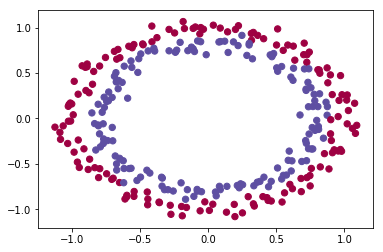

In [2]:
train_X, train_Y, test_X, test_Y = load_dataset()

For this classifier, you want to separate the blue dots from the red dots.

<a name='3'></a>
## 3 - Neural Network Model 

You'll use a 3-layer neural network (already implemented for you). These are the initialization methods you'll experiment with: 
- *Zeros initialization* --  setting `initialization = "zeros"` in the input argument.
- *Random initialization* -- setting `initialization = "random"` in the input argument. This initializes the weights to large random values.  
- *He initialization* -- setting `initialization = "he"` in the input argument. This initializes the weights to random values scaled according to a paper by He et al., 2015. 

**Instructions**: Instructions: Read over the code below, and run it. In the next part, you'll implement the three initialization methods that this `model()` calls.

In [3]:
def model(X, Y, learning_rate = 0.01, num_iterations = 15000, print_cost = True, initialization = "he"):
    """
    Implements a three-layer neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (2, number of examples)
    Y -- true "label" vector (containing 0 for red dots; 1 for blue dots), of shape (1, number of examples)
    learning_rate -- learning rate for gradient descent 
    num_iterations -- number of iterations to run gradient descent
    print_cost -- if True, print the cost every 1000 iterations
    initialization -- flag to choose which initialization to use ("zeros","random" or "he")
    
    Returns:
    parameters -- parameters learnt by the model
    """
        
    grads = {}
    costs = [] # to keep track of the loss
    m = X.shape[1] # number of examples
    layers_dims = [X.shape[0], 10, 5, 1]
    
    # Initialize parameters dictionary.
    if initialization == "zeros":
        parameters = initialize_parameters_zeros(layers_dims)
    elif initialization == "random":
        parameters = initialize_parameters_random(layers_dims)
    elif initialization == "he":
        parameters = initialize_parameters_he(layers_dims)

    # Loop (gradient descent)

    for i in range(num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID.
        a3, cache = forward_propagation(X, parameters)
        
        # Loss
        cost = compute_loss(a3, Y)

        # Backward propagation.
        grads = backward_propagation(X, Y, cache)
        
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Print the loss every 1000 iterations
        if print_cost and i % 1000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
            costs.append(cost)
            
    # plot the loss
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

<a name='4'></a>
## 4 - Zero Initialization

There are two types of parameters to initialize in a neural network:
- the weight matrices $(W^{[1]}, W^{[2]}, W^{[3]}, ..., W^{[L-1]}, W^{[L]})$
- the bias vectors $(b^{[1]}, b^{[2]}, b^{[3]}, ..., b^{[L-1]}, b^{[L]})$

<a name='ex-1'></a>
### Exercise 1 - initialize_parameters_zeros

Implement the following function to initialize all parameters to zeros. You'll see later that this does not work well since it fails to "break symmetry," but try it anyway and see what happens. Use `np.zeros((..,..))` with the correct shapes.

In [4]:
# GRADED FUNCTION: initialize_parameters_zeros 

def initialize_parameters_zeros(layers_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the size of each layer.
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layers_dims[1], layers_dims[0])
                    b1 -- bias vector of shape (layers_dims[1], 1)
                    ...
                    WL -- weight matrix of shape (layers_dims[L], layers_dims[L-1])
                    bL -- bias vector of shape (layers_dims[L], 1)
    """
    
    parameters = {}
    L = len(layers_dims)            # number of layers in the network
    
    for l in range(1, L):
        #(≈ 2 lines of code)
        # parameters['W' + str(l)] = 
        # parameters['b' + str(l)] = 
        # YOUR CODE STARTS HERE
        parameters['W' + str(l)] = np.zeros((layers_dims[l], layers_dims[l-1]))
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
        # YOUR CODE ENDS HERE
    return parameters

In [5]:
parameters = initialize_parameters_zeros([3, 2, 1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))
initialize_parameters_zeros_test(initialize_parameters_zeros)


W1 = [[0. 0. 0.]
 [0. 0. 0.]]
b1 = [[0.]
 [0.]]
W2 = [[0. 0.]]
b2 = [[0.]]
 All tests passed.


Run the following code to train your model on 15,000 iterations using zeros initialization.

Cost after iteration 0: 0.6931471805599453
Cost after iteration 1000: 0.6931471805599453
Cost after iteration 2000: 0.6931471805599453
Cost after iteration 3000: 0.6931471805599453
Cost after iteration 4000: 0.6931471805599453
Cost after iteration 5000: 0.6931471805599453
Cost after iteration 6000: 0.6931471805599453
Cost after iteration 7000: 0.6931471805599453
Cost after iteration 8000: 0.6931471805599453
Cost after iteration 9000: 0.6931471805599453
Cost after iteration 10000: 0.6931471805599455
Cost after iteration 11000: 0.6931471805599453
Cost after iteration 12000: 0.6931471805599453
Cost after iteration 13000: 0.6931471805599453
Cost after iteration 14000: 0.6931471805599453


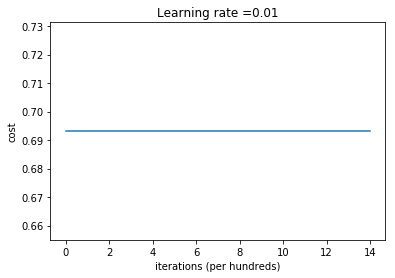

On the train set:
Accuracy: 0.5
On the test set:
Accuracy: 0.5


In [6]:
parameters = model(train_X, train_Y, initialization = "zeros")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

The performance is terrible, the cost doesn't decrease, and the algorithm performs no better than random guessing. Why? Take a look at the details of the predictions and the decision boundary:

In [7]:
print ("predictions_train = " + str(predictions_train))
print ("predictions_test = " + str(predictions_test))

predictions_train = [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0]]
predictions_test = [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


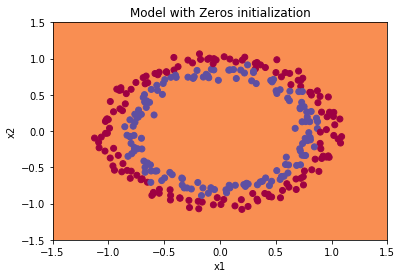

In [8]:
plt.title("Model with Zeros initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

__Note__: For sake of simplicity calculations below are done using only one example at a time.

Since the weights and biases are zero, multiplying by the weights creates the zero vector which gives 0 when the activation function is ReLU. As `z = 0`

$$a = ReLU(z) = max(0, z) = 0$$

At the classification layer, where the activation function is sigmoid you then get (for either input): 

$$\sigma(z) = \frac{1}{ 1 + e^{-(z)}} = \frac{1}{2} = y_{pred}$$

As for every example you are getting a 0.5 chance of it being true our cost function becomes helpless in adjusting the weights.

Your loss function:
$$ \mathcal{L}(a, y) =  - y  \ln(y_{pred}) - (1-y)  \ln(1-y_{pred})$$

For `y=1`, `y_pred=0.5` it becomes:

$$ \mathcal{L}(0, 1) =  - (1)  \ln(\frac{1}{2}) = 0.6931471805599453$$

For `y=0`, `y_pred=0.5` it becomes:

$$ \mathcal{L}(0, 0) =  - (1)  \ln(\frac{1}{2}) = 0.6931471805599453$$

<b>As you can see with the prediction being 0.5 whether the actual (`y`) value is 1 or 0 you get the same loss value for both, so none of the weights get adjusted and you are stuck with the same old value of the weights. 

This is why you can see that the model is predicting 0 for every example! No wonder it's doing so badly.

In general, initializing all the weights to zero results in the network failing to break symmetry. This means that every neuron in each layer will learn the same thing, so you might as well be training a neural network with $n^{[l]}=1$ for every layer. This way, the network is no more powerful than a linear classifier like logistic regression. 

<font color='blue'>
    
**What you should remember**:
- The weights $W^{[l]}$ should be initialized randomly to break symmetry. 
- <b>However, it's okay to initialize the biases $b^{[l]}$ to zeros. Symmetry is still broken so long as $W^{[l]}$ is initialized randomly. 


<a name='5'></a>
## 5 - Random Initialization

To break symmetry, initialize the weights randomly. Following random initialization, each neuron can then proceed to learn a different function of its inputs. In this exercise, you'll see what happens when the weights are initialized randomly, but to very large values.

<a name='ex-2'></a>
### Exercise 2 - initialize_parameters_random

Implement the following function to initialize your weights to large random values (scaled by \*10) and your biases to zeros. Use `np.random.randn(..,..) * 10` for weights and `np.zeros((.., ..))` for biases. You're using a fixed `np.random.seed(..)` to make sure your "random" weights  match ours, so don't worry if running your code several times always gives you the same initial values for the parameters. 

In [9]:
# GRADED FUNCTION: initialize_parameters_random

def initialize_parameters_random(layers_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the size of each layer.
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layers_dims[1], layers_dims[0])
                    b1 -- bias vector of shape (layers_dims[1], 1)
                    ...
                    WL -- weight matrix of shape (layers_dims[L], layers_dims[L-1])
                    bL -- bias vector of shape (layers_dims[L], 1)
    """
    
    np.random.seed(3)               # This seed makes sure your "random" numbers will be the as ours
    parameters = {}
    L = len(layers_dims)            # integer representing the number of layers
    
    for l in range(1, L):
        #(≈ 2 lines of code)
        # parameters['W' + str(l)] = 
        # parameters['b' + str(l)] =
        # YOUR CODE STARTS HERE
        parameters['W' + str(l)] = np.random.randn(layers_dims[l],layers_dims[l-1]) * 10
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
        # YOUR CODE ENDS HERE

    return parameters

In [10]:
parameters = initialize_parameters_random([3, 2, 1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))
initialize_parameters_random_test(initialize_parameters_random)

W1 = [[ 17.88628473   4.36509851   0.96497468]
 [-18.63492703  -2.77388203  -3.54758979]]
b1 = [[0.]
 [0.]]
W2 = [[-0.82741481 -6.27000677]]
b2 = [[0.]]
 All tests passed.


Run the following code to train your model on 15,000 iterations using random initialization.

/home/xiucatwithmark/git_repo/data_science_study/DL_AndrewNg/W1A1/init_utils.py:145: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
/home/xiucatwithmark/git_repo/data_science_study/DL_AndrewNg/W1A1/init_utils.py:145: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)


Cost after iteration 0: inf
Cost after iteration 1000: 0.6247924745506072
Cost after iteration 2000: 0.5980258056061102
Cost after iteration 3000: 0.5637539062842213
Cost after iteration 4000: 0.5501256393526495
Cost after iteration 5000: 0.5443826306793814
Cost after iteration 6000: 0.5373895855049121
Cost after iteration 7000: 0.47157999220550006
Cost after iteration 8000: 0.39770475516243037
Cost after iteration 9000: 0.3934560146692851
Cost after iteration 10000: 0.3920227137490125
Cost after iteration 11000: 0.38913700035966736
Cost after iteration 12000: 0.3861358766546214
Cost after iteration 13000: 0.38497629552893475
Cost after iteration 14000: 0.38276694641706693


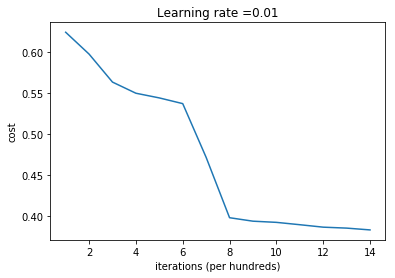

On the train set:
Accuracy: 0.83
On the test set:
Accuracy: 0.86


In [11]:
parameters = model(train_X, train_Y, initialization = "random")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

If you see "inf" as the cost after the iteration 0, this is because of numerical roundoff. A more numerically sophisticated implementation would fix this, but for the purposes of this notebook, it isn't really worth worrying about.

In any case, you've now broken the symmetry, and this gives noticeably better accuracy than before. The model is no longer outputting all 0s. Progress!

In [12]:
print (predictions_train)
print (predictions_test)

[[1 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1
  1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0
  0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0
  1 0 1 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0
  0 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1
  1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1
  0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 1 1
  1 1 0 1 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1
  1 1 1 1 0 0 0 1 1 1 1 0]]
[[1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1
  0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0
  1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0]]


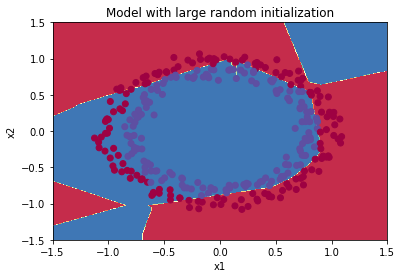

In [13]:
plt.title("Model with large random initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

**Observations**:
- The cost starts very high. This is because with large random-valued weights, the last activation (sigmoid) outputs results that are very close to 0 or 1 for some examples, and when it gets that example wrong it incurs a very high loss for that example. Indeed, when $\log(a^{[3]}) = \log(0)$, the loss goes to infinity.
- Poor initialization can lead to vanishing/exploding gradients, which also slows down the optimization algorithm. 
- If you train this network longer you will see better results, but initializing with overly large random numbers slows down the optimization.

<font color='blue'>
    
**In summary**:
- Initializing weights to very large random values doesn't work well. 
- Initializing with small random values should do better. The important question is, how small should be these random values be? Let's find out up next!

<font color='black'>    
    
**Optional Read:**


The main difference between Gaussian variable (`numpy.random.randn()`) and uniform random variable is the distribution of the generated random numbers:

- numpy.random.rand() produces numbers in a [uniform distribution](https://raw.githubusercontent.com/jahnog/deeplearning-notes/master/Course2/images/rand.jpg).
- and numpy.random.randn() produces numbers in a [normal distribution](https://raw.githubusercontent.com/jahnog/deeplearning-notes/master/Course2/images/randn.jpg).

When used for weight initialization, randn() helps most the weights to Avoid being close to the extremes, allocating most of them in the center of the range.

An intuitive way to see it is, for example, if you take the [sigmoid() activation function](https://raw.githubusercontent.com/jahnog/deeplearning-notes/master/Course2/images/sigmoid.jpg).

You’ll remember that the slope near 0 or near 1 is extremely small, so the weights near those extremes will converge much more slowly to the solution, and having most of them near the center will speed the convergence.

<a name='6'></a>
## 6 - He Initialization

Finally, try "He Initialization"; this is named for the first author of He et al., 2015. (If you have heard of "Xavier initialization", this is similar except Xavier initialization uses a scaling factor for the weights $W^{[l]}$ of `sqrt(1./layers_dims[l-1])` where He initialization would use `sqrt(2./layers_dims[l-1])`.)

<a name='ex-3'></a>
### Exercise 3 - initialize_parameters_he

Implement the following function to initialize your parameters with He initialization. This function is similar to the previous `initialize_parameters_random(...)`. The only difference is that instead of multiplying `np.random.randn(..,..)` by 10, you will multiply it by $\sqrt{\frac{2}{\text{dimension of the previous layer}}}$, which is what He initialization recommends for layers with a ReLU activation. 

In [16]:
# GRADED FUNCTION: initialize_parameters_he

def initialize_parameters_he(layers_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the size of each layer.
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layers_dims[1], layers_dims[0])
                    b1 -- bias vector of shape (layers_dims[1], 1)
                    ...
                    WL -- weight matrix of shape (layers_dims[L], layers_dims[L-1])
                    bL -- bias vector of shape (layers_dims[L], 1)
    """
    
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims) - 1 # integer representing the number of layers
     
    for l in range(1, L + 1):
        #(≈ 2 lines of code)
        # parameters['W' + str(l)] = 
        # parameters['b' + str(l)] =
        # YOUR CODE STARTS HERE
        parameters['W' + str(l)] = np.random.randn(layers_dims[l],layers_dims[l-1]) * np.sqrt(2./layers_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
        # YOUR CODE ENDS HERE
        
    return parameters

In [17]:
parameters = initialize_parameters_he([2, 4, 1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

initialize_parameters_he_test(initialize_parameters_he)
# parameters

W1 = [[ 1.78862847  0.43650985]
 [ 0.09649747 -1.8634927 ]
 [-0.2773882  -0.35475898]
 [-0.08274148 -0.62700068]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.03098412 -0.33744411 -0.92904268  0.62552248]]
b2 = [[0.]]
 All tests passed.


**Expected output**

```
W1 = [[ 1.78862847  0.43650985]
 [ 0.09649747 -1.8634927 ]
 [-0.2773882  -0.35475898]
 [-0.08274148 -0.62700068]]
b1 = [[0.] [0.] [0.] [0.]]
W2 = [[-0.03098412 -0.33744411 -0.92904268  0.62552248]]
b2 = [[0.]]
```

Run the following code to train your model on 15,000 iterations using He initialization.

Cost after iteration 0: 0.8830537463419761
Cost after iteration 1000: 0.6879825919728063
Cost after iteration 2000: 0.6751286264523371
Cost after iteration 3000: 0.6526117768893807
Cost after iteration 4000: 0.6082958970572938
Cost after iteration 5000: 0.5304944491717495
Cost after iteration 6000: 0.4138645817071795
Cost after iteration 7000: 0.31178034648444414
Cost after iteration 8000: 0.23696215330322565
Cost after iteration 9000: 0.18597287209206836
Cost after iteration 10000: 0.15015556280371808
Cost after iteration 11000: 0.12325079292273551
Cost after iteration 12000: 0.09917746546525935
Cost after iteration 13000: 0.08457055954024276
Cost after iteration 14000: 0.07357895962677363


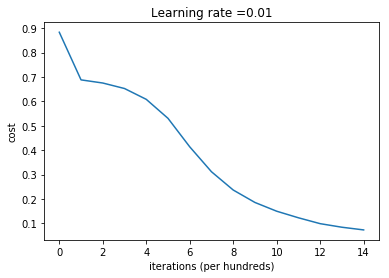

On the train set:
Accuracy: 0.9933333333333333
On the test set:
Accuracy: 0.96


In [18]:
parameters = model(train_X, train_Y, initialization = "he")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

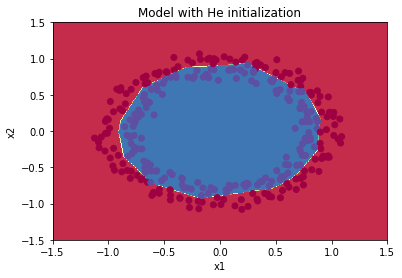

In [19]:
plt.title("Model with He initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

**Observations**:
- The model with He initialization separates the blue and the red dots very well in a small number of iterations.


<a name='7'></a>
## 7 - Conclusions

You've tried three different types of initializations. For the same number of iterations and same hyperparameters, the comparison is:

<table> 
    <tr>
        <td>
            <b>Model</b>
        </td>
        <td>
            <b>Train accuracy</b>
        </td>
        <td>
            <b>Problem/Comment</b>
        </td>
    </tr>
        <td>
        3-layer NN with zeros initialization
        </td>
        <td>
        50%
        </td>
        <td>
        fails to break symmetry
        </td>
    <tr>
        <td>
        3-layer NN with large random initialization
        </td>
        <td>
        83%
        </td>
        <td>
        too large weights 
        </td>
    </tr>
    <tr>
        <td>
        3-layer NN with He initialization
        </td>
        <td>
        99%
        </td>
        <td>
        recommended method
        </td>
    </tr>
</table> 

**Congratulations**! You've completed this notebook on Initialization. 

Here's a quick recap of the main takeaways:

<font color='blue'>
    
- Different initializations lead to very different results
- Random initialization is used to break symmetry and make sure different hidden units can learn different things
- Resist initializing to values that are too large!
- He initialization works well for networks with ReLU activations

# Regularization

Welcome to the second assignment of this week. Deep Learning models have so much flexibility and capacity that **overfitting can be a serious problem**, if the training dataset is not big enough. Sure it does well on the training set, but the learned network **doesn't generalize to new examples** that it has never seen!

**You will learn to:** Use regularization in your deep learning models.

Let's get started!

## Table of Content
- [1 - Packages](#1)
- [2 - Problem Statement](#2)
- [3 - Loading the Dataset](#3)
- [4 - Non-Regularized Model](#4)
- [5 - L2 Regularization](#5)
    - [Exercise 1 - compute_cost_with_regularization](#ex-1)
    - [Exercise 2 - backward_propagation_with_regularization](#ex-2)
- [6 - Dropout](#6)
    - [6.1 - Forward Propagation with Dropout](#6-1)
        - [Exercise 3 - forward_propagation_with_dropout](#ex-3)
    - [6.2 - Backward Propagation with Dropout](#6-2)
        - [Exercise 4 - backward_propagation_with_dropout](#ex-4)
- [7 - Conclusions](#7)

<a name='1'></a>
## 1 - Packages

In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import scipy.io
from reg_utils import sigmoid, relu, plot_decision_boundary, initialize_parameters, load_2D_dataset, predict_dec
from reg_utils import compute_cost, predict, forward_propagation, backward_propagation, update_parameters
from testCases import *
from public_tests import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

<a name='2'></a>
## 2 - Problem Statement

You have just been hired as an AI expert by the French Football Corporation. They would like you to recommend positions where France's goal keeper should kick the ball so that the French team's players can then hit it with their head. 

<img src="images/field_kiank.png" style="width:600px;height:350px;">
<caption><center> <u> <b>Figure 1</b> </u>: <b>Football field</b><br> The goal keeper kicks the ball in the air, the players of each team are fighting to hit the ball with their head </center></caption>


They give you the following 2D dataset from France's past 10 games.

<a name='3'></a>
## 3 - Loading the Dataset

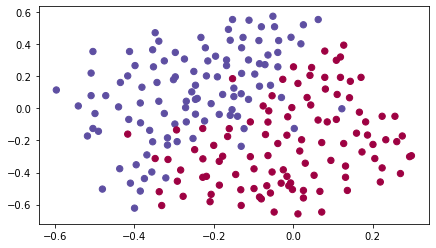

In [2]:
train_X, train_Y, test_X, test_Y = load_2D_dataset()

Each dot corresponds to a position on the football field where a football player has hit the ball with his/her head after the French goal keeper has shot the ball from the left side of the football field.
- If the dot is blue, it means the French player managed to hit the ball with his/her head
- If the dot is red, it means the other team's player hit the ball with their head

**Your goal**: Use a deep learning model to find the positions on the field where the goalkeeper should kick the ball.

**Analysis of the dataset**: This dataset is a little noisy, but it looks like a diagonal line separating the upper left half (blue) from the lower right half (red) would work well. 

You will first try a non-regularized model. Then you'll learn how to regularize it and decide which model you will choose to solve the French Football Corporation's problem. 

<a name='4'></a>
## 4 - Non-Regularized Model

You will use the following neural network (already implemented for you below). This model can be used:
- in *regularization mode* -- by setting the `lambd` input to a non-zero value. We use "`lambd`" instead of "`lambda`" because "`lambda`" is a reserved keyword in Python. 
- in *dropout mode* -- by setting the `keep_prob` to a value less than one

You will first try the model without any regularization. Then, you will implement:
- *L2 regularization* -- functions: "`compute_cost_with_regularization()`" and "`backward_propagation_with_regularization()`"
- *Dropout* -- functions: "`forward_propagation_with_dropout()`" and "`backward_propagation_with_dropout()`"

In each part, you will run this model with the correct inputs so that it calls the functions you've implemented. Take a look at the code below to familiarize yourself with the model.

In [3]:
def model(X, Y, learning_rate = 0.3, num_iterations = 30000, print_cost = True, lambd = 0, keep_prob = 1):
    """
    Implements a three-layer neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (output size, number of examples)
    learning_rate -- learning rate of the optimization
    num_iterations -- number of iterations of the optimization loop
    print_cost -- If True, print the cost every 10000 iterations
    lambd -- regularization hyperparameter, scalar
    keep_prob - probability of keeping a neuron active during drop-out, scalar.
    
    Returns:
    parameters -- parameters learned by the model. They can then be used to predict.
    """
        
    grads = {}
    costs = []                            # to keep track of the cost
    m = X.shape[1]                        # number of examples
    layers_dims = [X.shape[0], 20, 3, 1]
    
    # Initialize parameters dictionary.
    parameters = initialize_parameters(layers_dims)

    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID.
        if keep_prob == 1:
            a3, cache = forward_propagation(X, parameters)
        elif keep_prob < 1:
            a3, cache = forward_propagation_with_dropout(X, parameters, keep_prob)
        
        # Cost function
        if lambd == 0:
            cost = compute_cost(a3, Y)
        else:
            cost = compute_cost_with_regularization(a3, Y, parameters, lambd)
            
        # Backward propagation.
        assert (lambd == 0 or keep_prob == 1)   # it is possible to use both L2 regularization and dropout, 
                                                # but this assignment will only explore one at a time
        if lambd == 0 and keep_prob == 1:
            grads = backward_propagation(X, Y, cache)
        elif lambd != 0:
            grads = backward_propagation_with_regularization(X, Y, cache, lambd)
        elif keep_prob < 1:
            grads = backward_propagation_with_dropout(X, Y, cache, keep_prob)
        
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Print the loss every 10000 iterations
        if print_cost and i % 10000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
        if print_cost and i % 1000 == 0:
            costs.append(cost)
    
    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (x1,000)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Let's train the model without any regularization, and observe the accuracy on the train/test sets.

Cost after iteration 0: 0.6557412523481002
Cost after iteration 10000: 0.16329987525724204
Cost after iteration 20000: 0.13851642423234922


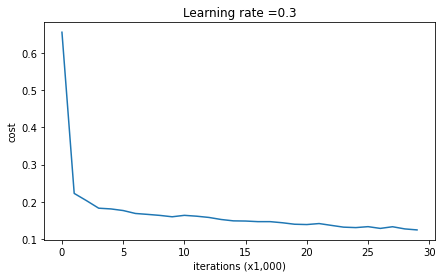

On the training set:
Accuracy: 0.9478672985781991
On the test set:
Accuracy: 0.915


In [4]:
parameters = model(train_X, train_Y)
print ("On the training set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

The train accuracy is 94.8% while the test accuracy is 91.5%. This is the **baseline model** (you will observe the impact of regularization on this model). Run the following code to plot the decision boundary of your model.

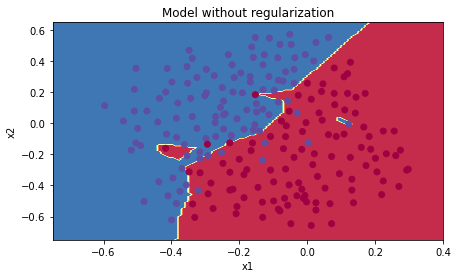

In [5]:
plt.title("Model without regularization")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

The non-regularized model is obviously overfitting the training set. It is fitting the noisy points! Lets now look at two techniques to reduce overfitting.

<a name='5'></a>
## 5 - L2 Regularization

The standard way to avoid overfitting is called **L2 regularization**. It consists of appropriately modifying your cost function, from:
$$J = -\frac{1}{m} \sum\limits_{i = 1}^{m} \large{(}\small  y^{(i)}\log\left(a^{[L](i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right) \large{)} \tag{1}$$
To:
$$J_{regularized} = \small \underbrace{-\frac{1}{m} \sum\limits_{i = 1}^{m} \large{(}\small y^{(i)}\log\left(a^{[L](i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right) \large{)} }_\text{cross-entropy cost} + \underbrace{\frac{1}{m} \frac{\lambda}{2} \sum\limits_l\sum\limits_k\sum\limits_j W_{k,j}^{[l]2} }_\text{L2 regularization cost} \tag{2}$$

Let's modify your cost and observe the consequences.

<a name='ex-1'></a>
### Exercise 1 - compute_cost_with_regularization
Implement `compute_cost_with_regularization()` which computes the cost given by formula (2). To calculate $\sum\limits_k\sum\limits_j W_{k,j}^{[l]2}$  , use :
```python
np.sum(np.square(Wl))
```
Note that you have to do this for $W^{[1]}$, $W^{[2]}$ and $W^{[3]}$, then sum the three terms and multiply by $ \frac{1}{m} \frac{\lambda}{2} $.

In [15]:
# GRADED FUNCTION: compute_cost_with_regularization

def compute_cost_with_regularization(A3, Y, parameters, lambd):
    """
    Implement the cost function with L2 regularization. See formula (2) above.
    
    Arguments:
    A3 -- post-activation, output of forward propagation, of shape (output size, number of examples)
    Y -- "true" labels vector, of shape (output size, number of examples)
    parameters -- python dictionary containing parameters of the model
    
    Returns:
    cost - value of the regularized loss function (formula (2))
    """
    m = Y.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    W3 = parameters["W3"]
    
    cross_entropy_cost = compute_cost(A3, Y) # This gives you the cross-entropy part of the cost
    
    #(≈ 1 lines of code)
    # L2_regularization_cost = 
    # YOUR CODE STARTS HERE
    L2_regularization_cost = np.sum([np.sum(np.square(W1)),np.sum(np.square(W2)),np.sum(np.square(W3))]) * (1/m) * (lambd/2)
    
    # YOUR CODE ENDS HERE
    
    cost = cross_entropy_cost + L2_regularization_cost
    
    return cost

In [16]:
A3, t_Y, parameters = compute_cost_with_regularization_test_case()
cost = compute_cost_with_regularization(A3, t_Y, parameters, lambd=0.1)
print("cost = " + str(cost))

compute_cost_with_regularization_test(compute_cost_with_regularization)

cost = 1.7864859451590758
 All tests passed.


Of course, because you changed the cost, you have to change backward propagation as well! All the gradients have to be computed with respect to this new cost. 

<a name='ex-2'></a>
### Exercise 2 - backward_propagation_with_regularization
Implement the changes needed in backward propagation to take into account regularization. The changes only concern dW1, dW2 and dW3. For each, you have to add the regularization term's gradient ($\frac{d}{dW} ( \frac{1}{2}\frac{\lambda}{m}  W^2) = \frac{\lambda}{m} W$).

In [17]:
# GRADED FUNCTION: backward_propagation_with_regularization

def backward_propagation_with_regularization(X, Y, cache, lambd):
    """
    Implements the backward propagation of our baseline model to which we added an L2 regularization.
    
    Arguments:
    X -- input dataset, of shape (input size, number of examples)
    Y -- "true" labels vector, of shape (output size, number of examples)
    cache -- cache output from forward_propagation()
    lambd -- regularization hyperparameter, scalar
    
    Returns:
    gradients -- A dictionary with the gradients with respect to each parameter, activation and pre-activation variables
    """
    
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3) = cache
    
    dZ3 = A3 - Y
    #(≈ 1 lines of code)
    # dW3 = 1./m * np.dot(dZ3, A2.T) + None
    # YOUR CODE STARTS HERE
    dW3 = 1./m * np.dot(dZ3, A2.T) + lambd/m*W3
    
    # YOUR CODE ENDS HERE
    db3 = 1. / m * np.sum(dZ3, axis=1, keepdims=True)
    
    dA2 = np.dot(W3.T, dZ3)
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    #(≈ 1 lines of code)
    # dW2 = 1./m * np.dot(dZ2, A1.T) + None
    # YOUR CODE STARTS HERE
    dW2 = 1./m * np.dot(dZ2, A1.T) + lambd/m*W2
    
    # YOUR CODE ENDS HERE
    db2 = 1. / m * np.sum(dZ2, axis=1, keepdims=True)
    
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    #(≈ 1 lines of code)
    # dW1 = 1./m * np.dot(dZ1, X.T) + None
    # YOUR CODE STARTS HERE
    dW1 = 1./m * np.dot(dZ1, X.T) + lambd/m*W1
    
    # YOUR CODE ENDS HERE
    db1 = 1. / m * np.sum(dZ1, axis=1, keepdims=True)
    
    gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3,"dA2": dA2,
                 "dZ2": dZ2, "dW2": dW2, "db2": db2, "dA1": dA1, 
                 "dZ1": dZ1, "dW1": dW1, "db1": db1}
    
    return gradients

In [18]:
t_X, t_Y, cache = backward_propagation_with_regularization_test_case()

grads = backward_propagation_with_regularization(t_X, t_Y, cache, lambd = 0.7)
print ("dW1 = \n"+ str(grads["dW1"]))
print ("dW2 = \n"+ str(grads["dW2"]))
print ("dW3 = \n"+ str(grads["dW3"]))
backward_propagation_with_regularization_test(backward_propagation_with_regularization)

dW1 = 
[[-0.25604646  0.12298827 -0.28297129]
 [-0.17706303  0.34536094 -0.4410571 ]]
dW2 = 
[[ 0.79276486  0.85133918]
 [-0.0957219  -0.01720463]
 [-0.13100772 -0.03750433]]
dW3 = 
[[-1.77691347 -0.11832879 -0.09397446]]
 All tests passed.


Let's now run the model with L2 regularization $(\lambda = 0.7)$. The `model()` function will call: 
- `compute_cost_with_regularization` instead of `compute_cost`
- `backward_propagation_with_regularization` instead of `backward_propagation`

Cost after iteration 0: 0.6974484493131264
Cost after iteration 10000: 0.2684918873282238
Cost after iteration 20000: 0.26809163371273004


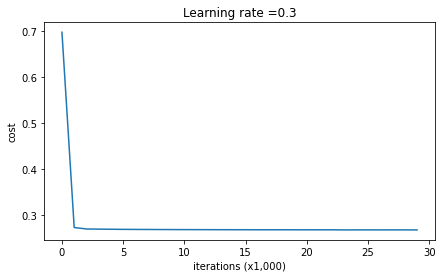

On the train set:
Accuracy: 0.9383886255924171
On the test set:
Accuracy: 0.93


In [19]:
parameters = model(train_X, train_Y, lambd = 0.7)
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

Congrats, the test set accuracy increased to 93%. You have saved the French football team!

You are not overfitting the training data anymore. Let's plot the decision boundary.

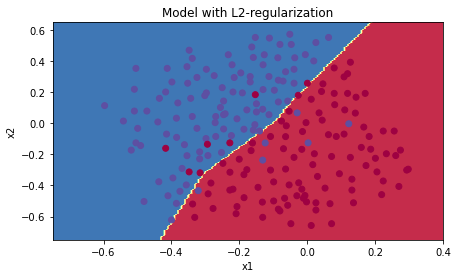

In [20]:
plt.title("Model with L2-regularization")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

**Observations**:
- The value of $\lambda$ is a hyperparameter that you can tune using a dev set.
- L2 regularization makes your decision boundary smoother. If $\lambda$ is too large, it is also possible to "oversmooth", resulting in a model with high bias.

**What is L2-regularization actually doing?**:

L2-regularization relies on the assumption that a model with small weights is simpler than a model with large weights. Thus, by penalizing the square values of the weights in the cost function you drive all the weights to smaller values. It becomes too costly for the cost to have large weights! This leads to a smoother model in which the output changes more slowly as the input changes. 

<br>
<font color='blue'>
    
**What you should remember:** the implications of L2-regularization on:
- The cost computation:
    - A regularization term is added to the cost.
- The backpropagation function:
    - There are extra terms in the gradients with respect to weight matrices.
- Weights end up smaller ("weight decay"): 
    - Weights are pushed to smaller values.

<a name='6'></a>
## 6 - Dropout

Finally, **dropout** is a widely used regularization technique that is specific to deep learning. 
**It randomly shuts down some neurons in each iteration.** Watch these two videos to see what this means!

<!--
To understand drop-out, consider this conversation with a friend:
- Friend: "Why do you need all these neurons to train your network and classify images?". 
- You: "Because each neuron contains a weight and can learn specific features/details/shape of an image. The more neurons I have, the more featurse my model learns!"
- Friend: "I see, but are you sure that your neurons are learning different features and not all the same features?"
- You: "Good point... Neurons in the same layer actually don't talk to each other. It should be definitly possible that they learn the same image features/shapes/forms/details... which would be redundant. There should be a solution."
!--> 


<center>
<video width="620" height="440" src="images/dropout1_kiank.mp4" type="video/mp4" controls>
</video>
</center>
<br>
<caption><center> <u> <b>Figure 2 </b></u>: <b>Drop-out on the second hidden layer.</b> <br> At each iteration, you shut down (= set to zero) each neuron of a layer with probability $1 - keep\_prob$ or keep it with probability $keep\_prob$ (50% here). The dropped neurons don't contribute to the training in both the forward and backward propagations of the iteration. </center></caption>

<center>
<video width="620" height="440" src="images/dropout2_kiank.mp4" type="video/mp4" controls>
</video>
</center>

<caption><center> <u> <b>Figure 3</b> </u>:<b> Drop-out on the first and third hidden layers. </b><br> $1^{st}$ layer: we shut down on average 40% of the neurons.  $3^{rd}$ layer: we shut down on average 20% of the neurons. </center></caption>


When you shut some neurons down, you actually modify your model. The idea behind drop-out is that at each iteration, you train a different model that uses only a subset of your neurons. With dropout, your neurons thus become less sensitive to the activation of one other specific neuron, because that other neuron might be shut down at any time. 

<a name='6-1'></a>
### 6.1 - Forward Propagation with Dropout

<a name='ex-3'></a>
### Exercise 3 - forward_propagation_with_dropout

Implement the forward propagation with dropout. You are using a 3 layer neural network, and will add dropout to the first and second hidden layers. We will not apply dropout to the input layer or output layer. 

**Instructions**:
You would like to shut down some neurons in the first and second layers. To do that, you are going to carry out 4 Steps:
1. In lecture, we dicussed creating a variable $d^{[1]}$ with the same shape as $a^{[1]}$ using `np.random.rand()` to randomly get numbers between 0 and 1. Here, you will use a vectorized implementation, so create a random matrix $D^{[1]} = [d^{[1](1)} d^{[1](2)} ... d^{[1](m)}] $ of the same dimension as $A^{[1]}$.
2. Set each entry of $D^{[1]}$ to be 1 with probability (`keep_prob`), and 0 otherwise.

**Hint:** Let's say that keep_prob = 0.8, which means that we want to keep about 80% of the neurons and drop out about 20% of them.  We want to generate a vector that has 1's and 0's, where about 80% of them are 1 and about 20% are 0.
This python statement:  
`X = (X < keep_prob).astype(int)`  

is conceptually the same as this if-else statement (for the simple case of a one-dimensional array) :

```
for i,v in enumerate(x):
    if v < keep_prob:
        x[i] = 1
    else: # v >= keep_prob
        x[i] = 0
```
Note that the `X = (X < keep_prob).astype(int)` works with multi-dimensional arrays, and the resulting output preserves the dimensions of the input array.

Also note that without using `.astype(int)`, the result is an array of booleans `True` and `False`, which Python automatically converts to 1 and 0 if we multiply it with numbers.  (However, it's better practice to convert data into the data type that we intend, so try using `.astype(int)`.)

3. Set $A^{[1]}$ to $A^{[1]} * D^{[1]}$. (You are shutting down some neurons). You can think of $D^{[1]}$ as a mask, so that when it is multiplied with another matrix, it shuts down some of the values.
4. Divide $A^{[1]}$ by `keep_prob`. By doing this you are assuring that the result of the cost will still have the same expected value as without drop-out. (This technique is also called inverted dropout.)

In [23]:
# GRADED FUNCTION: forward_propagation_with_dropout

def forward_propagation_with_dropout(X, parameters, keep_prob = 0.5):
    """
    Implements the forward propagation: LINEAR -> RELU + DROPOUT -> LINEAR -> RELU + DROPOUT -> LINEAR -> SIGMOID.
    
    Arguments:
    X -- input dataset, of shape (2, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3":
                    W1 -- weight matrix of shape (20, 2)
                    b1 -- bias vector of shape (20, 1)
                    W2 -- weight matrix of shape (3, 20)
                    b2 -- bias vector of shape (3, 1)
                    W3 -- weight matrix of shape (1, 3)
                    b3 -- bias vector of shape (1, 1)
    keep_prob - probability of keeping a neuron active during drop-out, scalar
    
    Returns:
    A3 -- last activation value, output of the forward propagation, of shape (1,1)
    cache -- tuple, information stored for computing the backward propagation
    """
    
    np.random.seed(1)
    
    # retrieve parameters
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    # LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    #(≈ 4 lines of code)         # Steps 1-4 below correspond to the Steps 1-4 described above. 
    # D1 =                                           # Step 1: initialize matrix D1 = np.random.rand(..., ...)
    # D1 =                                           # Step 2: convert entries of D1 to 0 or 1 (using keep_prob as the threshold)
    # A1 =                                           # Step 3: shut down some neurons of A1
    # A1 =                                           # Step 4: scale the value of neurons that haven't been shut down
    # YOUR CODE STARTS HERE
    D1 = np.random.rand(A1.shape[0],A1.shape[1])
    D1 = (D1 < keep_prob).astype(int)
    A1 = A1 * D1
    A1 = A1/keep_prob
    # YOUR CODE ENDS HERE
    Z2 = np.dot(W2, A1) + b2
    A2 = relu(Z2)
    #(≈ 4 lines of code)
    # D2 =                                           # Step 1: initialize matrix D2 = np.random.rand(..., ...)
    # D2 =                                           # Step 2: convert entries of D2 to 0 or 1 (using keep_prob as the threshold)
    # A2 =                                           # Step 3: shut down some neurons of A2
    # A2 =                                           # Step 4: scale the value of neurons that haven't been shut down
    # YOUR CODE STARTS HERE
    D2 = np.random.rand(A2.shape[0],A2.shape[1])
    D2 = (D2 < keep_prob).astype(int)
    A2 = A2 * D2
    A2 = A2/keep_prob
    
    # YOUR CODE ENDS HERE
    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)
    
    cache = (Z1, D1, A1, W1, b1, Z2, D2, A2, W2, b2, Z3, A3, W3, b3)
    
    return A3, cache

In [24]:
t_X, parameters = forward_propagation_with_dropout_test_case()

A3, cache = forward_propagation_with_dropout(t_X, parameters, keep_prob=0.7)
print ("A3 = " + str(A3))

forward_propagation_with_dropout_test(forward_propagation_with_dropout)

A3 = [[0.36974721 0.00305176 0.04565099 0.49683389 0.36974721]]
 All tests passed.


<a name='6-2'></a>
### 6.2 - Backward Propagation with Dropout

<a name='ex-4'></a>
### Exercise 4 - backward_propagation_with_dropout
Implement the backward propagation with dropout. As before, you are training a 3 layer network. Add dropout to the first and second hidden layers, using the masks $D^{[1]}$ and $D^{[2]}$ stored in the cache. 

**Instruction**:
Backpropagation with dropout is actually quite easy. You will have to carry out 2 Steps:
1. You had previously shut down some neurons during forward propagation, by applying a mask $D^{[1]}$ to `A1`. In backpropagation, you will have to shut down the same neurons, by reapplying the same mask $D^{[1]}$ to `dA1`. 
2. During forward propagation, you had divided `A1` by `keep_prob`. In backpropagation, you'll therefore have to divide `dA1` by `keep_prob` again (the calculus interpretation is that if $A^{[1]}$ is scaled by `keep_prob`, then its derivative $dA^{[1]}$ is also scaled by the same `keep_prob`).


In [27]:
# GRADED FUNCTION: backward_propagation_with_dropout

def backward_propagation_with_dropout(X, Y, cache, keep_prob):
    """
    Implements the backward propagation of our baseline model to which we added dropout.
    
    Arguments:
    X -- input dataset, of shape (2, number of examples)
    Y -- "true" labels vector, of shape (output size, number of examples)
    cache -- cache output from forward_propagation_with_dropout()
    keep_prob - probability of keeping a neuron active during drop-out, scalar
    
    Returns:
    gradients -- A dictionary with the gradients with respect to each parameter, activation and pre-activation variables
    """
    
    m = X.shape[1]
    (Z1, D1, A1, W1, b1, Z2, D2, A2, W2, b2, Z3, A3, W3, b3) = cache
    
    dZ3 = A3 - Y
    dW3 = 1./m * np.dot(dZ3, A2.T)
    db3 = 1./m * np.sum(dZ3, axis=1, keepdims=True)
    dA2 = np.dot(W3.T, dZ3)
    #(≈ 2 lines of code)
    # dA2 =                # Step 1: Apply mask D2 to shut down the same neurons as during the forward propagation
    # dA2 =                # Step 2: Scale the value of neurons that haven't been shut down
    # YOUR CODE STARTS HERE
    dA2 = dA2 * D2
    dA2 = dA2 / keep_prob
    # YOUR CODE ENDS HERE
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    dW2 = 1./m * np.dot(dZ2, A1.T)
    db2 = 1./m * np.sum(dZ2, axis=1, keepdims=True)
    
    dA1 = np.dot(W2.T, dZ2)
    #(≈ 2 lines of code)
    # dA1 =                # Step 1: Apply mask D1 to shut down the same neurons as during the forward propagation
    # dA1 =                # Step 2: Scale the value of neurons that haven't been shut down
    # YOUR CODE STARTS HERE
    dA1 = dA1 * D1
    dA1 = dA1 / keep_prob
    # YOUR CODE ENDS HERE
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    dW1 = 1./m * np.dot(dZ1, X.T)
    db1 = 1./m * np.sum(dZ1, axis=1, keepdims=True)
    
    gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3,"dA2": dA2,
                 "dZ2": dZ2, "dW2": dW2, "db2": db2, "dA1": dA1, 
                 "dZ1": dZ1, "dW1": dW1, "db1": db1}
    
    return gradients

In [28]:
t_X, t_Y, cache = backward_propagation_with_dropout_test_case()

gradients = backward_propagation_with_dropout(t_X, t_Y, cache, keep_prob=0.8)

print ("dA1 = \n" + str(gradients["dA1"]))
print ("dA2 = \n" + str(gradients["dA2"]))

backward_propagation_with_dropout_test(backward_propagation_with_dropout)

dA1 = 
[[ 0.36544439  0.         -0.00188233  0.         -0.17408748]
 [ 0.65515713  0.         -0.00337459  0.         -0.        ]]
dA2 = 
[[ 0.58180856  0.         -0.00299679  0.         -0.27715731]
 [ 0.          0.53159854 -0.          0.53159854 -0.34089673]
 [ 0.          0.         -0.00292733  0.         -0.        ]]
 All tests passed.


Let's now run the model with dropout (`keep_prob = 0.86`). It means at every iteration you shut down each neurons of layer 1 and 2 with 14% probability. The function `model()` will now call:
- `forward_propagation_with_dropout` instead of `forward_propagation`.
- `backward_propagation_with_dropout` instead of `backward_propagation`.

Cost after iteration 0: 0.6543912405149825
Cost after iteration 10000: 0.0610169865749056
Cost after iteration 20000: 0.060582435798513114


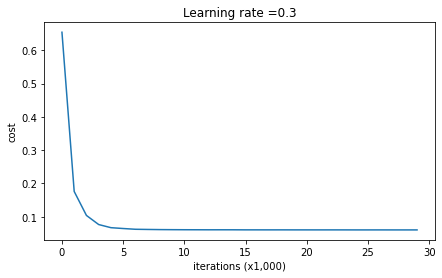

On the train set:
Accuracy: 0.9289099526066351
On the test set:
Accuracy: 0.95


In [29]:
parameters = model(train_X, train_Y, keep_prob = 0.86, learning_rate = 0.3)

print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

Dropout works great! The test accuracy has increased again (to 95%)! Your model is not overfitting the training set and does a great job on the test set. The French football team will be forever grateful to you! 

Run the code below to plot the decision boundary.

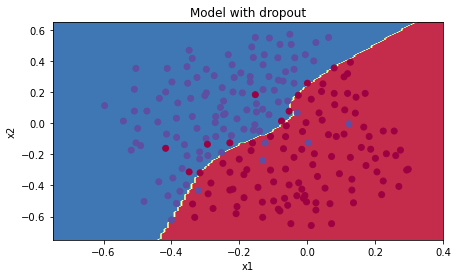

In [30]:
plt.title("Model with dropout")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

**Note**:
- A **common mistake** when using dropout is to use it both in training and testing. You should use dropout (randomly eliminate nodes) only in training. 
- Deep learning frameworks like [tensorflow](https://www.tensorflow.org/api_docs/python/tf/nn/dropout), [PaddlePaddle](http://doc.paddlepaddle.org/release_doc/0.9.0/doc/ui/api/trainer_config_helpers/attrs.html), [keras](https://keras.io/layers/core/#dropout) or [caffe](http://caffe.berkeleyvision.org/tutorial/layers/dropout.html) come with a dropout layer implementation. Don't stress - you will soon learn some of these frameworks.

<font color='blue'>
    
**What you should remember about dropout:**
- Dropout is a regularization technique.
- You only use dropout during training. Don't use dropout (randomly eliminate nodes) during test time.
- Apply dropout both during forward and backward propagation.
- During training time, divide each dropout layer by keep_prob to keep the same expected value for the activations. For example, if keep_prob is 0.5, then we will on average shut down half the nodes, so the output will be scaled by 0.5 since only the remaining half are contributing to the solution. Dividing by 0.5 is equivalent to multiplying by 2. Hence, the output now has the same expected value. You can check that this works even when keep_prob is other values than 0.5.  

<a name='7'></a>
## 7 - Conclusions

**Here are the results of our three models**: 

<table> 
    <tr>
        <td>
        <b>model</b>
        </td>
        <td>
        <b>train accuracy</b>
        </td>
        <td>
        <b>test accuracy</b>
        </td>
    </tr>
        <td>
        3-layer NN without regularization
        </td>
        <td>
        95%
        </td>
        <td>
        91.5%
        </td>
    <tr>
        <td>
        3-layer NN with L2-regularization
        </td>
        <td>
        94%
        </td>
        <td>
        93%
        </td>
    </tr>
    <tr>
        <td>
        3-layer NN with dropout
        </td>
        <td>
        93%
        </td>
        <td>
        95%
        </td>
    </tr>
</table> 

Note that regularization hurts training set performance! This is because it limits the ability of the network to overfit to the training set. But since it ultimately gives better test accuracy, it is helping your system. 

Congratulations for finishing this assignment! And also for revolutionizing French football. :-) 

<font color='blue'>
    
**What we want you to remember from this notebook**:
- Regularization will help you reduce overfitting.
- Regularization will drive your weights to lower values.
- L2 regularization and Dropout are two very effective regularization techniques.

# Gradient Checking

Welcome to the final assignment for this week! In this assignment you'll be implementing gradient checking.

By the end of this notebook, you'll be able to:

Implement gradient checking to verify the accuracy of your backprop implementation

## Table of Contents
- [1 - Packages](#1)
- [2 - Problem Statement](#2)
- [3 - How does Gradient Checking work?](#3)
- [4 - 1-Dimensional Gradient Checking](#4)
    - [Exercise 1 - forward_propagation](#ex-1)
    - [Exercise 2 - backward_propagation](#ex-2)
    - [Exercise 3 - gradient_check](#ex-3)
- [5 - N-Dimensional Gradient Checking](#5)
    - [Exercise 4 - gradient_check_n](#ex-4)

<a name='1'></a>
## 1 - Packages

In [1]:
import numpy as np
from testCases import *
from public_tests import *
from gc_utils import sigmoid, relu, dictionary_to_vector, vector_to_dictionary, gradients_to_vector

%load_ext autoreload
%autoreload 2

<a name='2'></a>
## 2 - Problem Statement

You are part of a team working to make mobile payments available globally, and are asked to build a deep learning model to detect fraud--whenever someone makes a payment, you want to see if the payment might be fraudulent, such as if the user's account has been taken over by a hacker.

You already know that backpropagation is quite challenging to implement, and sometimes has bugs. Because this is a mission-critical application, your company's CEO wants to be really certain that your implementation of backpropagation is correct. Your CEO says, "Give me proof that your backpropagation is actually working!" To give this reassurance, you are going to use "gradient checking."

Let's do it!

<a name='3'></a>
## 3 - How does Gradient Checking work?
Backpropagation computes the gradients $\frac{\partial J}{\partial \theta}$, where $\theta$ denotes the parameters of the model. $J$ is computed using forward propagation and your loss function.

Because forward propagation is relatively easy to implement, you're confident you got that right, and so you're almost 100% sure that you're computing the cost $J$ correctly. Thus, you can use your code for computing $J$ to verify the code for computing $\frac{\partial J}{\partial \theta}$.

Let's look back at the definition of a derivative (or gradient):$$ \frac{\partial J}{\partial \theta} = \lim_{\varepsilon \to 0} \frac{J(\theta + \varepsilon) - J(\theta - \varepsilon)}{2 \varepsilon} $$

If you're not familiar with the "$\displaystyle \lim_{\varepsilon \to 0}$" notation, it's just a way of saying "when $\varepsilon$ is really, really small."

You know the following:

$\frac{\partial J}{\partial \theta}$ is what you want to make sure you're computing correctly.
You can compute $J(\theta + \varepsilon)$ and $J(\theta - \varepsilon)$ (in the case that $\theta$ is a real number), since you're confident your implementation for $J$ is correct.
Let's use equation (1) and a small value for $\varepsilon$ to convince your CEO that your code for computing $\frac{\partial J}{\partial \theta}$ is correct!

<a name='4'></a>
## 4 - 1-Dimensional Gradient Checking

Consider a 1D linear function $J(\theta) = \theta x$. The model contains only a single real-valued parameter $\theta$, and takes $x$ as input.

You will implement code to compute $J(.)$ and its derivative $\frac{\partial J}{\partial \theta}$. You will then use gradient checking to make sure your derivative computation for $J$ is correct. 

<img src="images/1Dgrad_kiank.png" style="width:600px;height:250px;">
<caption><center><font color='purple'><b>Figure 1</b>:1D linear model </font></center></caption>

The diagram above shows the key computation steps: First start with $x$, then evaluate the function $J(x)$ ("forward propagation"). Then compute the derivative $\frac{\partial J}{\partial \theta}$ ("backward propagation"). 

<a name='ex-1'></a>
### Exercise 1 - forward_propagation

Implement `forward propagation`. For this simple function compute $J(.)$

In [ ]:
# GRADED FUNCTION: forward_propagation

def forward_propagation(x, theta):
    """
    Implement the linear forward propagation (compute J) presented in Figure 1 (J(theta) = theta * x)
    
    Arguments:
    x -- a real-valued input
    theta -- our parameter, a real number as well
    
    Returns:
    J -- the value of function J, computed using the formula J(theta) = theta * x
    """
    
    # (approx. 1 line)
    # J = 
    # YOUR CODE STARTS HERE
    J = theta * x
    
    # YOUR CODE ENDS HERE
    
    return J

In [ ]:
x, theta = 2, 4
J = forward_propagation(x, theta)
print ("J = " + str(J))
forward_propagation_test(forward_propagation)

<a name='ex-2'></a>
### Exercise 2 - backward_propagation

Now, implement the `backward propagation` step (derivative computation) of Figure 1. That is, compute the derivative of $J(\theta) = \theta x$ with respect to $\theta$. To save you from doing the calculus, you should get $dtheta = \frac { \partial J }{ \partial \theta} = x$.

In [ ]:
# GRADED FUNCTION: backward_propagation

def backward_propagation(x, theta):
    """
    Computes the derivative of J with respect to theta (see Figure 1).
    
    Arguments:
    x -- a real-valued input
    theta -- our parameter, a real number as well
    
    Returns:
    dtheta -- the gradient of the cost with respect to theta
    """
    
    # (approx. 1 line)
    # dtheta = 
    # YOUR CODE STARTS HERE
    dtheta = forward_propagation(x, theta)/theta
    
    # YOUR CODE ENDS HERE
    
    return dtheta

In [ ]:
x, theta = 2, 4
dtheta = backward_propagation(x, theta)
print ("dtheta = " + str(dtheta))
backward_propagation_test(backward_propagation)

<a name='ex-3'></a>
### Exercise 3 - gradient_check

To show that the `backward_propagation()` function is correctly computing the gradient $\frac{\partial J}{\partial \theta}$, let's implement gradient checking.

**Instructions**:
- First compute "gradapprox" using the formula above (1) and a small value of $\varepsilon$. Here are the Steps to follow:
    1. $\theta^{+} = \theta + \varepsilon$
    2. $\theta^{-} = \theta - \varepsilon$
    3. $J^{+} = J(\theta^{+})$
    4. $J^{-} = J(\theta^{-})$
    5. $gradapprox = \frac{J^{+} - J^{-}}{2  \varepsilon}$
- Then compute the gradient using backward propagation, and store the result in a variable "grad"
- Finally, compute the relative difference between "gradapprox" and the "grad" using the following formula:
$$ difference = \frac {\mid\mid grad - gradapprox \mid\mid_2}{\mid\mid grad \mid\mid_2 + \mid\mid gradapprox \mid\mid_2} \tag{2}$$
You will need 3 Steps to compute this formula:
   - 1'. compute the numerator using np.linalg.norm(...)
   - 2'. compute the denominator. You will need to call np.linalg.norm(...) twice.
   - 3'. divide them.
- If this difference is small (say less than $10^{-7}$), you can be quite confident that you have computed your gradient correctly. Otherwise, there may be a mistake in the gradient computation. 


In [ ]:
# GRADED FUNCTION: gradient_check

def gradient_check(x, theta, epsilon=1e-7, print_msg=False):
    """
    Implement the backward propagation presented in Figure 1.
    
    Arguments:
    x -- a float input
    theta -- our parameter, a float as well
    epsilon -- tiny shift to the input to compute approximated gradient with formula(1)
    
    Returns:
    difference -- difference (2) between the approximated gradient and the backward propagation gradient. Float output
    """
    
    # Compute gradapprox using left side of formula (1). epsilon is small enough, you don't need to worry about the limit.
    # (approx. 5 lines)
    # theta_plus =                                 # Step 1
    # theta_minus =                                # Step 2
    # J_plus =                                    # Step 3
    # J_minus =                                   # Step 4
    # gradapprox =                                # Step 5
    # YOUR CODE STARTS HERE
    theta_plus = theta + epsilon
    theta_minus = theta - epsilon
    J_plus = forward_propagation(x, theta_plus)
    J_minus = forward_propagation(x, theta_minus)
    gradapprox = (J_plus - J_minus) / (2 * epsilon)
    
    # YOUR CODE ENDS HERE
    
    # Check if gradapprox is close enough to the output of backward_propagation()
    #(approx. 1 line) DO NOT USE "grad = gradapprox"
    # grad =
    # YOUR CODE STARTS HERE
    grad = backward_propagation(x, theta)
    
    # YOUR CODE ENDS HERE
    
    #(approx. 1 line)
    # numerator =                                 # Step 1'
    # denominator =                               # Step 2'
    # difference =                                # Step 3'
    # YOUR CODE STARTS HERE
    numerator = np.linalg.norm(grad - gradapprox)
    denominator = np.linalg.norm(grad) + np.linalg.norm(gradapprox)
    difference = numerator / denominator
    
    # YOUR CODE ENDS HERE
    if print_msg:
        if difference > 2e-7:
            print ("\033[93m" + "There is a mistake in the backward propagation! difference = " + str(difference) + "\033[0m")
        else:
            print ("\033[92m" + "Your backward propagation works perfectly fine! difference = " + str(difference) + "\033[0m")
    
    return difference

In [ ]:
x, theta = 2, 4
difference = gradient_check(2,4, print_msg=True)

gradient_check_test(gradient_check)

Congrats, the difference is smaller than the $10^{-7}$ threshold. So you can have high confidence that you've correctly computed the gradient in `backward_propagation()`. 

Now, in the more general case, your cost function $J$ has more than a single 1D input. When you are training a neural network, $\theta$ actually consists of multiple matrices $W^{[l]}$ and biases $b^{[l]}$! It is important to know how to do a gradient check with higher-dimensional inputs. Let's do it!

<a name='5'></a>
## 5 - N-Dimensional Gradient Checking

The following figure describes the forward and backward propagation of your fraud detection model.

<img src="images/NDgrad_kiank.png" style="width:600px;height:400px;">
<caption><center><font color='purple'><b>Figure 2</b>: Deep neural network. LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID</font></center></caption>

Let's look at your implementations for forward propagation and backward propagation. 

In [ ]:
def forward_propagation_n(X, Y, parameters):
    """
    Implements the forward propagation (and computes the cost) presented in Figure 3.
    
    Arguments:
    X -- training set for m examples
    Y -- labels for m examples 
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3":
                    W1 -- weight matrix of shape (5, 4)
                    b1 -- bias vector of shape (5, 1)
                    W2 -- weight matrix of shape (3, 5)
                    b2 -- bias vector of shape (3, 1)
                    W3 -- weight matrix of shape (1, 3)
                    b3 -- bias vector of shape (1, 1)
    
    Returns:
    cost -- the cost function (logistic cost for one example)
    cache -- a tuple with the intermediate values (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3)

    """
    
    # retrieve parameters
    m = X.shape[1]
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]

    # LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = relu(Z2)
    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)

    # Cost
    log_probs = np.multiply(-np.log(A3),Y) + np.multiply(-np.log(1 - A3), 1 - Y)
    cost = 1. / m * np.sum(log_probs)
    
    cache = (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3)
    
    return cost, cache

Now, run backward propagation.

In [ ]:
def backward_propagation_n(X, Y, cache):
    """
    Implement the backward propagation presented in figure 2.
    
    Arguments:
    X -- input datapoint, of shape (input size, 1)
    Y -- true "label"
    cache -- cache output from forward_propagation_n()
    
    Returns:
    gradients -- A dictionary with the gradients of the cost with respect to each parameter, activation and pre-activation variables.
    """
    
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3) = cache
    
    dZ3 = A3 - Y
    dW3 = 1. / m * np.dot(dZ3, A2.T)
    db3 = 1. / m * np.sum(dZ3, axis=1, keepdims=True)
    
    dA2 = np.dot(W3.T, dZ3)
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    dW2 = 1. / m * np.dot(dZ2, A1.T) * 2
    db2 = 1. / m * np.sum(dZ2, axis=1, keepdims=True)
    
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    dW1 = 1. / m * np.dot(dZ1, X.T)
    db1 = 4. / m * np.sum(dZ1, axis=1, keepdims=True)
    
    gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3,
                 "dA2": dA2, "dZ2": dZ2, "dW2": dW2, "db2": db2,
                 "dA1": dA1, "dZ1": dZ1, "dW1": dW1, "db1": db1}
    
    return gradients

You obtained some results on the fraud detection test set but you are not 100% sure of your model. Nobody's perfect! Let's implement gradient checking to verify if your gradients are correct.

**How does gradient checking work?**.

As in Section 3 and 4, you want to compare "gradapprox" to the gradient computed by backpropagation. The formula is still:

$$ \frac{\partial J}{\partial \theta} = \lim_{\varepsilon \to 0} \frac{J(\theta + \varepsilon) - J(\theta - \varepsilon)}{2 \varepsilon} \tag{1}$$

However, $\theta$ is not a scalar anymore. It is a dictionary called "parameters". The  function "`dictionary_to_vector()`" has been implemented for you. It converts the "parameters" dictionary into a vector called "values", obtained by reshaping all parameters (W1, b1, W2, b2, W3, b3) into vectors and concatenating them.

The inverse function is "`vector_to_dictionary`" which outputs back the "parameters" dictionary.

<img src="images/dictionary_to_vector.png" style="width:600px;height:400px;">
<caption><center><font color='purple'><b>Figure 2</b>: dictionary_to_vector() and vector_to_dictionary(). You will need these functions in gradient_check_n()</font></center></caption>

The "gradients" dictionary has also been converted into a vector "grad" using gradients_to_vector(), so you don't need to worry about that.

Now, for every single parameter in your vector, you will apply the same procedure as for the gradient_check exercise. You will store each gradient approximation in a vector `gradapprox`. If the check goes as expected, each value in this approximation must match the real gradient values stored in the `grad` vector. 

Note that `grad` is calculated using the function `gradients_to_vector`, which uses the gradients outputs of the `backward_propagation_n` function.

<a name='ex-4'></a>
### Exercise 4 - gradient_check_n

Implement the function below.

**Instructions**: Here is pseudo-code that will help you implement the gradient check.

For each i in num_parameters:
- To compute `J_plus[i]`:
    1. Set $\theta^{+}$ to `np.copy(parameters_values)`
    2. Set $\theta^{+}_i$ to $\theta^{+}_i + \varepsilon$
    3. Calculate $J^{+}_i$ using to `forward_propagation_n(x, y, vector_to_dictionary(`$\theta^{+}$ `))`.     
- To compute `J_minus[i]`: do the same thing with $\theta^{-}$
- Compute $gradapprox[i] = \frac{J^{+}_i - J^{-}_i}{2 \varepsilon}$

Thus, you get a vector gradapprox, where gradapprox[i] is an approximation of the gradient with respect to `parameter_values[i]`. You can now compare this gradapprox vector to the gradients vector from backpropagation. Just like for the 1D case (Steps 1', 2', 3'), compute: 
$$ difference = \frac {\| grad - gradapprox \|_2}{\| grad \|_2 + \| gradapprox \|_2 } \tag{3}$$

**Note**: Use `np.linalg.norm` to get the norms

In [ ]:
# GRADED FUNCTION: gradient_check_n

def gradient_check_n(parameters, gradients, X, Y, epsilon=1e-7, print_msg=False):
    """
    Checks if backward_propagation_n computes correctly the gradient of the cost output by forward_propagation_n
    
    Arguments:
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3":
    grad -- output of backward_propagation_n, contains gradients of the cost with respect to the parameters. 
    x -- input datapoint, of shape (input size, 1)
    y -- true "label"
    epsilon -- tiny shift to the input to compute approximated gradient with formula(1)
    
    Returns:
    difference -- difference (2) between the approximated gradient and the backward propagation gradient
    """
    
    # Set-up variables
    parameters_values, _ = dictionary_to_vector(parameters)
    
    grad = gradients_to_vector(gradients)
    num_parameters = parameters_values.shape[0]
    J_plus = np.zeros((num_parameters, 1))
    J_minus = np.zeros((num_parameters, 1))
    gradapprox = np.zeros((num_parameters, 1))
    
    # Compute gradapprox
    for i in range(num_parameters):
        
        # Compute J_plus[i]. Inputs: "parameters_values, epsilon". Output = "J_plus[i]".
        # "_" is used because the function you have to outputs two parameters but we only care about the first one
        #(approx. 3 lines)
        # theta_plus =                                        # Step 1
        # theta_plus[i] =                                     # Step 2
        # J_plus[i], _ =                                     # Step 3
        # YOUR CODE STARTS HERE
        theta_plus = np.copy(parameters_values)
        theta_plus[i] = theta_plus[i] + epsilon
        J_plus[i], _ = forward_propagation_n(X, Y, vector_to_dictionary(theta_plus))
        
        # YOUR CODE ENDS HERE
        
        # Compute J_minus[i]. Inputs: "parameters_values, epsilon". Output = "J_minus[i]".
        #(approx. 3 lines)
        # theta_minus =                                    # Step 1
        # theta_minus[i] =                                 # Step 2        
        # J_minus[i], _ =                                 # Step 3
        # YOUR CODE STARTS HERE
        theta_minus = np.copy(parameters_values)
        theta_minus[i] = theta_minus[i] - epsilon
        J_minus[i], _ = forward_propagation_n(X, Y, vector_to_dictionary(theta_minus))
        
        # YOUR CODE ENDS HERE
        
        # Compute gradapprox[i]
        # (approx. 1 line)
        # gradapprox[i] = 
        # YOUR CODE STARTS HERE
        gradapprox[i] = (J_plus[i] - J_minus[i]) / (2 * epsilon)
        
        # YOUR CODE ENDS HERE
    
    # Compare gradapprox to backward propagation gradients by computing difference.
    # (approx. 1 line)
    # numerator =                                             # Step 1'
    # denominator =                                           # Step 2'
    # difference =                                            # Step 3'
    # YOUR CODE STARTS HERE
    numerator = np.linalg.norm(grad - gradapprox)
    denominator = np.linalg.norm(grad) + np.linalg.norm(gradapprox)
    difference = numerator / denominator
    
    # YOUR CODE ENDS HERE
    if print_msg:
        if difference > 2e-7:
            print ("\033[93m" + "There is a mistake in the backward propagation! difference = " + str(difference) + "\033[0m")
        else:
            print ("\033[92m" + "Your backward propagation works perfectly fine! difference = " + str(difference) + "\033[0m")

    return difference

In [ ]:
X, Y, parameters = gradient_check_n_test_case()

cost, cache = forward_propagation_n(X, Y, parameters)
gradients = backward_propagation_n(X, Y, cache)
difference = gradient_check_n(parameters, gradients, X, Y, 1e-7, True)
assert not(type(difference) == np.ndarray), "You are not using np.linalg.norm for numerator or denominator"

gradient_check_n_test(gradient_check_n, parameters, gradients, X, Y)

**Expected output**:

<table>
    <tr>
        <td>  <b> There is a mistake in the backward propagation!</b>  </td>
        <td> difference = 0.2850931567761623 </td>
    </tr>
</table>

It seems that there were errors in the `backward_propagation_n` code! Good thing you've implemented the gradient check. Go back to `backward_propagation` and try to find/correct the errors *(Hint: check dW2 and db1)*. Rerun the gradient check when you think you've fixed it. Remember, you'll need to re-execute the cell defining `backward_propagation_n()` if you modify the code. 

Can you get gradient check to declare your derivative computation correct? Even though this part of the assignment isn't graded, you should try to find the bug and re-run gradient check until you're convinced backprop is now correctly implemented. 

**Notes** 
- Gradient Checking is slow! Approximating the gradient with $\frac{\partial J}{\partial \theta} \approx  \frac{J(\theta + \varepsilon) - J(\theta - \varepsilon)}{2 \varepsilon}$ is computationally costly. For this reason, we don't run gradient checking at every iteration during training. Just a few times to check if the gradient is correct. 
- Gradient Checking, at least as we've presented it, doesn't work with dropout. You would usually run the gradient check algorithm without dropout to make sure your backprop is correct, then add dropout. 

Congrats! Now you can be confident that your deep learning model for fraud detection is working correctly! You can even use this to convince your CEO. :) 
<br>
<font color='blue'>
    
**What you should remember from this notebook**:
- Gradient checking verifies closeness between the gradients from backpropagation and the numerical approximation of the gradient (computed using forward propagation).
- Gradient checking is slow, so you don't want to run it in every iteration of training. You would usually run it only to make sure your code is correct, then turn it off and use backprop for the actual learning process. 

# Optimization Methods

Until now, you've always used Gradient Descent to update the parameters and minimize the cost. In this notebook, you'll gain skills with some more advanced optimization methods that can speed up learning and perhaps even get you to a better final value for the cost function. Having a good optimization algorithm can be the difference between waiting days vs. just a few hours to get a good result. 

By the end of this notebook, you'll be able to: 

* Apply optimization methods such as (Stochastic) Gradient Descent, Momentum, RMSProp and Adam
* Use random minibatches to accelerate convergence and improve optimization

Gradient descent goes "downhill" on a cost function $J$. Think of it as trying to do this: 
<img src="images/cost.jpg" style="width:650px;height:300px;">
<caption><center> <u> <b>Figure 1</b> </u>: <b>Minimizing the cost is like finding the lowest point in a hilly landscape</b><br> At each step of the training, you update your parameters following a certain direction to try to get to the lowest possible point. </center></caption>

**Notations**: As usual, $\frac{\partial J}{\partial a } = $ `da` for any variable `a`.

Let's get started!

## Table of Contents
- [1- Packages](#1)
- [2 - Gradient Descent](#2)
    - [Exercise 1 - update_parameters_with_gd](#ex-1)
- [3 - Mini-Batch Gradient Descent](#3)
    - [Exercise 2 - random_mini_batches](#ex-2)
- [4 - Momentum](#4)
    - [Exercise 3 - initialize_velocity](#ex-3)
    - [Exercise 4 - update_parameters_with_momentum](#ex-4)
- [5 - Adam](#5)
    - [Exercise 5 - initialize_adam](#ex-5)
    - [Exercise 6 - update_parameters_with_adam](#ex-6)
- [6 - Model with different Optimization algorithms](#6)
    - [6.1 - Mini-Batch Gradient Descent](#6-1)
    - [6.2 - Mini-Batch Gradient Descent with Momentum](#6-2)
    - [6.3 - Mini-Batch with Adam](#6-3)
    - [6.4 - Summary](#6-4)
- [7 - Learning Rate Decay and Scheduling](#7)
    - [7.1 - Decay on every iteration](#7-1)
        - [Exercise 7 - update_lr](#ex-7)
    - [7.2 - Fixed Interval Scheduling](#7-2)
        - [Exercise 8 - schedule_lr_decay](#ex-8)
    - [7.3 - Using Learning Rate Decay for each Optimization Method](#7-3)
        - [7.3.1 - Gradient Descent with Learning Rate Decay](#7-3-1)
        - [7.3.2 - Gradient Descent with Momentum and Learning Rate Decay](#7-3-2)
        - [7.3.3 - Adam with Learning Rate Decay](#7-3-3)
    - [7.4 - Achieving similar performance with different methods](#7-4)

<a name='1'></a>
## 1- Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import math
import sklearn
import sklearn.datasets

from opt_utils_v1a import load_params_and_grads, initialize_parameters, forward_propagation, backward_propagation
from opt_utils_v1a import compute_cost, predict, predict_dec, plot_decision_boundary, load_dataset
from copy import deepcopy
from testCases import *
from public_tests import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

<a name='2'></a>
## 2 - Gradient Descent

A simple optimization method in machine learning is gradient descent (GD). When you take gradient steps with respect to all $m$ examples on each step, it is also called Batch Gradient Descent. 

<a name='ex-1'></a>
### Exercise 1 - update_parameters_with_gd

Implement the gradient descent update rule. The  gradient descent rule is, for $l = 1, ..., L$: 
$$ W^{[l]} = W^{[l]} - \alpha \text{ } dW^{[l]} \tag{1}$$
$$ b^{[l]} = b^{[l]} - \alpha \text{ } db^{[l]} \tag{2}$$

where L is the number of layers and $\alpha$ is the learning rate. All parameters should be stored in the `parameters` dictionary. Note that the iterator `l` starts at 1 in the `for` loop as the first parameters are $W^{[1]}$ and $b^{[1]}$. 

In [2]:
# GRADED FUNCTION: update_parameters_with_gd

def update_parameters_with_gd(parameters, grads, learning_rate):
    """
    Update parameters using one step of gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters to be updated:
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
    grads -- python dictionary containing your gradients to update each parameters:
                    grads['dW' + str(l)] = dWl
                    grads['db' + str(l)] = dbl
    learning_rate -- the learning rate, scalar.
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    L = len(parameters) // 2 # number of layers in the neural networks

    # Update rule for each parameter
    for l in range(1, L + 1):
        # (approx. 2 lines)
        # parameters["W" + str(l)] =  
        # parameters["b" + str(l)] = 
        # YOUR CODE STARTS HERE
        parameters["W" + str(l)] = parameters["W" + str(l)] - learning_rate*grads["dW" + str(l)]
        parameters["b" + str(l)] = parameters["b" + str(l)] - learning_rate*grads["db" + str(l)]
        # YOUR CODE ENDS HERE
    return parameters

In [3]:
parameters, grads, learning_rate = update_parameters_with_gd_test_case()
learning_rate = 0.01
parameters = update_parameters_with_gd(parameters, grads, learning_rate)

print("W1 =\n" + str(parameters["W1"]))
print("b1 =\n" + str(parameters["b1"]))
print("W2 =\n" + str(parameters["W2"]))
print("b2 =\n" + str(parameters["b2"]))

update_parameters_with_gd_test(update_parameters_with_gd)

W1 =
[[ 1.63535156 -0.62320365 -0.53718766]
 [-1.07799357  0.85639907 -2.29470142]]
b1 =
[[ 1.74604067]
 [-0.75184921]]
W2 =
[[ 0.32171798 -0.25467393  1.46902454]
 [-2.05617317 -0.31554548 -0.3756023 ]
 [ 1.1404819  -1.09976462 -0.1612551 ]]
b2 =
[[-0.88020257]
 [ 0.02561572]
 [ 0.57539477]]
All test passed


A variant of this is Stochastic Gradient Descent (SGD), which is equivalent to mini-batch gradient descent, where each mini-batch has just 1 example. The update rule that you have just implemented does not change. What changes is that you would be computing gradients on just one training example at a time, rather than on the whole training set. The code examples below illustrate the difference between stochastic gradient descent and (batch) gradient descent. 

- **(Batch) Gradient Descent**:

``` python
X = data_input
Y = labels
parameters = initialize_parameters(layers_dims)
for i in range(0, num_iterations):
    # Forward propagation
    a, caches = forward_propagation(X, parameters)
    # Compute cost.
    cost += compute_cost(a, Y)
    # Backward propagation.
    grads = backward_propagation(a, caches, parameters)
    # Update parameters.
    parameters = update_parameters(parameters, grads)
        
```

- **Stochastic Gradient Descent**:

```python
X = data_input
Y = labels
parameters = initialize_parameters(layers_dims)
for i in range(0, num_iterations):
    for j in range(0, m):
        # Forward propagation
        a, caches = forward_propagation(X[:,j], parameters)
        # Compute cost
        cost += compute_cost(a, Y[:,j])
        # Backward propagation
        grads = backward_propagation(a, caches, parameters)
        # Update parameters.
        parameters = update_parameters(parameters, grads)
```


In Stochastic Gradient Descent, you use only 1 training example before updating the gradients. When the training set is large, SGD can be faster. But the parameters will "oscillate" toward the minimum rather than converge smoothly. Here's what that looks like: 

<img src="images/kiank_sgd.png" style="width:750px;height:250px;">
<caption><center> <u> <font color='purple'> <b>Figure 1</b> </u><font color='purple'>  : <b>SGD vs GD</b><br> "+" denotes a minimum of the cost. SGD leads to many oscillations to reach convergence, but each step is a lot faster to compute for SGD than it is for GD, as it uses only one training example (vs. the whole batch for GD). </center></caption>

**Note** also that implementing SGD requires 3 for-loops in total:
1. Over the number of iterations
2. Over the $m$ training examples
3. Over the layers (to update all parameters, from $(W^{[1]},b^{[1]})$ to $(W^{[L]},b^{[L]})$)

In practice, you'll often get faster results if you don't use the entire training set, or just one training example, to perform each update. Mini-batch gradient descent uses an intermediate number of examples for each step. With mini-batch gradient descent, you loop over the mini-batches instead of looping over individual training examples.

<img src="images/kiank_minibatch.png" style="width:750px;height:250px;">
<caption><center> <u> <font color='purple'> <b>Figure 2</b> </u>: <font color='purple'>  <b>SGD vs Mini-Batch GD</b><br> "+" denotes a minimum of the cost. Using mini-batches in your optimization algorithm often leads to faster optimization. </center></caption>

<a name='3'></a>
## 3 - Mini-Batch Gradient Descent

Now you'll build some mini-batches from the training set (X, Y).

There are two steps:
- **Shuffle**: Create a shuffled version of the training set (X, Y) as shown below. Each column of X and Y represents a training example. Note that the random shuffling is done synchronously between X and Y. Such that after the shuffling the $i^{th}$ column of X is the example corresponding to the $i^{th}$ label in Y. The shuffling step ensures that examples will be split randomly into different mini-batches. 

<img src="images/kiank_shuffle.png" style="width:550px;height:300px;">

- **Partition**: Partition the shuffled (X, Y) into mini-batches of size `mini_batch_size` (here 64). Note that the number of training examples is not always divisible by `mini_batch_size`. The last mini batch might be smaller, but you don't need to worry about this. When the final mini-batch is smaller than the full `mini_batch_size`, it will look like this: 

<img src="images/kiank_partition.png" style="width:550px;height:300px;">

<a name='ex-2'></a>
### Exercise 2 - random_mini_batches

Implement `random_mini_batches`. The shuffling part has already been coded for you! To help with the partitioning step, you've been provided the following code that selects the indexes for the $1^{st}$ and $2^{nd}$ mini-batches:
```python
first_mini_batch_X = shuffled_X[:, 0 : mini_batch_size]
second_mini_batch_X = shuffled_X[:, mini_batch_size : 2 * mini_batch_size]
...
```

Note that the last mini-batch might end up smaller than `mini_batch_size=64`. Let $\lfloor s \rfloor$ represents $s$ rounded down to the nearest integer (this is `math.floor(s)` in Python). If the total number of examples is not a multiple of `mini_batch_size=64` then there will be $\left\lfloor \frac{m}{mini\_batch\_size}\right\rfloor$ mini-batches with a full 64 examples, and the number of examples in the final mini-batch will be $\left(m-mini_\_batch_\_size \times \left\lfloor \frac{m}{mini\_batch\_size}\right\rfloor\right)$. 

**Hint:**

$$mini\_batch\_X = shuffled\_X[:, i : j]$$ 

Think of a way in which you can use the for loop variable `k` help you increment `i` and `j` in multiples of mini_batch_size.

As an example, if you want to increment in multiples of 3, you could the following:

```python
n = 3
for k in (0 , 5):
    print(k * n)
```

In [4]:
# GRADED FUNCTION: random_mini_batches

def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):
    """
    Creates a list of random minibatches from (X, Y)
    
    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (1, number of examples)
    mini_batch_size -- size of the mini-batches, integer
    
    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """
    
    np.random.seed(seed)            # To make your "random" minibatches the same as ours
    m = X.shape[1]                  # number of training examples
    mini_batches = []
        
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((1, m))
    
    inc = mini_batch_size

    # Step 2 - Partition (shuffled_X, shuffled_Y).
    # Cases with a complete mini batch size only i.e each of 64 examples.
    num_complete_minibatches = math.floor(m / mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        # (approx. 2 lines)
        mini_batch_X =  shuffled_X[:, k * mini_batch_size : (k+1) * mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k * mini_batch_size : (k+1) * mini_batch_size]
        # YOUR CODE STARTS HERE
        
        
        # YOUR CODE ENDS HERE
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # For handling the end case (last mini-batch < mini_batch_size i.e less than 64)
    if m % mini_batch_size != 0:
        #(approx. 2 lines)
        #下面的X和Y都只有两个维度，第一维数据都要，所以是：，第二位需要slicing，所以有选择
        mini_batch_X = shuffled_X[:,num_complete_minibatches * mini_batch_size:]
        mini_batch_Y = shuffled_Y[:,num_complete_minibatches * mini_batch_size:]
        # YOUR CODE STARTS HERE
        
        
        # YOUR CODE ENDS HERE
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

In [5]:
np.random.seed(1)
mini_batch_size = 64
nx = 12288
m = 148
X = np.array([x for x in range(nx * m)]).reshape((m, nx)).T
Y = np.random.randn(1, m) < 0.5

mini_batches = random_mini_batches(X, Y, mini_batch_size)
n_batches = len(mini_batches)

assert n_batches == math.ceil(m / mini_batch_size), f"Wrong number of mini batches. {n_batches} != {math.ceil(m / mini_batch_size)}"
for k in range(n_batches - 1):
    assert mini_batches[k][0].shape == (nx, mini_batch_size), f"Wrong shape in {k} mini batch for X"
    assert mini_batches[k][1].shape == (1, mini_batch_size), f"Wrong shape in {k} mini batch for Y"
    assert np.sum(np.sum(mini_batches[k][0] - mini_batches[k][0][0], axis=0)) == ((nx * (nx - 1) / 2 ) * mini_batch_size), "Wrong values. It happens if the order of X rows(features) changes"

assert mini_batches[n_batches - 1][0].shape == (nx, m % mini_batch_size), f"Wrong shape in the last minibatch. {mini_batches[n_batches - 1][0].shape} != {(nx, m % mini_batch_size)}"
assert np.allclose(mini_batches[0][0][0][0:3], [294912,  86016, 454656]), "Wrong values. Check the indexes used to form the mini batches"
print("\033[92mAll test passed!")

All test passed!


In [6]:
t_X, t_Y, mini_batch_size = random_mini_batches_test_case()
mini_batches = random_mini_batches(t_X, t_Y, mini_batch_size)

print ("shape of the 1st mini_batch_X: " + str(mini_batches[0][0].shape))
print ("shape of the 2nd mini_batch_X: " + str(mini_batches[1][0].shape))
print ("shape of the 3rd mini_batch_X: " + str(mini_batches[2][0].shape))
print ("shape of the 1st mini_batch_Y: " + str(mini_batches[0][1].shape))
print ("shape of the 2nd mini_batch_Y: " + str(mini_batches[1][1].shape)) 
print ("shape of the 3rd mini_batch_Y: " + str(mini_batches[2][1].shape))
print ("mini batch sanity check: " + str(mini_batches[0][0][0][0:3]))

random_mini_batches_test(random_mini_batches)

shape of the 1st mini_batch_X: (12288, 64)
shape of the 2nd mini_batch_X: (12288, 64)
shape of the 3rd mini_batch_X: (12288, 20)
shape of the 1st mini_batch_Y: (1, 64)
shape of the 2nd mini_batch_Y: (1, 64)
shape of the 3rd mini_batch_Y: (1, 20)
mini batch sanity check: [ 0.90085595 -0.7612069   0.2344157 ]
 All tests passed.


<font color='blue'>
    
**What you should remember**:
- Shuffling and Partitioning are the two steps required to build mini-batches
- Powers of two are often chosen to be the mini-batch size, e.g., 16, 32, 64, 128.
    

<a name='4'></a>
## 4 - Momentum

Because mini-batch gradient descent makes a parameter update after seeing just a subset of examples, the direction of the update has some variance, and so the path taken by mini-batch gradient descent will "oscillate" toward convergence. Using momentum can reduce these oscillations. 

Momentum takes into account the past gradients to smooth out the update. The 'direction' of the previous gradients is stored in the variable $v$. Formally, this will be the exponentially weighted average of the gradient on previous steps. You can also think of $v$ as the "velocity" of a ball rolling downhill, building up speed (and momentum) according to the direction of the gradient/slope of the hill. 

<img src="images/opt_momentum.png" style="width:400px;height:250px;">
<caption><center> <u><font color='purple'><b>Figure 3</b> </u><font color='purple'>: The red arrows show the direction taken by one step of mini-batch gradient descent with momentum. The blue points show the direction of the gradient (with respect to the current mini-batch) on each step. Rather than just following the gradient, the gradient is allowed to influence $v$ and then take a step in the direction of $v$.<br> <font color='black'> </center>


<a name='ex-3'></a>    
### Exercise 3 - initialize_velocity
Initialize the velocity. The velocity, $v$, is a python dictionary that needs to be initialized with arrays of zeros. Its keys are the same as those in the `grads` dictionary, that is:
for $l =1,...,L$:
```python
v["dW" + str(l)] = ... #(numpy array of zeros with the same shape as parameters["W" + str(l)])
v["db" + str(l)] = ... #(numpy array of zeros with the same shape as parameters["b" + str(l)])
```
**Note** that the iterator l starts at 1 in the for loop as the first parameters are v["dW1"] and v["db1"] (that's a "one" on the superscript).

In [7]:
# GRADED FUNCTION: initialize_velocity

def initialize_velocity(parameters):
    """
    Initializes the velocity as a python dictionary with:
                - keys: "dW1", "db1", ..., "dWL", "dbL" 
                - values: numpy arrays of zeros of the same shape as the corresponding gradients/parameters.
    Arguments:
    parameters -- python dictionary containing your parameters.
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
    
    Returns:
    v -- python dictionary containing the current velocity.
                    v['dW' + str(l)] = velocity of dWl
                    v['db' + str(l)] = velocity of dbl
    """
    
    L = len(parameters) // 2 # number of layers in the neural networks
    v = {}
    
    # Initialize velocity
    for l in range(1, L + 1):
        # (approx. 2 lines)
        # v["dW" + str(l)] =
        # v["db" + str(l)] =
        # YOUR CODE STARTS HERE
        v["dW" + str(l)] = np.zeros(parameters["W" + str(l)].shape)
        v["db" + str(l)] = np.zeros(parameters["b" + str(l)].shape)
        # YOUR CODE ENDS HERE
        
    return v

In [8]:
parameters = initialize_velocity_test_case()

v = initialize_velocity(parameters)
print("v[\"dW1\"] =\n" + str(v["dW1"]))
print("v[\"db1\"] =\n" + str(v["db1"]))
print("v[\"dW2\"] =\n" + str(v["dW2"]))
print("v[\"db2\"] =\n" + str(v["db2"]))

initialize_velocity_test(initialize_velocity)

v["dW1"] =
[[0. 0. 0.]
 [0. 0. 0.]]
v["db1"] =
[[0.]
 [0.]]
v["dW2"] =
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
v["db2"] =
[[0.]
 [0.]
 [0.]]
 All tests passed.


<a name='ex-4'></a>   
### Exercise 4 - update_parameters_with_momentum

Now, implement the parameters update with momentum. The momentum update rule is, for $l = 1, ..., L$: 

$$ \begin{cases}
v_{dW^{[l]}} = \beta v_{dW^{[l]}} + (1 - \beta) dW^{[l]} \\
W^{[l]} = W^{[l]} - \alpha v_{dW^{[l]}}
\end{cases}\tag{3}$$

$$\begin{cases}
v_{db^{[l]}} = \beta v_{db^{[l]}} + (1 - \beta) db^{[l]} \\
b^{[l]} = b^{[l]} - \alpha v_{db^{[l]}} 
\end{cases}\tag{4}$$

where L is the number of layers, $\beta$ is the momentum and $\alpha$ is the learning rate. All parameters should be stored in the `parameters` dictionary.  Note that the iterator `l` starts at 1 in the `for` loop as the first parameters are $W^{[1]}$ and $b^{[1]}$ (that's a "one" on the superscript).

In [9]:
# GRADED FUNCTION: update_parameters_with_momentum

def update_parameters_with_momentum(parameters, grads, v, beta, learning_rate):
    """
    Update parameters using Momentum
    
    Arguments:
    parameters -- python dictionary containing your parameters:
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
    grads -- python dictionary containing your gradients for each parameters:
                    grads['dW' + str(l)] = dWl
                    grads['db' + str(l)] = dbl
    v -- python dictionary containing the current velocity:
                    v['dW' + str(l)] = ...
                    v['db' + str(l)] = ...
    beta -- the momentum hyperparameter, scalar
    learning_rate -- the learning rate, scalar
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    v -- python dictionary containing your updated velocities
    """

    L = len(parameters) // 2 # number of layers in the neural networks
    
    # Momentum update for each parameter
    for l in range(1, L + 1):
        
        # (approx. 4 lines)
        # compute velocities
        # v["dW" + str(l)] = ...
        # v["db" + str(l)] = ...
        # update parameters
        # parameters["W" + str(l)] = ...
        # parameters["b" + str(l)] = ...
        # YOUR CODE STARTS HERE
        v["dW" + str(l)] = beta*v["dW" + str(l)] + (1-beta)*grads['dW' + str(l)]
        v["db" + str(l)] = beta*v["db" + str(l)] + (1-beta)*grads['db' + str(l)]
        
        parameters["W" + str(l)] = parameters["W" + str(l)] - learning_rate*v["dW" + str(l)]
        parameters["b" + str(l)] = parameters["b" + str(l)] - learning_rate*v["db" + str(l)]
        # YOUR CODE ENDS HERE
        
    return parameters, v

In [10]:
parameters, grads, v = update_parameters_with_momentum_test_case()

parameters, v = update_parameters_with_momentum(parameters, grads, v, beta = 0.9, learning_rate = 0.01)
print("W1 = \n" + str(parameters["W1"]))
print("b1 = \n" + str(parameters["b1"]))
print("W2 = \n" + str(parameters["W2"]))
print("b2 = \n" + str(parameters["b2"]))
print("v[\"dW1\"] = \n" + str(v["dW1"]))
print("v[\"db1\"] = \n" + str(v["db1"]))
print("v[\"dW2\"] = \n" + str(v["dW2"]))
print("v[\"db2\"] = v" + str(v["db2"]))

update_parameters_with_momentum_test(update_parameters_with_momentum)

W1 = 
[[ 1.62544598 -0.61290114 -0.52907334]
 [-1.07347112  0.86450677 -2.30085497]]
b1 = 
[[ 1.74493465]
 [-0.76027113]]
W2 = 
[[ 0.31930698 -0.24990073  1.4627996 ]
 [-2.05974396 -0.32173003 -0.38320915]
 [ 1.13444069 -1.0998786  -0.1713109 ]]
b2 = 
[[-0.87809283]
 [ 0.04055394]
 [ 0.58207317]]
v["dW1"] = 
[[-0.11006192  0.11447237  0.09015907]
 [ 0.05024943  0.09008559 -0.06837279]]
v["db1"] = 
[[-0.01228902]
 [-0.09357694]]
v["dW2"] = 
[[-0.02678881  0.05303555 -0.06916608]
 [-0.03967535 -0.06871727 -0.08452056]
 [-0.06712461 -0.00126646 -0.11173103]]
v["db2"] = v[[0.02344157]
 [0.16598022]
 [0.07420442]]
 All tests passed.


**Note that**:
- The velocity is initialized with zeros. So the algorithm will take a few iterations to "build up" velocity and start to take bigger steps.
- If $\beta = 0$, then this just becomes standard gradient descent without momentum. 

**How do you choose $\beta$?**

- The larger the momentum $\beta$ is, the smoother the update, because it takes the past gradients into account more. But if $\beta$ is too big, it could also smooth out the updates too much. 
- Common values for $\beta$ range from 0.8 to 0.999. If you don't feel inclined to tune this, $\beta = 0.9$ is often a reasonable default. 
- Tuning the optimal $\beta$ for your model might require trying several values to see what works best in terms of reducing the value of the cost function $J$. 

<font color='blue'>
    
**What you should remember**:
- Momentum takes past gradients into account to smooth out the steps of gradient descent. It can be applied with batch gradient descent, mini-batch gradient descent or stochastic gradient descent.
- You have to tune a momentum hyperparameter $\beta$ and a learning rate $\alpha$.

<a name='5'></a>   
## 5 - Adam

Adam is one of the most effective optimization algorithms for training neural networks. It combines ideas from RMSProp (described in lecture) and Momentum. 

**How does Adam work?**
1. It calculates an exponentially weighted average of past gradients, and stores it in variables $v$ (before bias correction) and $v^{corrected}$ (with bias correction). 
2. It calculates an exponentially weighted average of the squares of the past gradients, and  stores it in variables $s$ (before bias correction) and $s^{corrected}$ (with bias correction). 
3. It updates parameters in a direction based on combining information from "1" and "2".

The update rule is, for $l = 1, ..., L$: 

$$\begin{cases}
v_{dW^{[l]}} = \beta_1 v_{dW^{[l]}} + (1 - \beta_1) \frac{\partial \mathcal{J} }{ \partial W^{[l]} } \\
v^{corrected}_{dW^{[l]}} = \frac{v_{dW^{[l]}}}{1 - (\beta_1)^t} \\
s_{dW^{[l]}} = \beta_2 s_{dW^{[l]}} + (1 - \beta_2) (\frac{\partial \mathcal{J} }{\partial W^{[l]} })^2 \\
s^{corrected}_{dW^{[l]}} = \frac{s_{dW^{[l]}}}{1 - (\beta_2)^t} \\
W^{[l]} = W^{[l]} - \alpha \frac{v^{corrected}_{dW^{[l]}}}{\sqrt{s^{corrected}_{dW^{[l]}}} + \varepsilon}
\end{cases}$$
where:
- t counts the number of steps taken of Adam 
- L is the number of layers
- $\beta_1$ and $\beta_2$ are hyperparameters that control the two exponentially weighted averages. 
- $\alpha$ is the learning rate
- $\varepsilon$ is a very small number to avoid dividing by zero

As usual, all parameters are stored in the `parameters` dictionary  

<a name='ex-5'></a>   
### Exercise 5 - initialize_adam

Initialize the Adam variables $v, s$ which keep track of the past information.

**Instruction**: The variables $v, s$ are python dictionaries that need to be initialized with arrays of zeros. Their keys are the same as for `grads`, that is:
for $l = 1, ..., L$:
```python
v["dW" + str(l)] = ... #(numpy array of zeros with the same shape as parameters["W" + str(l)])
v["db" + str(l)] = ... #(numpy array of zeros with the same shape as parameters["b" + str(l)])
s["dW" + str(l)] = ... #(numpy array of zeros with the same shape as parameters["W" + str(l)])
s["db" + str(l)] = ... #(numpy array of zeros with the same shape as parameters["b" + str(l)])

```

In [11]:
# GRADED FUNCTION: initialize_adam

def initialize_adam(parameters) :
    """
    Initializes v and s as two python dictionaries with:
                - keys: "dW1", "db1", ..., "dWL", "dbL" 
                - values: numpy arrays of zeros of the same shape as the corresponding gradients/parameters.
    
    Arguments:
    parameters -- python dictionary containing your parameters.
                    parameters["W" + str(l)] = Wl
                    parameters["b" + str(l)] = bl
    
    Returns: 
    v -- python dictionary that will contain the exponentially weighted average of the gradient. Initialized with zeros.
                    v["dW" + str(l)] = ...
                    v["db" + str(l)] = ...
    s -- python dictionary that will contain the exponentially weighted average of the squared gradient. Initialized with zeros.
                    s["dW" + str(l)] = ...
                    s["db" + str(l)] = ...

    """
    
    L = len(parameters) // 2 # number of layers in the neural networks
    v = {}
    s = {}
    
    # Initialize v, s. Input: "parameters". Outputs: "v, s".
    for l in range(1, L + 1):
        # (approx. 4 lines)
        # v["dW" + str(l)] = ...
        # v["db" + str(l)] = ...
        # s["dW" + str(l)] = ...
        # s["db" + str(l)] = ...
        # YOUR CODE STARTS HERE
        v["dW" + str(l)] = np.zeros(parameters["W" + str(l)].shape)
        v["db" + str(l)] = np.zeros(parameters["b" + str(l)].shape)
        s["dW" + str(l)] = np.zeros(parameters["W" + str(l)].shape)
        s["db" + str(l)] = np.zeros(parameters["b" + str(l)].shape)

        # YOUR CODE ENDS HERE
    
    return v, s

In [12]:
parameters = initialize_adam_test_case()

v, s = initialize_adam(parameters)
print("v[\"dW1\"] = \n" + str(v["dW1"]))
print("v[\"db1\"] = \n" + str(v["db1"]))
print("v[\"dW2\"] = \n" + str(v["dW2"]))
print("v[\"db2\"] = \n" + str(v["db2"]))
print("s[\"dW1\"] = \n" + str(s["dW1"]))
print("s[\"db1\"] = \n" + str(s["db1"]))
print("s[\"dW2\"] = \n" + str(s["dW2"]))
print("s[\"db2\"] = \n" + str(s["db2"]))

initialize_adam_test(initialize_adam)

v["dW1"] = 
[[0. 0. 0.]
 [0. 0. 0.]]
v["db1"] = 
[[0.]
 [0.]]
v["dW2"] = 
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
v["db2"] = 
[[0.]
 [0.]
 [0.]]
s["dW1"] = 
[[0. 0. 0.]
 [0. 0. 0.]]
s["db1"] = 
[[0.]
 [0.]]
s["dW2"] = 
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
s["db2"] = 
[[0.]
 [0.]
 [0.]]
 All tests passed.


<a name='ex-6'></a>   
### Exercise 6 - update_parameters_with_adam

Now, implement the parameters update with Adam. Recall the general update rule is, for $l = 1, ..., L$: 

$$\begin{cases}
v_{dW^{[l]}} = \beta_1 v_{dW^{[l]}} + (1 - \beta_1) \frac{\partial \mathcal{J} }{ \partial W^{[l]} } \\
v^{corrected}_{dW^{[l]}} = \frac{v_{dW^{[l]}}}{1 - (\beta_1)^t} \\
s_{dW^{[l]}} = \beta_2 s_{dW^{[l]}} + (1 - \beta_2) (\frac{\partial \mathcal{J} }{\partial W^{[l]} })^2 \\
s^{corrected}_{dW^{[l]}} = \frac{s_{dW^{[l]}}}{1 - (\beta_2)^t} \\
W^{[l]} = W^{[l]} - \alpha \frac{v^{corrected}_{dW^{[l]}}}{\sqrt{s^{corrected}_{dW^{[l]}}} + \varepsilon}
\end{cases}$$


**Note** that the iterator `l` starts at 1 in the `for` loop as the first parameters are $W^{[1]}$ and $b^{[1]}$. 

In [13]:
# GRADED FUNCTION: update_parameters_with_adam

def update_parameters_with_adam(parameters, grads, v, s, t, learning_rate = 0.01,
                                beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8):
    """
    Update parameters using Adam
    
    Arguments:
    parameters -- python dictionary containing your parameters:
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
    grads -- python dictionary containing your gradients for each parameters:
                    grads['dW' + str(l)] = dWl
                    grads['db' + str(l)] = dbl
    v -- Adam variable, moving average of the first gradient, python dictionary
    s -- Adam variable, moving average of the squared gradient, python dictionary
    t -- Adam variable, counts the number of taken steps
    learning_rate -- the learning rate, scalar.
    beta1 -- Exponential decay hyperparameter for the first moment estimates 
    beta2 -- Exponential decay hyperparameter for the second moment estimates 
    epsilon -- hyperparameter preventing division by zero in Adam updates

    Returns:
    parameters -- python dictionary containing your updated parameters 
    v -- Adam variable, moving average of the first gradient, python dictionary
    s -- Adam variable, moving average of the squared gradient, python dictionary
    """
    
    L = len(parameters) // 2                 # number of layers in the neural networks
    v_corrected = {}                         # Initializing first moment estimate, python dictionary
    s_corrected = {}                         # Initializing second moment estimate, python dictionary
    
    # Perform Adam update on all parameters
    for l in range(1, L + 1):
        # Moving average of the gradients. Inputs: "v, grads, beta1". Output: "v".
        # (approx. 2 lines)
        # v["dW" + str(l)] = ...
        # v["db" + str(l)] = ...
        # YOUR CODE STARTS HERE
        v["dW" + str(l)] = beta1*v["dW" + str(l)] + (1-beta1)*grads["dW" + str(l)]
        v["db" + str(l)] = beta1*v["db" + str(l)] + (1-beta1)*grads["db" + str(l)]
        # YOUR CODE ENDS HERE

        # Compute bias-corrected first moment estimate. Inputs: "v, beta1, t". Output: "v_corrected".
        # (approx. 2 lines)
        # v_corrected["dW" + str(l)] = ...
        # v_corrected["db" + str(l)] = ...
        # YOUR CODE STARTS HERE
        v_corrected["dW" + str(l)] = v["dW" + str(l)] / (1-beta1**t)
        v_corrected["db" + str(l)] = v["db" + str(l)] / (1-beta1**t)
        # YOUR CODE ENDS HERE

        # Moving average of the squared gradients. Inputs: "s, grads, beta2". Output: "s".
        #(approx. 2 lines)
        # s["dW" + str(l)] = ...
        # s["db" + str(l)] = ...
        # YOUR CODE STARTS HERE
        s["dW" + str(l)] = beta2*s["dW" + str(l)] + (1-beta2)*(grads["dW" + str(l)])**2
        s["db" + str(l)] = beta2*s["db" + str(l)] + (1-beta2)*(grads["db" + str(l)])**2
        # YOUR CODE ENDS HERE

        # Compute bias-corrected second raw moment estimate. Inputs: "s, beta2, t". Output: "s_corrected".
        # (approx. 2 lines)
        # s_corrected["dW" + str(l)] = ...
        # s_corrected["db" + str(l)] = ...
        # YOUR CODE STARTS HERE
        s_corrected["dW" + str(l)] = s["dW" + str(l)] / (1-beta2**t)
        s_corrected["db" + str(l)] = s["db" + str(l)] / (1-beta2**t)
        # YOUR CODE ENDS HERE

        # Update parameters. Inputs: "parameters, learning_rate, v_corrected, s_corrected, epsilon". Output: "parameters".
        # (approx. 2 lines)
        # parameters["W" + str(l)] = ...
        # parameters["b" + str(l)] = ...
        # YOUR CODE STARTS HERE
        parameters["W" + str(l)] = parameters["W" + str(l)] - learning_rate*(v_corrected["dW" + str(l)]/(np.sqrt(s_corrected["dW" + str(l)])+epsilon))
        parameters["b" + str(l)] = parameters["b" + str(l)] - learning_rate*(v_corrected["db" + str(l)]/(np.sqrt(s_corrected["db" + str(l)])+epsilon))
        # YOUR CODE ENDS HERE

    return parameters, v, s, v_corrected, s_corrected

In [14]:
parametersi, grads, vi, si = update_parameters_with_adam_test_case()

t = 2
learning_rate = 0.02
beta1 = 0.8
beta2 = 0.888
epsilon = 1e-2

parameters, v, s, vc, sc  = update_parameters_with_adam(parametersi, grads, vi, si, t, learning_rate, beta1, beta2, epsilon)
print(f"W1 = \n{parameters['W1']}")
print(f"W2 = \n{parameters['W2']}")
print(f"b1 = \n{parameters['b1']}")
print(f"b2 = \n{parameters['b2']}")

update_parameters_with_adam_test(update_parameters_with_adam)


W1 = 
[[ 1.63942428 -0.6268425  -0.54320974]
 [-1.08782943  0.85036983 -2.2865723 ]]
W2 = 
[[ 0.33356139 -0.26425199  1.47707772]
 [-2.04538458 -0.30744933 -0.36903141]
 [ 1.14873036 -1.09256871 -0.15734651]]
b1 = 
[[ 1.75854357]
 [-0.74616067]]
b2 = 
[[-0.89228024]
 [ 0.02707193]
 [ 0.56782561]]
All test passed


**Expected values:**
    
```
W1 = 
[[ 1.63942428 -0.6268425  -0.54320974]
 [-1.08782943  0.85036983 -2.2865723 ]]
W2 = 
[[ 0.33356139 -0.26425199  1.47707772]
 [-2.04538458 -0.30744933 -0.36903141]
 [ 1.14873036 -1.09256871 -0.15734651]]
b1 = 
[[ 1.75854357]
 [-0.74616067]]
b2 = 
[[-0.89228024]
 [ 0.02707193]
 [ 0.56782561]]
```

You now have three working optimization algorithms (mini-batch gradient descent, Momentum, Adam). Let's implement a model with each of these optimizers and observe the difference.

<a name='6'></a>  
## 6 - Model with different Optimization algorithms

Below, you'll use the following "moons" dataset to test the different optimization methods. (The dataset is named "moons" because the data from each of the two classes looks a bit like a crescent-shaped moon.) 

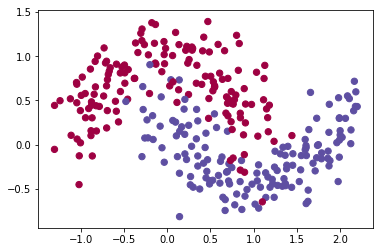

In [15]:
train_X, train_Y = load_dataset()

A 3-layer neural network has already been implemented for you! You'll train it with: 
- Mini-batch **Gradient Descent**: it will call your function:
    - `update_parameters_with_gd()`
- Mini-batch **Momentum**: it will call your functions:
    - `initialize_velocity()` and `update_parameters_with_momentum()`
- Mini-batch **Adam**: it will call your functions:
    - `initialize_adam()` and `update_parameters_with_adam()`

In [16]:
def model(X, Y, layers_dims, optimizer, learning_rate = 0.0007, mini_batch_size = 64, beta = 0.9,
          beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8, num_epochs = 5000, print_cost = True):
    """
    3-layer neural network model which can be run in different optimizer modes.
    
    Arguments:
    X -- input data, of shape (2, number of examples)
    Y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (1, number of examples)
    layers_dims -- python list, containing the size of each layer
    learning_rate -- the learning rate, scalar.
    mini_batch_size -- the size of a mini batch
    beta -- Momentum hyperparameter
    beta1 -- Exponential decay hyperparameter for the past gradients estimates 
    beta2 -- Exponential decay hyperparameter for the past squared gradients estimates 
    epsilon -- hyperparameter preventing division by zero in Adam updates
    num_epochs -- number of epochs
    print_cost -- True to print the cost every 1000 epochs

    Returns:
    parameters -- python dictionary containing your updated parameters 
    """

    L = len(layers_dims)             # number of layers in the neural networks
    costs = []                       # to keep track of the cost
    t = 0                            # initializing the counter required for Adam update
    seed = 10                        # For grading purposes, so that your "random" minibatches are the same as ours
    m = X.shape[1]                   # number of training examples
    
    # Initialize parameters
    parameters = initialize_parameters(layers_dims)

    # Initialize the optimizer
    if optimizer == "gd":
        pass # no initialization required for gradient descent
    elif optimizer == "momentum":
        v = initialize_velocity(parameters)
    elif optimizer == "adam":
        v, s = initialize_adam(parameters)
    
    # Optimization loop
    for i in range(num_epochs):
        
        # Define the random minibatches. We increment the seed to reshuffle differently the dataset after each epoch
        seed = seed + 1
        minibatches = random_mini_batches(X, Y, mini_batch_size, seed)
        cost_total = 0
        
        for minibatch in minibatches:

            # Select a minibatch
            (minibatch_X, minibatch_Y) = minibatch

            # Forward propagation
            a3, caches = forward_propagation(minibatch_X, parameters)

            # Compute cost and add to the cost total
            cost_total += compute_cost(a3, minibatch_Y)

            # Backward propagation
            grads = backward_propagation(minibatch_X, minibatch_Y, caches)

            # Update parameters
            if optimizer == "gd":
                parameters = update_parameters_with_gd(parameters, grads, learning_rate)
            elif optimizer == "momentum":
                parameters, v = update_parameters_with_momentum(parameters, grads, v, beta, learning_rate)
            elif optimizer == "adam":
                t = t + 1 # Adam counter
                parameters, v, s, _, _ = update_parameters_with_adam(parameters, grads, v, s,
                                                               t, learning_rate, beta1, beta2,  epsilon)
        cost_avg = cost_total / m
        
        # Print the cost every 1000 epoch
        if print_cost and i % 1000 == 0:
            print ("Cost after epoch %i: %f" %(i, cost_avg))
        if print_cost and i % 100 == 0:
            costs.append(cost_avg)
                
    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('epochs (per 100)')
    plt.title("Learning rate = " + str(learning_rate))
    plt.show()

    return parameters

Now, run this 3 layer neural network with each of the 3 optimization methods.

<a name='6-1'></a>  
### 6.1 - Mini-Batch Gradient Descent

Run the following code to see how the model does with mini-batch gradient descent.

Cost after epoch 0: 0.702405
Cost after epoch 1000: 0.668101
Cost after epoch 2000: 0.635288
Cost after epoch 3000: 0.600491
Cost after epoch 4000: 0.573367


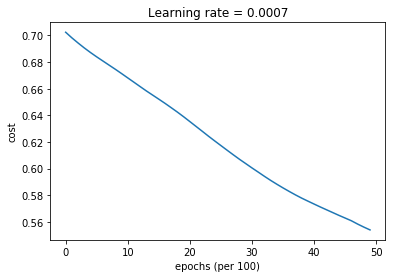

Accuracy: 0.7166666666666667


ValueError: 'c' argument has 1 elements, which is not acceptable for use with 'x' with size 300, 'y' with size 300.

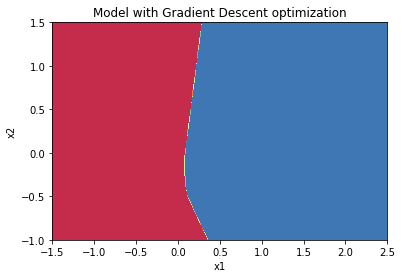

In [17]:
# train 3-layer model
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, optimizer = "gd")

# Predict
predictions = predict(train_X, train_Y, parameters)

# Plot decision boundary
plt.title("Model with Gradient Descent optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

<a name='6-2'></a>  
### 6.2 - Mini-Batch Gradient Descent with Momentum

Next, run the following code to see how the model does with momentum. Because this example is relatively simple, the gains from using momemtum are small - but for more complex problems you might see bigger gains.

Cost after epoch 0: 0.702413
Cost after epoch 1000: 0.668167
Cost after epoch 2000: 0.635388
Cost after epoch 3000: 0.600591
Cost after epoch 4000: 0.573444


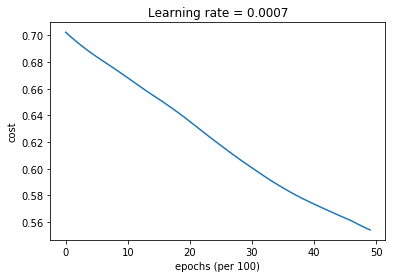

Accuracy: 0.7166666666666667


ValueError: 'c' argument has 1 elements, which is not acceptable for use with 'x' with size 300, 'y' with size 300.

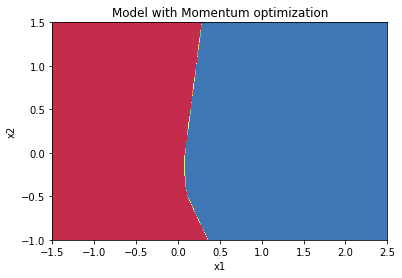

In [18]:
# train 3-layer model
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, beta = 0.9, optimizer = "momentum")

# Predict
predictions = predict(train_X, train_Y, parameters)

# Plot decision boundary
plt.title("Model with Momentum optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

<a name='6-3'></a>  
### 6.3 - Mini-Batch with Adam

Finally, run the following code to see how the model does with Adam.

Cost after epoch 0: 0.702166
Cost after epoch 1000: 0.167845
Cost after epoch 2000: 0.141316
Cost after epoch 3000: 0.138788
Cost after epoch 4000: 0.136066


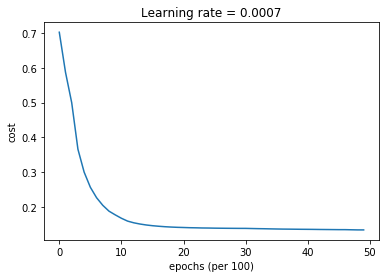

Accuracy: 0.9433333333333334


ValueError: 'c' argument has 1 elements, which is not acceptable for use with 'x' with size 300, 'y' with size 300.

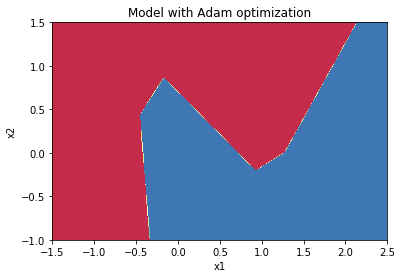

In [19]:
# train 3-layer model
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, optimizer = "adam")

# Predict
predictions = predict(train_X, train_Y, parameters)

# Plot decision boundary
plt.title("Model with Adam optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

<a name='6-4'></a>  
### 6.4 - Summary

<table> 
    <tr>
        <td>
        <b>optimization method</b>
        </td>
        <td>
        <b>accuracy</b>
        </td>
        <td>
        <b>cost shape</b>
        </td>
    </tr>
        <td>
        Gradient descent
        </td>
        <td>
        >71%
        </td>
        <td>
        smooth
        </td>
    <tr>
        <td>
        Momentum
        </td>
        <td>
        >71%
        </td>
        <td>
        smooth
        </td>
    </tr>
    <tr>
        <td>
        Adam
        </td>
        <td>
        >94%
        </td>
        <td>
        smoother
        </td>
    </tr>
</table> 

Momentum usually helps, but given the small learning rate and the simplistic dataset, its impact is almost negligible.

On the other hand, Adam clearly outperforms mini-batch gradient descent and Momentum. If you run the model for more epochs on this simple dataset, all three methods will lead to very good results. However, you've seen that Adam converges a lot faster.

Some advantages of Adam include:

- Relatively low memory requirements (though higher than gradient descent and gradient descent with momentum) 
- Usually works well even with little tuning of hyperparameters (except $\alpha$)

**References**:

- Adam paper: https://arxiv.org/pdf/1412.6980.pdf

<a name='7'></a>  
## 7 - Learning Rate Decay and Scheduling

Lastly, the learning rate is another hyperparameter that can help you speed up learning. 

During the first part of training, your model can get away with taking large steps, but over time, using a fixed value for the learning rate alpha can cause your model to get stuck in a wide oscillation that never quite converges. But if you were to slowly reduce your learning rate alpha over time, you could then take smaller, slower steps that bring you closer to the minimum. This is the idea behind learning rate decay. 

Learning rate decay can be achieved by using either adaptive methods or pre-defined learning rate schedules. 

Now, you'll apply scheduled learning rate decay to a 3-layer neural network in three different optimizer modes and see how each one differs, as well as the effect of scheduling at different epochs. 

This model is essentially the same as the one you used before, except in this one you'll be able to include learning rate decay. It includes two new parameters, decay and decay_rate. 

In [20]:
def model(X, Y, layers_dims, optimizer, learning_rate = 0.0007, mini_batch_size = 64, beta = 0.9,
          beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8, num_epochs = 5000, print_cost = True, decay=None, decay_rate=1):
    """
    3-layer neural network model which can be run in different optimizer modes.
    
    Arguments:
    X -- input data, of shape (2, number of examples)
    Y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (1, number of examples)
    layers_dims -- python list, containing the size of each layer
    learning_rate -- the learning rate, scalar.
    mini_batch_size -- the size of a mini batch
    beta -- Momentum hyperparameter
    beta1 -- Exponential decay hyperparameter for the past gradients estimates 
    beta2 -- Exponential decay hyperparameter for the past squared gradients estimates 
    epsilon -- hyperparameter preventing division by zero in Adam updates
    num_epochs -- number of epochs
    print_cost -- True to print the cost every 1000 epochs

    Returns:
    parameters -- python dictionary containing your updated parameters 
    """

    L = len(layers_dims)             # number of layers in the neural networks
    costs = []                       # to keep track of the cost
    t = 0                            # initializing the counter required for Adam update
    seed = 10                        # For grading purposes, so that your "random" minibatches are the same as ours
    m = X.shape[1]                   # number of training examples
    lr_rates = []
    learning_rate0 = learning_rate   # the original learning rate
    
    # Initialize parameters
    parameters = initialize_parameters(layers_dims)

    # Initialize the optimizer
    if optimizer == "gd":
        pass # no initialization required for gradient descent
    elif optimizer == "momentum":
        v = initialize_velocity(parameters)
    elif optimizer == "adam":
        v, s = initialize_adam(parameters)
    
    # Optimization loop
    for i in range(num_epochs):
        
        # Define the random minibatches. We increment the seed to reshuffle differently the dataset after each epoch
        seed = seed + 1
        minibatches = random_mini_batches(X, Y, mini_batch_size, seed)
        cost_total = 0
        
        for minibatch in minibatches:

            # Select a minibatch
            (minibatch_X, minibatch_Y) = minibatch

            # Forward propagation
            a3, caches = forward_propagation(minibatch_X, parameters)

            # Compute cost and add to the cost total
            cost_total += compute_cost(a3, minibatch_Y)

            # Backward propagation
            grads = backward_propagation(minibatch_X, minibatch_Y, caches)

            # Update parameters
            if optimizer == "gd":
                parameters = update_parameters_with_gd(parameters, grads, learning_rate)
            elif optimizer == "momentum":
                parameters, v = update_parameters_with_momentum(parameters, grads, v, beta, learning_rate)
            elif optimizer == "adam":
                t = t + 1 # Adam counter
                parameters, v, s, _, _ = update_parameters_with_adam(parameters, grads, v, s,
                                                               t, learning_rate, beta1, beta2,  epsilon)
        cost_avg = cost_total / m
        if decay:
            learning_rate = decay(learning_rate0, i, decay_rate)
        # Print the cost every 1000 epoch
        if print_cost and i % 1000 == 0:
            print ("Cost after epoch %i: %f" %(i, cost_avg))
            if decay:
                print("learning rate after epoch %i: %f"%(i, learning_rate))
        if print_cost and i % 100 == 0:
            costs.append(cost_avg)
                
    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('epochs (per 100)')
    plt.title("Learning rate = " + str(learning_rate))
    plt.show()

    return parameters

<a name='7-1'></a>  
### 7.1 - Decay on every iteration  

For this portion of the assignment, you'll try one of the pre-defined schedules for learning rate decay, called exponential learning rate decay. It takes this mathematical form:

$$\alpha = \frac{1}{1 + decayRate \times epochNumber} \alpha_{0}$$

<a name='ex-7'></a>  
### Exercise 7 - update_lr

Calculate the new learning rate using exponential weight decay.

In [23]:
# GRADED FUNCTION: update_lr
# 逐渐更新learning decay的函数
def update_lr(learning_rate0, epoch_num, decay_rate):
    """
    Calculates updated the learning rate using exponential weight decay.
    
    Arguments:
    learning_rate0 -- Original learning rate. Scalar
    epoch_num -- Epoch number. Integer
    decay_rate -- Decay rate. Scalar

    Returns:
    learning_rate -- Updated learning rate. Scalar 
    """
    #(approx. 1 line)
    # learning_rate = 
    # YOUR CODE STARTS HERE
    learning_rate = 1*learning_rate0 / (1 + decay_rate*epoch_num)
    
    # YOUR CODE ENDS HERE
    return learning_rate

In [24]:
learning_rate = 0.5
print("Original learning rate: ", learning_rate)
epoch_num = 2
decay_rate = 1
learning_rate_2 = update_lr(learning_rate, epoch_num, decay_rate)

print("Updated learning rate: ", learning_rate_2)

update_lr_test(update_lr)

Original learning rate:  0.5
Updated learning rate:  0.16666666666666666
All test passed


Cost after epoch 0: 0.701091
learning rate after epoch 0: 0.100000
Cost after epoch 1000: 0.661884
learning rate after epoch 1000: 0.000100
Cost after epoch 2000: 0.658620
learning rate after epoch 2000: 0.000050
Cost after epoch 3000: 0.656765
learning rate after epoch 3000: 0.000033
Cost after epoch 4000: 0.655486
learning rate after epoch 4000: 0.000025


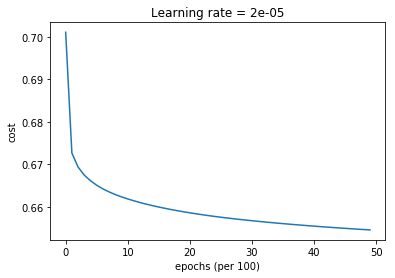

Accuracy: 0.6533333333333333


ValueError: 'c' argument has 1 elements, which is not acceptable for use with 'x' with size 300, 'y' with size 300.

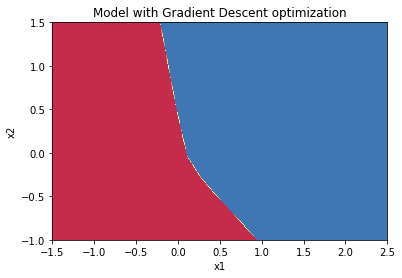

In [25]:
# train 3-layer model
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, optimizer = "gd", learning_rate = 0.1, num_epochs=5000, decay=update_lr)

# Predict
predictions = predict(train_X, train_Y, parameters)

# Plot decision boundary
plt.title("Model with Gradient Descent optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

Notice that if you set the decay to occur at every iteration, the learning rate goes to zero too quickly - even if you start with a higher learning rate. 
<table> 
    <tr>
        <td>
        <b>Epoch Number</b>
        </td>
        <td>
        <b>Learning Rate</b>
        </td>
        <td>
        <b>Cost</b>
        </td>
    </tr>
    <tr>
        <td>
        0
        </td>
        <td>
        0.100000
        </td>
        <td>
        0.701091
        </td>
    </tr>
    <tr>
        <td>
        1000
        </td>
        <td>
        0.000100
        </td>
        <td>
        0.661884
        </td>
    </tr>
    <tr>
        <td>
        2000
        </td>
        <td>
        0.000050
        </td>
        <td>
        0.658620
        </td>
    </tr>
    <tr>
        <td>
        3000
        </td>
        <td>
        0.000033
        </td>
        <td>
        0.656765
        </td>
    </tr>
    <tr>
        <td>
        4000
        </td>
        <td>
        0.000025
        </td>
        <td>
        0.655486
        </td>
    </tr>
    <tr>
        <td>
        5000
        </td>
        <td>
        0.000020
        </td>
        <td>
        0.654514
        </td>
    </tr>
</table> 

When you're training for a few epoch this doesn't cause a lot of troubles, but when the number of epochs is large the optimization algorithm will stop updating. One common fix to this issue is to decay the learning rate every few steps. This is called fixed interval scheduling.

<a name='7-2'></a> 
### 7.2 - Fixed Interval Scheduling

You can help prevent the learning rate speeding to zero too quickly by scheduling the exponential learning rate decay at a fixed time interval, for example 1000. You can either number the intervals, or divide the epoch by the time interval, which is the size of window with the constant learning rate. 

<img src="images/lr.png" style="width:400px;height:250px;">

<a name='ex-8'></a> 
### Exercise 8 - schedule_lr_decay

Calculate the new learning rate using exponential weight decay with fixed interval scheduling.

**Instructions**: Implement the learning rate scheduling such that it only changes when the epochNum is a multiple of the timeInterval.

**Note:** The fraction in the denominator uses the floor operation. 

$$\alpha = \frac{1}{1 + decayRate \times \lfloor\frac{epochNum}{timeInterval}\rfloor} \alpha_{0}$$

**Hint:** [numpy.floor](https://numpy.org/doc/stable/reference/generated/numpy.floor.html)

In [32]:
# GRADED FUNCTION: schedule_lr_decay

def schedule_lr_decay(learning_rate0, epoch_num, decay_rate, time_interval=1000):
    """
    Calculates updated the learning rate using exponential weight decay.
    
    Arguments:
    learning_rate0 -- Original learning rate. Scalar
    epoch_num -- Epoch number. Integer.
    decay_rate -- Decay rate. Scalar.
    time_interval -- Number of epochs where you update the learning rate.

    Returns:
    learning_rate -- Updated learning rate. Scalar 
    """
    # (approx. 1 lines)
    # learning_rate = ...
    # YOUR CODE STARTS HERE
    learning_rate = 1*learning_rate0 / (1 + decay_rate*np.floor(epoch_num/time_interval))
    
    # YOUR CODE ENDS HERE
    return learning_rate

In [33]:
learning_rate = 0.5
print("Original learning rate: ", learning_rate)

epoch_num_1 = 10
epoch_num_2 = 100
decay_rate = 0.3
time_interval = 100
learning_rate_1 = schedule_lr_decay(learning_rate, epoch_num_1, decay_rate, time_interval)
learning_rate_2 = schedule_lr_decay(learning_rate, epoch_num_2, decay_rate, time_interval)
print("Updated learning rate after {} epochs: ".format(epoch_num_1), learning_rate_1)
print("Updated learning rate after {} epochs: ".format(epoch_num_2), learning_rate_2)

schedule_lr_decay_test(schedule_lr_decay)

Original learning rate:  0.5
Updated learning rate after 10 epochs:  0.5
Updated learning rate after 100 epochs:  0.3846153846153846
All test passed


**Expected output**
```
Original learning rate:  0.5
Updated learning rate after 10 epochs:  0.5
Updated learning rate after 100 epochs:  0.3846153846153846
```

<a name='7-3'></a> 
### 7.3 - Using Learning Rate Decay for each Optimization Method

Below, you'll use the following "moons" dataset to test the different optimization methods. (The dataset is named "moons" because the data from each of the two classes looks a bit like a crescent-shaped moon.) 

<a name='7-3-1'></a> 
#### 7.3.1 - Gradient Descent with Learning Rate Decay

Run the following code to see how the model does gradient descent and weight decay.

Cost after epoch 0: 0.701091
learning rate after epoch 0: 0.100000
Cost after epoch 1000: 0.127161
learning rate after epoch 1000: 0.050000
Cost after epoch 2000: 0.120304
learning rate after epoch 2000: 0.033333
Cost after epoch 3000: 0.117033
learning rate after epoch 3000: 0.025000
Cost after epoch 4000: 0.117512
learning rate after epoch 4000: 0.020000


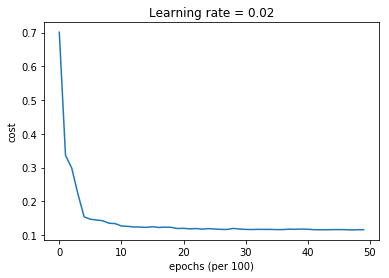

Accuracy: 0.9433333333333334


ValueError: 'c' argument has 1 elements, which is not acceptable for use with 'x' with size 300, 'y' with size 300.

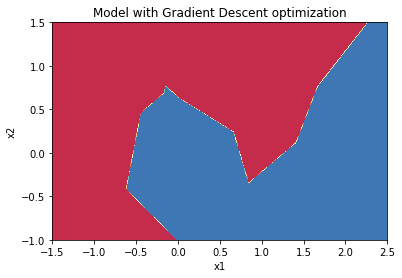

In [34]:
# train 3-layer model
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, optimizer = "gd", learning_rate = 0.1, num_epochs=5000, decay=schedule_lr_decay)

# Predict
predictions = predict(train_X, train_Y, parameters)

# Plot decision boundary
plt.title("Model with Gradient Descent optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

<a name='7-3-2'></a> 
#### 7.3.2 - Gradient Descent with Momentum and Learning Rate Decay

Run the following code to see how the model does gradient descent with momentum and weight decay.

Cost after epoch 0: 0.702226
learning rate after epoch 0: 0.100000
Cost after epoch 1000: 0.128974
learning rate after epoch 1000: 0.050000
Cost after epoch 2000: 0.125965
learning rate after epoch 2000: 0.033333
Cost after epoch 3000: 0.123375
learning rate after epoch 3000: 0.025000
Cost after epoch 4000: 0.123218
learning rate after epoch 4000: 0.020000


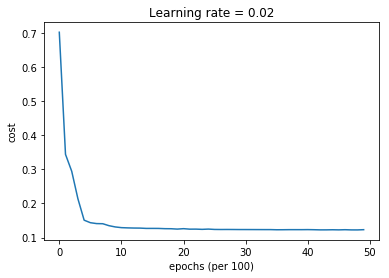

Accuracy: 0.9533333333333334


ValueError: 'c' argument has 1 elements, which is not acceptable for use with 'x' with size 300, 'y' with size 300.

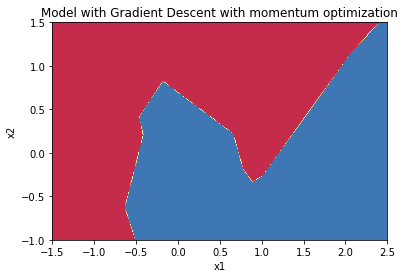

In [35]:
# train 3-layer model
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, optimizer = "momentum", learning_rate = 0.1, num_epochs=5000, decay=schedule_lr_decay)

# Predict
predictions = predict(train_X, train_Y, parameters)

# Plot decision boundary
plt.title("Model with Gradient Descent with momentum optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

<a name='7-3-3'></a> 
#### 7.3.3 - Adam with Learning Rate Decay

Run the following code to see how the model does Adam and weight decay.

Cost after epoch 0: 0.699346
learning rate after epoch 0: 0.010000
Cost after epoch 1000: 0.130074
learning rate after epoch 1000: 0.005000
Cost after epoch 2000: 0.129826
learning rate after epoch 2000: 0.003333
Cost after epoch 3000: 0.129282
learning rate after epoch 3000: 0.002500
Cost after epoch 4000: 0.128361
learning rate after epoch 4000: 0.002000


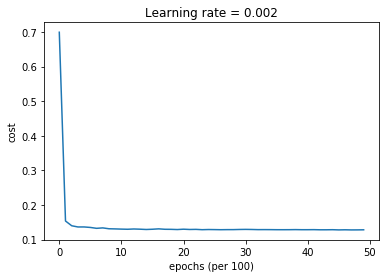

Accuracy: 0.94


ValueError: 'c' argument has 1 elements, which is not acceptable for use with 'x' with size 300, 'y' with size 300.

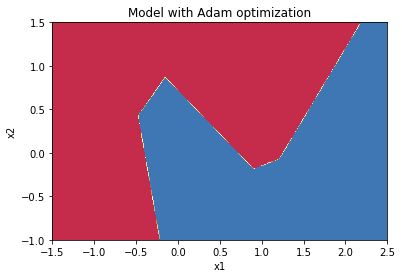

In [36]:
# train 3-layer model
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, optimizer = "adam", learning_rate = 0.01, num_epochs=5000, decay=schedule_lr_decay)

# Predict
predictions = predict(train_X, train_Y, parameters)

# Plot decision boundary
plt.title("Model with Adam optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

<a name='7-4'></a> 
### 7.4 - Achieving similar performance with different methods

With SGD or SGD with Momentum, the accuracy is significantly lower than Adam, but when learning rate decay is added on top, either can achieve performance at a speed and accuracy score that's similar to Adam.

In the case of Adam, notice that the learning curve achieves a similar accuracy but faster.

<table> 
    <tr>
        <td>
        <b>optimization method</b>
        </td>
        <td>
        <b>accuracy</b>
        </td>
    </tr>
        <td>
        Gradient descent
        </td>
        <td>
        >94.6%
        </td>
    <tr>
        <td>
        Momentum
        </td>
        <td>
        >95.6%
        </td>
    </tr>
    <tr>
        <td>
        Adam
        </td>
        <td>
        94%
        </td>
    </tr>
</table> 

**Congratulations**! You've made it to the end of the Optimization methods notebook. Here's a quick recap of everything you're now able to do: 

* Apply three different optimization methods to your models 
* Build mini-batches for your training set 
* Use learning rate decay scheduling to speed up your training

Great work!